In [1]:
import yfinance as yf

In [2]:
msft = yf.Ticker("BABA")
# get stock info
#(msft.info)

In [3]:
# get historical market data
hist = msft.history(start = "2014-09-19", end = "2021-02-03", interval = "1d")

In [4]:
hist.head(50)

Open        High         Low       Close     Volume  \
Date                                                                    
2014-09-19   92.699997   99.699997   89.949997   93.889999  271879400   
2014-09-22   92.699997   92.949997   89.500000   89.889999   66657800   
2014-09-23   88.940002   90.480003   86.620003   87.169998   39009800   
2014-09-24   88.470001   90.570000   87.220001   90.570000   32088000   
2014-09-25   91.089996   91.500000   88.500000   88.919998   28598000   
2014-09-26   89.730003   90.459999   88.660004   90.459999   18340000   
2014-09-29   89.620003   89.699997   88.019997   88.750000   25302000   
2014-09-30   89.000000   90.879997   88.459999   88.849998   24419400   
2014-10-01   88.699997   88.940002   86.040001   86.099998   24029600   
2014-10-02   86.269997   88.199997   85.611000   87.059998   21469700   
2014-10-03   88.099998   89.940002   87.650002   88.099998   18485700   
2014-10-06   89.150002   89.650002   88.059998   88.309998    9268400   
2014-10-07   87.949997   89.699997   87.059998   87.669998   12791700   
2014-10-08   88.000000   88.500000   87.059998   88.300003   10252600   
2014-10-09   88.510002   90.349998   88.000000   88.790001   21507000   
2014-10-10   88.250000   88.739998   85.239998   85.879997   15431400   
2014-10-13   86.849998   86.889999   84.919998   85.120003   14845000   
2014-10-14   85.809998   85.879997   83.220001   84.949997   15559200   
2014-10-15   84.040001   86.489998   82.809998   85.599998   16824300   
2014-10-16   84.980003   89.175003   84.014999   88.849998   15232000   
2014-10-17   90.400002   90.900002   87.669998   87.910004   17360700   
2014-10-20   88.000000   89.500000   87.860001   88.260002    9891400   
2014-10-21   89.099998   92.500000   88.500000   90.900002   23243800   
2014-10-22   92.250000   93.500000   91.010002   91.629997   20364500   
2014-10-23   92.919998   94.699997   92.820000   94.449997   20641000   
2014-10-24   95.070000   98.000000   94.779999   95.760002   32132600   
2014-10-27   97.000000   98.849998   96.300003   97.790001   28302400   
2014-10-28   99.839996  100.669998   98.610001   99.680000   32127600   
2014-10-29   99.879997  100.000000   96.820000   98.309998   28655400   
2014-10-30   98.480003   99.440002   97.300003   98.730003   15484600   
2014-10-31  100.099998  100.220001   98.136002   98.599998   18128300   
2014-11-03   99.669998  102.800003   99.050003  101.800003   40883700   
2014-11-04  100.425003  106.359001   99.510002  106.070000   67814000   
2014-11-05  108.480003  110.139999  106.480003  108.669998   48344000   
2014-11-06  109.300003  111.699997  107.209999  111.570000   33609000   
2014-11-07  112.930000  114.769997  111.750000  114.559998   51457000   
2014-11-10  117.269997  119.449997  115.199997  119.150002   75971000   
2014-11-11  117.250000  117.550003  113.690002  114.540001   70983600   
2014-11-12  115.050003  119.070000  114.019997  118.199997   53908000   
2014-11-13  119.300003  120.000000  114.550003  114.839996   62163000   
2014-11-14  115.059998  115.389999  113.349998  115.099998   29849000   
2014-11-17  115.440002  115.629997  113.129997  114.250000   22573000   
2014-11-18  114.330002  114.379997  110.410004  110.809998   41098000   
2014-11-19  109.830002  110.680000  107.220001  108.820000   46841000   
2014-11-20  107.809998  112.440002  107.260002  109.820000   36489000   
2014-11-21  113.209999  113.500000  110.434998  110.730003   27432000   
2014-11-24  112.000000  113.930000  111.550003  113.919998   20646000   
2014-11-25  114.940002  115.169998  112.330002  113.470001   23485000   
2014-11-26  113.330002  113.739998  112.330002  112.669998   11794700   
2014-11-28  113.139999  113.230003  111.110001  111.639999    8077800   

            Dividends  Stock Splits  
Date                                 
2014-09-19          0             0  
2014-09-22          0             0  
2014-09-23          0             0  
2014-09-24          0          

In [5]:
from ta import add_all_ta_features
from ta.utils import dropna
from ta.trend import MACD 
from ta.trend import SMAIndicator
from ta.trend import EMAIndicator
from ta.volatility import AverageTrueRange
from ta.volatility import BollingerBands
from ta.momentum import RSIIndicator
from ta.momentum import StochasticOscillator
from ta.momentum import ROCIndicator
from ta.volume import MFIIndicator

In [6]:
hist = hist.drop(columns = 'Stock Splits')
hist = hist.drop(columns = 'Dividends')

In [7]:
def generate_TA(df):
#    df = df
    #generate RSI 
    """
    Relative Strength Index (RSI) [Momentum]Compares the magnitude of recent gains and losses 
        over a specified time period to measure speed and change of price movements of a security. 
        It is primarily used to attempt to identify overbought or oversold conditions in the 
        trading of an asset.
    Calculations: RSI = 100 - (100/(1+(avg_gain/avg_loss))) over the past 14 days 
    Purpose: to identify extremes, and find overbought/ oversold situations
    """
    indicator_RSI = RSIIndicator(close = df["Close"])
    rsipd= RSIIndicator.rsi(indicator_RSI)
    df['RSI'] = rsipd
    
    
    #generate Simple Moving Average Indicator
    """
    A moving average is a statistic that captures the average change in a data series over time. 
    In finance, moving averages are often used by technical analysts to keep track of prices trends for 
    specific securities. An upward trend in a moving average might signify an upswing in the price or momentum
    of a security, while a downward trend would be seen as a sign of decline.
    Calculations: SMA_D = (1/D) ∑^D_i (A_i) where A = Average in period D
    """
    # Initialize Simple Moving Average Indicator
    indicator_SMA_7 = SMAIndicator(close = df["Close"], window = 7)
    indicator_SMA_14 = SMAIndicator(close = df["Close"], window = 14)
    indicator_SMA_21 = SMAIndicator(close = df["Close"], window = 21)
    # Add Simple Moving Average features
    df['SMA_7'] = indicator_SMA_7.sma_indicator()
    df['SMA_14'] = indicator_SMA_14.sma_indicator()
    df['SMA_21'] = indicator_SMA_21.sma_indicator()
    
    
    #generate Exponential Moving Average Indicator
    """
    The exponential moving average is a type of moving average that gives more weight to recent prices 
    in an attempt to make it more responsive to new information. 
    Usually takes a 14 days period
    Calculations: EMA_Today = (Value_Today∗(Smoothings/(1+Days)))+EMA_Yesterday∗(1−(Smoothings/(1+Days)))
    """
    #Initialize Exponential Moving Average Indicator
    indicator_EMA = EMAIndicator(close = df["Close"])
    #Add Exponential Moving Average Indicator
    df['EMA'] = indicator_EMA.ema_indicator()
    
    
    #generate Bollinger Bands Indicators
    """
    A Bollinger Band® is a technical analysis tool defined by a set of trendlines plotted two standard deviations 
        (positively and negatively) away from a simple moving average (SMA) of a security's price, 
        but which can be adjusted to user preferences.
    Calculations:
        * Middle Band = 20-day simple moving average (SMA)
        * Upper Band = 20-day SMA + (20-day standard deviation of price x 2) 
        * Lower Band = 20-day SMA - (20-day standard deviation of price x 2)
    Purpose:Many traders believe the closer the prices move to the upper band, the more overbought the market, 
        and the closer the prices move to the lower band, the more oversold the market
    """
    # Initialize Bollinger Bands Indicator
    indicator_bb = BollingerBands(close=df["Close"], window=20, window_dev=2)
    # Add Bollinger Bands features
    df['bb_mavg'] = indicator_bb.bollinger_mavg()
    df['bb_high'] = indicator_bb.bollinger_hband()
    df['bb_low'] = indicator_bb.bollinger_lband()
    
    
    # generate Average True Range Indicators
    """
    ATR indicator provide an indication of the degree of price volatility. Strong moves, in either direction, 
        are often accompanied by large ranges, or large True Ranges.
    Calculations:
        *TR = Max[(High − Low),Abs(High − Close),Abs(Low − Close)]
        *ATR_14 = (1/14) ∑^14_i (TR_i) for a 14 day period
    Purpose: The ATR may be used by market technicians to enter and exit trades, 
        and is a useful tool to add to a trading system. It was created to allow traders to more 
        accurately measure the daily volatility of an asset by using simple calculations.
        It is used primarily to measure volatility caused by gaps and limit up or down moves. 
    """
    # Initialize Average True Range Indicator
    indicator_ATR = AverageTrueRange(high = df["High"], low = df["Low"], close = df["Close"])
    atrpd= AverageTrueRange.average_true_range(indicator_ATR)
    #Add ATR features
    df['ATR'] = atrpd
    
    
    # generate MACD Indicator
    """
    Moving average convergence divergence (MACD) is a trend-following momentum indicator that shows the 
        relationship between two moving averages of a security’s price. 
    Calculations:
        *EMA_Today = (Value_Today∗(Smoothings/(1+Days)))+EMA_Yesterday∗(1−(Smoothings/(1+Days)))
        *MACD = 12-Period EMA − 26-Period EMA
    Purpose:MACD triggers technical signals when it crosses above (to buy) or below (to sell) its signal line.
        The speed of crossovers is also taken as a signal of a market is overbought or oversold.
        MACD helps investors understand whether the bullish or bearish movement in the price is strengthening 
        or weakening.
    """
    # Initialize MACD Indicator
    indicator_MACD = MACD(close = df["Close"])
    #Add MACD features
    df['MACD'] = indicator_MACD.macd()
    
    
    # generate Stochastic Oscillator Indicator
    """
    A stochastic oscillator is a momentum indicator comparing a particular closing price of a security 
        to a range of its prices over a certain period of time. The sensitivity of the oscillator to market 
        movements is reducible by adjusting that time period or by taking a moving average of the result.
        Taking in previous 14 days data 
    Calculations: %K = ((C-L)/(H-L))*100
    Purpose: Useful indicator of overbought and oversold conditions.
    """
    # Initialize Stochastic Oscillator Indicator
    indicator_StocOsc = StochasticOscillator(high = df["High"], low = df["Low"], close = df["Close"])
    # Add Stochastic Oscillator features
    df['Stoch_Osc'] = indicator_StocOsc.stoch() 
    
    
    # generate ROC Indicator
    """
    The Price Rate of Change (ROC) is a momentum-based technical indicator that measures the percentage change 
        in price between the current price and the price a certain number of periods ago(12 days). 
        Measures the strength of price momentum by the rate of change
    Calculations: ROC = ((Close_p - Close_(p-n))/Close_(p-n))*100
        where:
        *Close_p = Closing price of most recent period
        *Close_(p-n) = Closing price n periods before most recent period
    Purpose: Positive values indicate upward buying pressure or momentum, while negative values below zero 
        indicate selling pressure or downward momentum. Increasing values in either direction, positive or negative, 
        indicate increasing momentum, and moves back toward zero indicate waning momentum.
    """
    # Initialize ROC Indicator
    indicator_ROC = ROCIndicator(close = df["Close"])
    # Add ROC features
    df['ROC'] = indicator_ROC.roc()
    
    
    # generate MFI Indicator
    """
    The Money Flow Index (MFI) is a technical oscillator that uses price and volume data for identifying overbought or 
        oversold signals in an asset. It can also be used to spot divergences which warn of a trend change in price. 
    Calculations: 
        *Typical Price = (High + Low + Close)/3
        *Raw Money Flow = Typical Price * Volume
        *Money Flow Ratio (MFR) = 14 Period Positive Money Flow/14 Period Negative Money Flow
        *MFI = 100 - (100/ 1+ MFR)
    Purpose: One of the primary ways to use the Money Flow Index is when there is a divergence. 
        A divergence is when the oscillator is moving in the opposite direction of price. 
        This is a signal of a potential reversal in the prevailing price trend.
    """
    # Initialize MFI Indicator
    indicator_MFI = MFIIndicator(high = df["High"], low = df["Low"], close = df["Close"], volume = df["Volume"])
    # Add MFI features
    df['MFI'] = indicator_MFI.money_flow_index() 
    
    return df

In [8]:
TA_data = generate_TA(hist)

In [9]:
import matplotlib.pyplot as plt
%matplotlib inline
def plot_technical_indicators(dataset, last_days):
    plt.figure(figsize=(16, 10), dpi=100)
    shape_0 = dataset.shape[0]
    xmacd_ = shape_0-last_days
    
    dataset = dataset.iloc[-last_days:, :]
    x_ = range(3, dataset.shape[0])
    x_ =list(dataset.index)
    
    # Plot first subplot
    plt.subplot(3, 1, 1)
    plt.plot(dataset['SMA_7'],label='MA 7', color='g',linestyle='dotted')
    plt.plot(dataset['Close'],label='Closing Price', color='b')
    plt.plot(dataset['SMA_14'],label='MA 14', color='m',linestyle='dotted')
    plt.plot(dataset['SMA_21'],label='MA 21', color='r',linestyle='dotted')
    plt.plot(dataset['bb_mavg'],label = 'BB Moving Avg', color='y', linestyle='dotted')
    plt.plot(dataset['bb_high'],label='BB Upper Band', color='c')
    plt.plot(dataset['bb_low'],label='BB Lower Band', color='c')
    plt.fill_between(x_, dataset['bb_low'], dataset['bb_high'], alpha=0.35)
    plt.title('Technical indicators for Alibaba - last {} days.'.format(last_days))
    plt.ylabel('USD')
    plt.legend()

    # Plot second subplot
    plt.subplot(3, 1, 2)
    plt.title('MACD')
    plt.plot(dataset['MACD'],label='MACD', linestyle='-.')
    plt.ylabel('USD')
    plt.legend()

    #PLot third subplot
    plt.subplot(3,1,3)
    plt.title('Technical indicators for Alibaba')
    plt.plot(dataset['RSI'],label = 'RSI')
    plt.plot(dataset['MFI'], label = 'MFI')
    plt.plot(dataset['Stoch_Osc'], label = 'Stochastic Oscillator')
    plt.axhline(y=80, color='r', linestyle='--')
    plt.axhline(y=20, color='r', linestyle='--')
    plt.ylabel('%')
    plt.legend()
    
    plt.show()
    plt.savefig('image/data_with_TA.png')

In [10]:
print('Total dataset has {} samples, and {} features.'.format(TA_data.shape[0], \
                                                              TA_data.shape[1]))

Total dataset has 1604 samples, and 18 features.


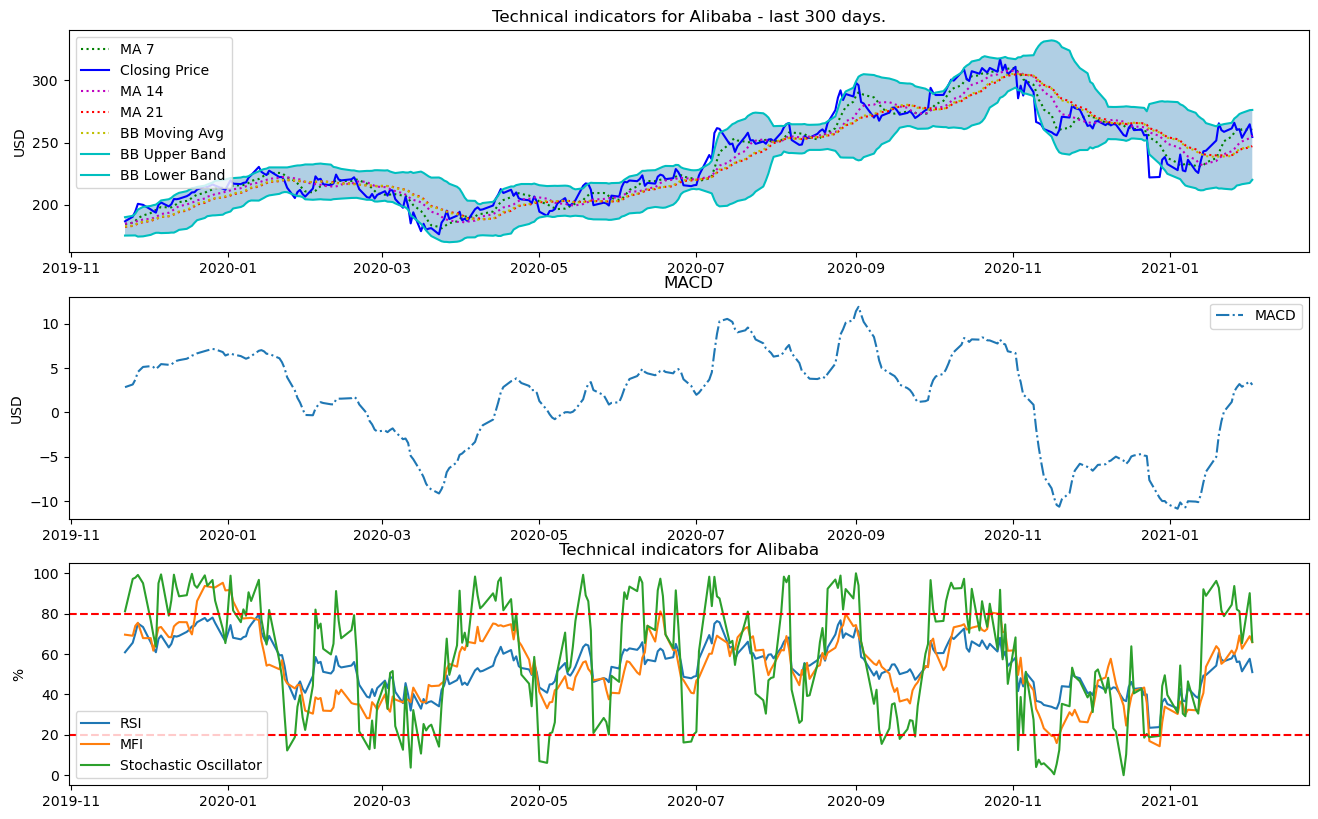

<Figure size 432x288 with 0 Axes>

In [11]:
plot_technical_indicators(TA_data,300)

In [12]:
import pandas as pd
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', None)

competitor=["JD","AMZN","EBAY","TCEHY","BIDU","GOOG","AAPL","NFLX","FB"]
names = ["JD","AMZN","EBAY","TN","BD","GOOG","AAPL","NFLX","FB"]
#x = competitor[0]+"_close"
def generateCompetitorPrices(ticker,TA_data,names):
    for i in range (len(ticker)):
        competitor=yf.Ticker(ticker[i])
        df = competitor.history(start = "2014-09-19", end = "2021-02-03", interval = "1d")
        df=df.drop(columns = 'Stock Splits')
        df=df.drop(columns = 'Dividends')
        df=df.drop(columns = 'Open')
        df=df.drop(columns = 'High')
        df=df.drop(columns = 'Low')
        df=df.drop(columns = 'Volume')
        df.rename(columns={"Close" : names[i]+"_close"}, inplace=True)
        TA_data = pd.merge(TA_data, df, how = "left", on="Date")
    return TA_data
TA_data = generateCompetitorPrices(competitor,TA_data,names)
#TA_data

In [13]:
TYNames = ["^FVX","^TNX","^TYX","^HSI","^IXIC","^DJI","^GSPC","^FTSE","^RUT","^N225","^NYA","000001.SS","CNY=X"]
names = ["5TY","10TY","30TY","HSI","NASDAQ","DJI","S&P","FTSE","RUT","N225","NYSE","SSE","CNY/USD"]
def generateOtherPrices(ticker,TA_data,names):
    for i in range (len(ticker)):
        competitor=yf.Ticker(ticker[i])
        df = competitor.history(start = "2014-09-19", end = "2021-02-03", interval = "1d")
        df=df.drop(columns = 'Stock Splits')
        df=df.drop(columns = 'Dividends')
        df=df.drop(columns = 'Open')
        df=df.drop(columns = 'High')
        df=df.drop(columns = 'Low')
        df=df.drop(columns = 'Volume')
        df.rename(columns={"Close" : names[i]+"_price"}, inplace=True)
        TA_data = pd.merge(TA_data, df, how = "left", on="Date")
    return TA_data
TA_data = generateOtherPrices(TYNames,TA_data,names)
#TA_data

In [14]:
"""from statsmodels.tsa.stattools import adfuller
from numpy import log
result = adfuller(TA_data[0].dropna())
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])"""
TA_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1604 entries, 2014-09-19 to 2021-02-02
Data columns (total 40 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Open           1604 non-null   float64
 1   High           1604 non-null   float64
 2   Low            1604 non-null   float64
 3   Close          1604 non-null   float64
 4   Volume         1604 non-null   int64  
 5   RSI            1591 non-null   float64
 6   SMA_7          1598 non-null   float64
 7   SMA_14         1591 non-null   float64
 8   SMA_21         1584 non-null   float64
 9   EMA            1591 non-null   float64
 10  bb_mavg        1585 non-null   float64
 11  bb_high        1585 non-null   float64
 12  bb_low         1585 non-null   float64
 13  ATR            1604 non-null   float64
 14  MACD           1579 non-null   float64
 15  Stoch_Osc      1591 non-null   float64
 16  ROC            1592 non-null   float64
 17  MFI            1591 non-null   flo

In [15]:
#TA_data.head(50)

In [16]:
print('Total dataset has {} samples, and {} features.'.format(TA_data.shape[0], \
                                                              TA_data.shape[1]))

Total dataset has 1604 samples, and 40 features.


In [17]:
num_training_days = int(TA_data.shape[0]*.6)
num_validation_days = int((TA_data.shape[0]-num_training_days)/2)
print('Number of training days: {}. Number of validation days: {}. Number of testing days:{}'.format(num_training_days,
                                                                                                  num_validation_days, \
                                                                    TA_data.shape[0]-num_training_days-num_validation_days))

Number of training days: 962. Number of validation days: 321. Number of testing days:321


In [18]:
import  torch.nn as nn
import torch
import torch.optim as optim
from torch.utils.data import DataLoader,Dataset
import numpy as np
from torch.autograd import Variable
import os
import pandas as pd
from torchvision import transforms
import numpy as np
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

In [19]:
class Mydataset(Dataset):
 
    def __init__(self,xx,yy,transform=None):
        self.x=xx
        self.y=yy
        self.tranform = transform
 
    def __getitem__(self,index):
        x1=self.x[index]
        y1=self.y[index]
        if self.tranform !=None:
            return self.tranform(x1),y1
        return x1,y1
 
    def __len__(self):
        return len(self.x)

In [20]:
gan_df = TA_data.dropna()
close_min=gan_df['Close'].min()
close_max=gan_df["Close"].max()
gan_df=gan_df.apply(lambda x:(x-min(x))/(max(x)-min(x)))

In [21]:
sequence = 14
batchSize = 8
useGPU = True
X = []
Y = [] 
real = []
date = []
for i in range(gan_df.shape[0] - sequence):
    X.append(np.array(gan_df.iloc[i:(i + sequence), ].values, dtype=np.float32))
    Y.append(np.array(gan_df.iloc[(i + sequence), ], dtype=np.float32))
    date.append(gan_df.index[i + sequence])
total_len = len(Y)

In [22]:
trainx, trainy = X[:int(0.6 * total_len)], Y[:int(0.6 * total_len)]
devx, devy = X[int(0.6 * total_len):int(0.8 * total_len)], Y[int(0.6 * total_len):int(0.8 * total_len)]
testx, testy = X[int(0.8 * total_len):], Y[int(0.8 * total_len):]
train_loader = DataLoader(dataset=Mydataset(trainx, trainy, transform=transforms.ToTensor()), batch_size=batchSize,
                          shuffle=True)
dev_loader = DataLoader(dataset=Mydataset(devx, devy), batch_size=batchSize, shuffle=True)
test_loader = DataLoader(dataset=Mydataset(testx, testy), batch_size=batchSize, shuffle=False)

In [23]:
class lstm(nn.Module):

    def __init__(self, input_size=40, hidden_size=500, num_layers=1 , output_size=1 , dropout=0, batch_first=True):
        super(lstm, self).__init__()
        self.hidden_size = hidden_size
        self.input_size = input_size
        self.num_layers = num_layers
        self.output_size = output_size
        self.dropout = dropout
        self.batch_first = batch_first
        self.rnn = nn.LSTM(input_size=self.input_size, hidden_size=self.hidden_size, num_layers=self.num_layers, batch_first=self.batch_first, dropout=self.dropout )
        self.linear = nn.Linear(self.hidden_size, self.output_size)

    def forward(self, x):
        out, (hidden, cell) = self.rnn(x)  # x.shape : batch, seq_len, hidden_size , hn.shape and cn.shape : num_layes * direction_numbers, batch, hidden_size
        # a, b, c = hidden.shape
        # out = self.linear(hidden.reshape(a * b, c))
        out = self.linear(hidden[-1])
        return out

In [24]:
import torch
import torch.nn as nn
import torch.nn.functional as F


class Block(nn.Module):
    '''expand + depthwise + pointwise'''
    def __init__(self, in_planes, out_planes, expansion, stride):
        super(Block, self).__init__()
        self.stride = stride

        planes = expansion * in_planes
        self.conv1 = nn.Conv2d(in_planes, planes, kernel_size=1, 
                               stride=1, padding=0, bias=False)
        self.bn1 = nn.BatchNorm2d(planes)
        self.conv2 = nn.Conv2d(planes, planes, kernel_size=3, 
                               stride=stride, padding=1, groups=planes, 
                               bias=False)
        self.bn2 = nn.BatchNorm2d(planes)
        self.conv3 = nn.Conv2d(planes, out_planes, kernel_size=1, 
                               stride=1, padding=0, bias=False)
        self.bn3 = nn.BatchNorm2d(out_planes)

        self.shortcut = nn.Sequential()
        if stride == 1 and in_planes != out_planes:
            self.shortcut = nn.Sequential(
                nn.Conv2d(in_planes, out_planes, kernel_size=1, 
                          stride=1, padding=0, bias=False),
                nn.BatchNorm2d(out_planes),
            )

    def forward(self, x):
        out = F.relu(self.bn1(self.conv1(x)))
        out = F.relu(self.bn2(self.conv2(out)))
        out = self.bn3(self.conv3(out))
        out = out + self.shortcut(x) if self.stride==1 else out
        return out


class MobileNetV2(nn.Module):
    # (expansion, out_planes, num_blocks, stride)
    cfg = [(1,  16, 1, 1),
           (6,  24, 2, 1),  # NOTE: change stride 2 -> 1 for CIFAR10
           (6,  32, 3, 2),
           (6,  64, 4, 2),
           (6,  96, 3, 1),
           (6, 160, 3, 2),
           (6, 320, 1, 1)]

    def __init__(self, num_classes=1):
        super(MobileNetV2, self).__init__()
        # NOTE: change conv1 stride 2 -> 1 for CIFAR10
        self.conv1 = nn.Conv2d(1, 32, kernel_size=3, stride=1, 
                               padding=1, bias=False)
        self.bn1 = nn.BatchNorm2d(32)
        self.layers = self._make_layers(in_planes=32)
        self.conv2 = nn.Conv2d(320, 1280, kernel_size=1, stride=1, 
                               padding=0, bias=False)
        self.bn2 = nn.BatchNorm2d(1280)
        self.linear = nn.Linear(2560, num_classes)

    def _make_layers(self, in_planes):
        layers = []
        for expansion, out_planes, num_blocks, stride in self.cfg:
            strides = [stride] + [1]*(num_blocks-1)
            for stride in strides:
                layers.append(
                    Block(in_planes, out_planes, expansion, stride))
                in_planes = out_planes
        return nn.Sequential(*layers)

    def forward(self, x):
        out = F.relu(self.bn1(self.conv1(x)))
        out = self.layers(out)
        out = F.relu(self.bn2(self.conv2(out)))
        # NOTE: change pooling kernel_size 7 -> 4 for CIFAR10
        try:
            out = F.avg_pool2d(out, 2)
        except:
            pass
        out = out.view(out.size(0), -1)
        out = self.linear(out)
        out = torch.sigmoid(out)
        return out



In [25]:
np.random.seed(3)
torch.manual_seed(3)
torch.cuda.manual_seed_all(3)

In [26]:
def train(epoch, generator, gen_optimizer, discriminator, criterion, sub_criterion, dis_optimizer, train_loader=train_loader, dev_loader=dev_loader):
    for i in range(epoch):
        total_d_loss = 0
        total_g_loss = 0
        total_dev_loss = 0
        for idx, (data, label) in enumerate(train_loader):
            data = data.cuda()
            label = label.cuda()   
            real = torch.cat((data, label.reshape(label.size(0), 1, 1, label.size(1))), 2)
            real_label = Variable(torch.ones(data.size(0))).cuda()
            fake_label = Variable(torch.zeros(data.size(0))).cuda()

            real_out = discriminator(real)
            real_out = real_out.squeeze(1)
            d_loss_real = criterion(real_out, real_label)

            data1 = data.squeeze(1).cuda()
            fake_gen = generator(Variable(data1).cuda())
            fake_pred = label
            fake_pred[:,3] = fake_gen.squeeze()
            fake = torch.cat((data, fake_pred.reshape(fake_pred.size(0), 1, 1, fake_pred.size(1))), 2)
            fake_out = discriminator(fake)
            fake_out = fake_out.squeeze(1)
            d_loss_fake = criterion(fake_out, fake_label)
            d_loss = d_loss_real+d_loss_fake
            dis_optimizer.zero_grad()
            d_loss.backward(retain_graph=True)
            dis_optimizer.step()

            data2 = data.squeeze(1).cuda()
            fake_gen_2 = generator(Variable(data2).cuda())
            fake_pred_2 = label
            fake_pred_2[:,3] = fake_gen_2.squeeze()
            fake_2 = torch.cat((data, fake_pred_2.reshape(fake_pred_2.size(0), 1, 1, fake_pred_2.size(1))), 2)
            fake_close = fake_gen_2.squeeze()
            real_close = label[:,3]
    #         print(fake_close.shape)
    #         print(real_close.shape)
            output = discriminator(fake_2)
            output = output.squeeze(1)
            cnn_loss = criterion(output, real_label)
#             lstm_loss = sub_criterion(fake_close, real_close)
#             g_loss = 0.1*cnn_loss + 0.9*lstm_loss
            g_loss = cnn_loss 
            gen_optimizer.zero_grad()
            g_loss.backward()
            gen_optimizer.step()
            total_d_loss += d_loss.item()
            total_g_loss += g_loss.item()
        for idx, (data, label) in enumerate(dev_loader):
            with torch.no_grad():
                data = data.cuda()
                data = data.unsqueeze(1)
                label = label.cuda() 
                real = torch.cat((data, label.reshape(label.size(0), 1, 1, label.size(1))), 2)
                real_label = Variable(torch.ones(data.size(0))).cuda()
                fake_label = Variable(torch.zeros(data.size(0))).cuda()
                data3 = data.squeeze(1).cuda()
                fake_gen_3 = generator(Variable(data3).cuda())
                fake_close = fake_gen_3.squeeze()
                real_close = label[:,3]
#                 print(fake_close)
#                 print(real_close)
                dev_loss = sub_criterion(fake_close, real_close)
                total_dev_loss += dev_loss.item()
        print("epoch: {}, avg_d_loss = {}, avg_g_loss = {}, avg_dev_loss = {}".format(i, total_d_loss/len(trainx), total_g_loss/len(trainx), total_dev_loss/len(devx)))

        


In [27]:
import matplotlib.pyplot as plt

In [28]:
epoch = [0,49,99]
def GAN(lr, hs,layers, epoch=epoch):
    for e in range (0,len(epoch)):
        generator = lstm(hidden_size=hs,num_layers =layers).cuda()
        gen_optimizer = optim.Adam(generator.parameters(), lr=lr) 
        discriminator = MobileNetV2().cuda()
        criterion = nn.BCELoss().cuda()
        sub_criterion = nn.L1Loss().cuda()
        dis_optimizer = optim.Adam(discriminator.parameters(), lr=lr)
        print("-----------------GAN: {} epoch, Hidden Size: {}, Learning Rate: {}, Hidden Layers: {}-----------------".format(epoch[e]+1, hs, lr, layers))
        train(epoch[e]+1,generator, gen_optimizer, discriminator, criterion, sub_criterion,dis_optimizer)
        
        torch.save(generator, 'model/generator_epoch{}_hidden_size={}_lr={}_hl={}.pkl'.format(epoch[e]+1,hs,lr,layers))
        torch.save(discriminator, 'model/discriminator_epoch{}_hidden_size={}_lr={}_hl={}.pkl'.format(epoch[e]+1,hs,lr,layers))
        generator = torch.load('model/generator_epoch{}_hidden_size={}_lr={}_hl={}.pkl'.format(epoch[e]+1,hs,lr,layers))
        discriminator = torch.load('model/discriminator_epoch{}_hidden_size={}_lr={}_hl={}.pkl'.format(epoch[e]+1,hs,lr,layers))
        
        plt.figure(figsize=(18, 6))
        all_fake = []
        all_real = []
        total_test_loss = 0
        for idx, (data, label) in enumerate(test_loader):
            with torch.no_grad():
                data = data.cuda()
                data = data.unsqueeze(1)
                label = label.cuda() 
                data3 = data.squeeze(1).cuda()
                fake_gen_3 = generator(Variable(data3).cuda())
                fake_close = fake_gen_3.squeeze()
                real_close = label[:,3]
                all_fake += fake_close.tolist()
                all_real += real_close.tolist()
                test_loss = sub_criterion(fake_close, real_close)
                total_test_loss += test_loss.item()
        print("avg_test_loss = {}".format(total_test_loss/len(testx)))
        all_fake = [close*(close_max-close_min) + close_min for close in all_fake]
        all_real = [close*(close_max-close_min) + close_min for close in all_real]

        rmse = np.sqrt(mean_squared_error(all_real, all_fake))
        mae = mean_absolute_error(all_real,all_fake)
        r2 = r2_score(all_real,all_fake)
        print("RMSE = {} ; MAE = {}; R2 = {}".format(rmse, mae,r2))
        
        plt.plot(date[int(0.8 * total_len):], all_fake, 'r', label="prediction")
        plt.plot(date[int(0.8 * total_len):], all_real, 'b', label="real")

        plt.legend(loc='best')
        plt.title("GAN Epoch{} Hidden_size={} LR={} HiddenLayers={}".format(epoch[e]+1,hs,lr,layers))
        plt.savefig('image/gan_epoch{}_hidden_size={}_lr={}_hl={}.png'.format(epoch[e]+1,hs,lr,layers))
        plt.xlabel("date")
        plt.ylabel("Closing Price(USD)")
        plt.show()
        
        

-----------------GAN: 1 epoch, Hidden Size: 500, Learning Rate: 0.0001, Hidden Layers: 1-----------------
epoch: 0, avg_d_loss = 0.174768097349295, avg_g_loss = 0.09215917295678336, avg_dev_loss = 0.0029732108101985302
avg_test_loss = 0.0062795094722373915
RMSE = 17.676866724450672 ; MAE = 13.027220009757684; R2 = 0.7521843286256651


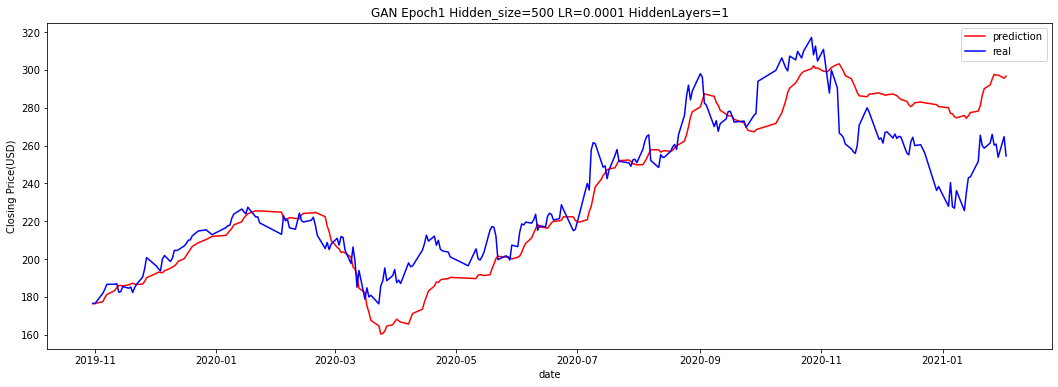

-----------------GAN: 50 epoch, Hidden Size: 500, Learning Rate: 0.0001, Hidden Layers: 1-----------------
epoch: 0, avg_d_loss = 0.17459115359568625, avg_g_loss = 0.09278579197908988, avg_dev_loss = 0.002803955255465816
epoch: 1, avg_d_loss = 0.17437554508712053, avg_g_loss = 0.08883349425590235, avg_dev_loss = 0.0023164396517743628
epoch: 2, avg_d_loss = 0.1743608752433187, avg_g_loss = 0.08875969819091874, avg_dev_loss = 0.0036243280261301723
epoch: 3, avg_d_loss = 0.17430992165748008, avg_g_loss = 0.08831717910573207, avg_dev_loss = 0.0026763789072462812
epoch: 4, avg_d_loss = 0.17424120513205293, avg_g_loss = 0.08814514423655617, avg_dev_loss = 0.0020906347639773736
epoch: 5, avg_d_loss = 0.17421463717374813, avg_g_loss = 0.08812061726518154, avg_dev_loss = 0.002124908121706415
epoch: 6, avg_d_loss = 0.17417048954691725, avg_g_loss = 0.08790799201063633, avg_dev_loss = 0.002297783922049936
epoch: 7, avg_d_loss = 0.1741568552677169, avg_g_loss = 0.08785280369987053, avg_dev_loss = 

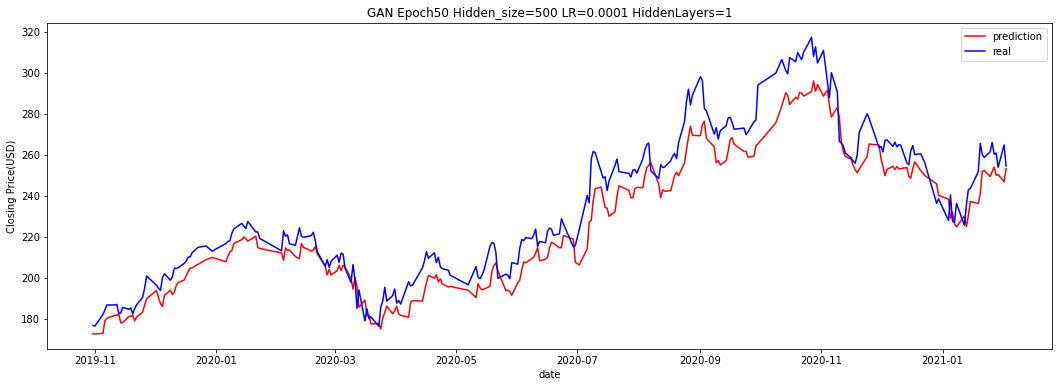

-----------------GAN: 100 epoch, Hidden Size: 500, Learning Rate: 0.0001, Hidden Layers: 1-----------------
epoch: 0, avg_d_loss = 0.17492279927842366, avg_g_loss = 0.0919049426025613, avg_dev_loss = 0.0067903497911451435
epoch: 1, avg_d_loss = 0.17452138972070885, avg_g_loss = 0.08877910097591173, avg_dev_loss = 0.002617474036298324
epoch: 2, avg_d_loss = 0.17434516303590647, avg_g_loss = 0.08829758224680699, avg_dev_loss = 0.003096590349769411
epoch: 3, avg_d_loss = 0.17428084320290763, avg_g_loss = 0.08809047597442743, avg_dev_loss = 0.0029085782841697847
epoch: 4, avg_d_loss = 0.17426788776697466, avg_g_loss = 0.08799100201694987, avg_dev_loss = 0.002590733682984635
epoch: 5, avg_d_loss = 0.17419237933382486, avg_g_loss = 0.08801564797098041, avg_dev_loss = 0.0021275376029907525
epoch: 6, avg_d_loss = 0.17420740121519912, avg_g_loss = 0.08789542147415219, avg_dev_loss = 0.002323626275014968
epoch: 7, avg_d_loss = 0.17417619784370877, avg_g_loss = 0.08771397579456615, avg_dev_loss =

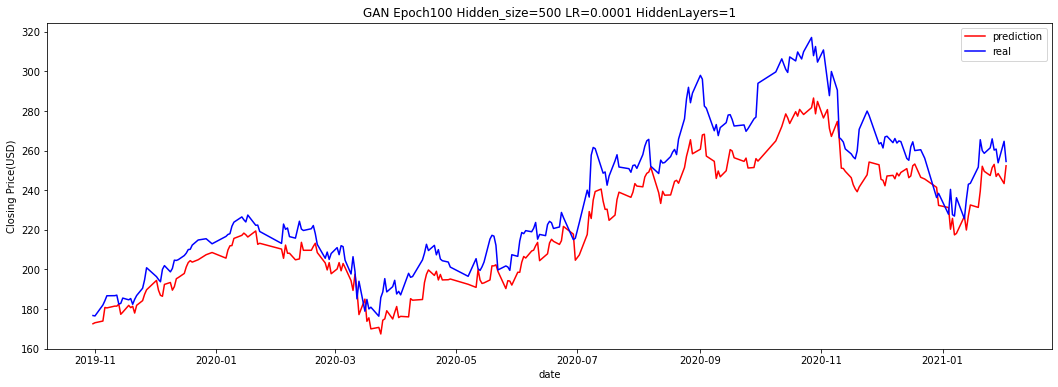

In [32]:
#hidden_size=500, num_layers=1 , lr = 1e-4
GAN(1e-4,500,1)

-----------------GAN: 1 epoch, Hidden Size: 500, Learning Rate: 0.0001, Hidden Layers: 2-----------------
epoch: 0, avg_d_loss = 0.17469252425001602, avg_g_loss = 0.0923560812446101, avg_dev_loss = 0.007106697052263942
avg_test_loss = 0.00632781960126577
RMSE = 16.576762195856592 ; MAE = 13.127442188992053; R2 = 0.7820697052128462


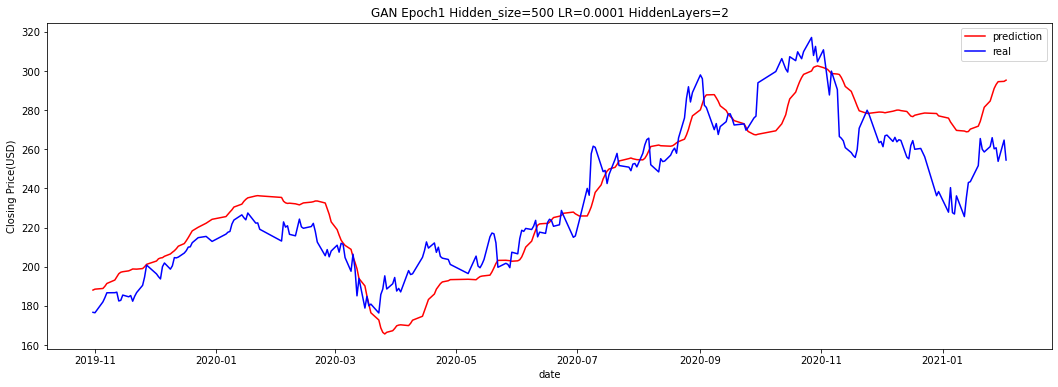

-----------------GAN: 50 epoch, Hidden Size: 500, Learning Rate: 0.0001, Hidden Layers: 2-----------------
epoch: 0, avg_d_loss = 0.17425612533047172, avg_g_loss = 0.09454618124303105, avg_dev_loss = 0.01725629989071944
epoch: 1, avg_d_loss = 0.17409068897498728, avg_g_loss = 0.09345100580210619, avg_dev_loss = 0.0045550191640400615
epoch: 2, avg_d_loss = 0.17457508648000894, avg_g_loss = 0.08910596672875196, avg_dev_loss = 0.003409537185734216
epoch: 3, avg_d_loss = 0.17423206832170185, avg_g_loss = 0.08921447022332891, avg_dev_loss = 0.003895995380647282
epoch: 4, avg_d_loss = 0.1741987049806254, avg_g_loss = 0.08851252203507418, avg_dev_loss = 0.0025334585769661478
epoch: 5, avg_d_loss = 0.1742640951287157, avg_g_loss = 0.08829666377624783, avg_dev_loss = 0.002743787433201369
epoch: 6, avg_d_loss = 0.1742104687769301, avg_g_loss = 0.08836470848405013, avg_dev_loss = 0.002408282016846617
epoch: 7, avg_d_loss = 0.17426767216284766, avg_g_loss = 0.08817570434625913, avg_dev_loss = 0.00

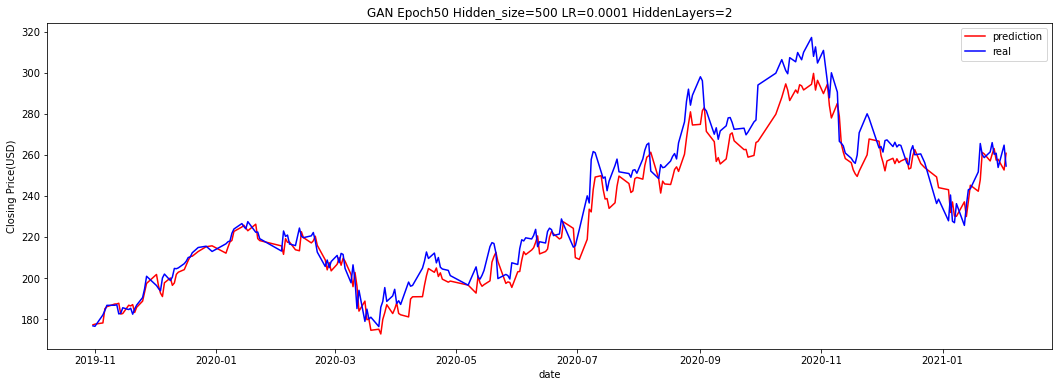

-----------------GAN: 100 epoch, Hidden Size: 500, Learning Rate: 0.0001, Hidden Layers: 2-----------------
epoch: 0, avg_d_loss = 0.17460643565246814, avg_g_loss = 0.09186256951705585, avg_dev_loss = 0.003127600459431514
epoch: 1, avg_d_loss = 0.17455330698813473, avg_g_loss = 0.08901955978649802, avg_dev_loss = 0.002839105416216778
epoch: 2, avg_d_loss = 0.1742649525592838, avg_g_loss = 0.08837678087981482, avg_dev_loss = 0.0028732253571426914
epoch: 3, avg_d_loss = 0.17425951335215598, avg_g_loss = 0.08830105117669727, avg_dev_loss = 0.0023893186815451307
epoch: 4, avg_d_loss = 0.17420015060100869, avg_g_loss = 0.08821479184848123, avg_dev_loss = 0.002396123940585457
epoch: 5, avg_d_loss = 0.17423222817395576, avg_g_loss = 0.08789149784165493, avg_dev_loss = 0.0022307179953208896
epoch: 6, avg_d_loss = 0.17424268504965895, avg_g_loss = 0.0879379264604305, avg_dev_loss = 0.0022435343856197346
epoch: 7, avg_d_loss = 0.17421967523935025, avg_g_loss = 0.0877619746822217, avg_dev_loss = 

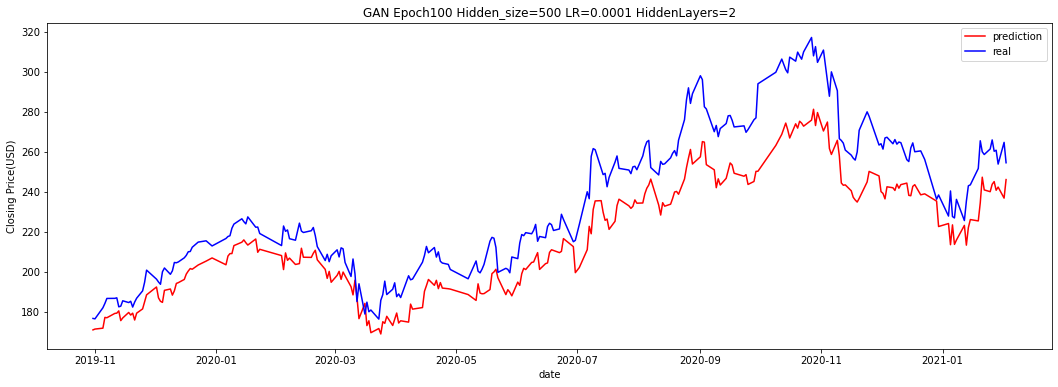

In [101]:
GAN(1e-4,500,2)

In [ ]:
#GAN(1e-4,500,2,epoch=[99])

-----------------GAN: 1 epoch, Hidden Size: 250, Learning Rate: 0.0001, Hidden Layers: 1-----------------
epoch: 0, avg_d_loss = 0.1746772841960003, avg_g_loss = 0.09283916858061488, avg_dev_loss = 0.006511063191034041
avg_test_loss = 0.006788910027932037
RMSE = 18.994696528182082 ; MAE = 14.084002028970579; R2 = 0.7138571420693796


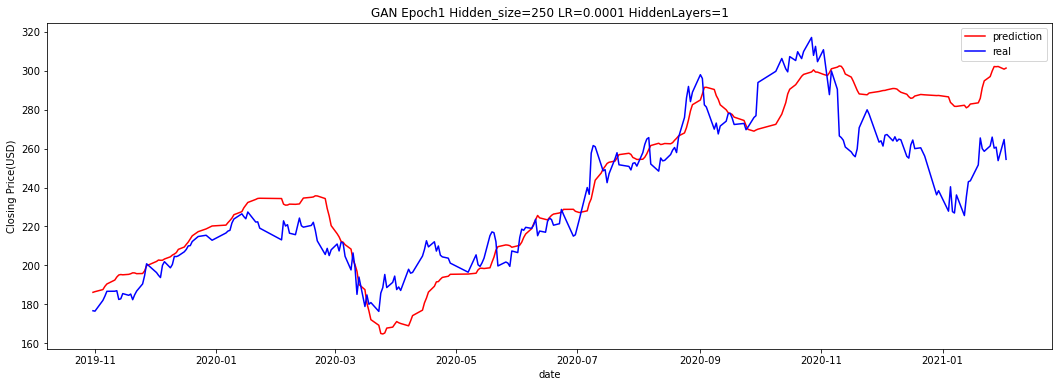

-----------------GAN: 50 epoch, Hidden Size: 250, Learning Rate: 0.0001, Hidden Layers: 1-----------------
epoch: 0, avg_d_loss = 0.17476830419025494, avg_g_loss = 0.09355875166045698, avg_dev_loss = 0.0077366907390351534
epoch: 1, avg_d_loss = 0.174519278855076, avg_g_loss = 0.08962848793871049, avg_dev_loss = 0.003149991762955379
epoch: 2, avg_d_loss = 0.1743284941323961, avg_g_loss = 0.08856176778541923, avg_dev_loss = 0.0028110220603389884
epoch: 3, avg_d_loss = 0.174283513249251, avg_g_loss = 0.08843238249477778, avg_dev_loss = 0.0050079244907817915
epoch: 4, avg_d_loss = 0.17419394869617033, avg_g_loss = 0.08821396931949224, avg_dev_loss = 0.0024075717753783833
epoch: 5, avg_d_loss = 0.1741666805910369, avg_g_loss = 0.08788367346665706, avg_dev_loss = 0.0023367063995776522
epoch: 6, avg_d_loss = 0.17418643790657226, avg_g_loss = 0.0878744240193917, avg_dev_loss = 0.0023673748377951377
epoch: 7, avg_d_loss = 0.17418512146735826, avg_g_loss = 0.0878434710025183, avg_dev_loss = 0.00

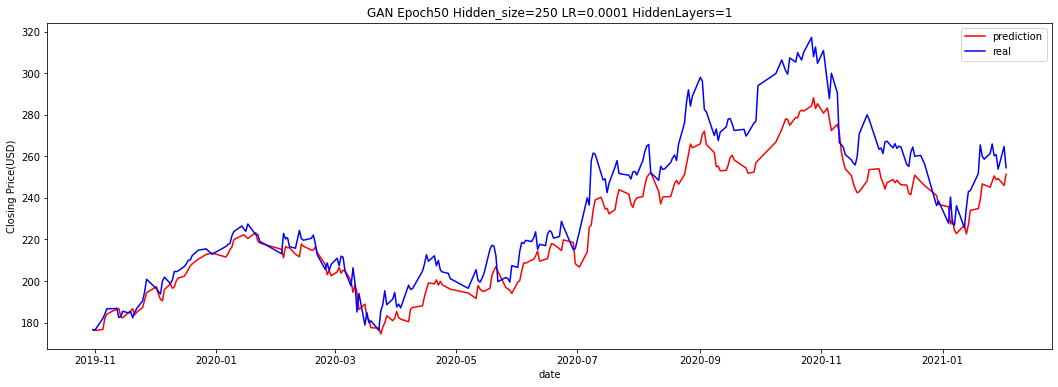

-----------------GAN: 100 epoch, Hidden Size: 250, Learning Rate: 0.0001, Hidden Layers: 1-----------------
epoch: 0, avg_d_loss = 0.17424923536593168, avg_g_loss = 0.09347349737684688, avg_dev_loss = 0.003287369959028048
epoch: 1, avg_d_loss = 0.17455370420134414, avg_g_loss = 0.0889483953156852, avg_dev_loss = 0.002881464502374029
epoch: 2, avg_d_loss = 0.1742968991379925, avg_g_loss = 0.08830401917072002, avg_dev_loss = 0.002492736890458789
epoch: 3, avg_d_loss = 0.1743107656411194, avg_g_loss = 0.08792984772695486, avg_dev_loss = 0.0025053415943234593
epoch: 4, avg_d_loss = 0.1742141897989619, avg_g_loss = 0.08796698889955973, avg_dev_loss = 0.002843278577062567
epoch: 5, avg_d_loss = 0.17414449784238983, avg_g_loss = 0.08781593025712761, avg_dev_loss = 0.0021068833825026176
epoch: 6, avg_d_loss = 0.17417076679539167, avg_g_loss = 0.0877461601119531, avg_dev_loss = 0.0030053837345240236
epoch: 7, avg_d_loss = 0.1741403306542845, avg_g_loss = 0.08772248822926569, avg_dev_loss = 0.00

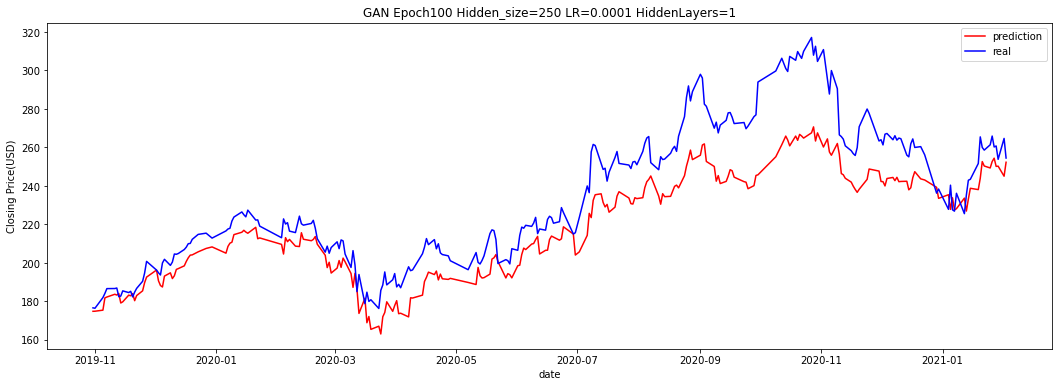

In [36]:
GAN(1e-4,250,1)

-----------------GAN: 1 epoch, Hidden Size: 500, Learning Rate: 0.0001, Hidden Layers: 3-----------------
epoch: 0, avg_d_loss = 0.17482528441759118, avg_g_loss = 0.09244917146153322, avg_dev_loss = 0.007889232240588946
avg_test_loss = 0.021698531610044567
RMSE = 57.113176628921146 ; MAE = 45.01490859617174; R2 = -1.5869666155043483


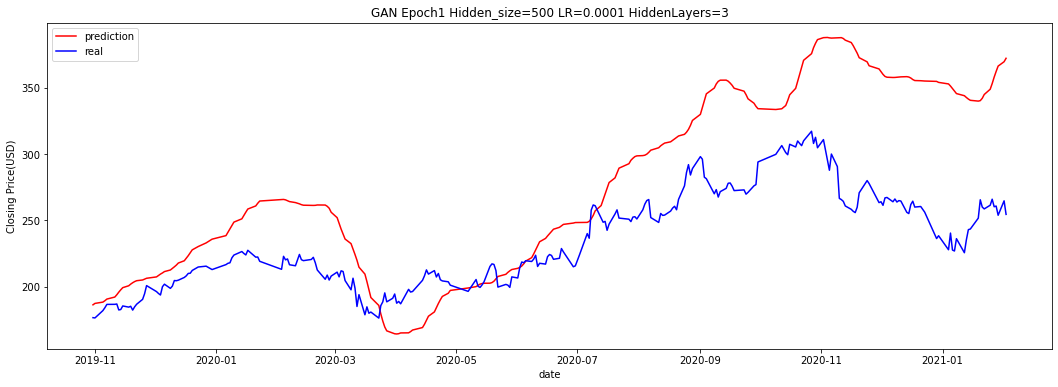

-----------------GAN: 50 epoch, Hidden Size: 500, Learning Rate: 0.0001, Hidden Layers: 3-----------------
epoch: 0, avg_d_loss = 0.1743699866707032, avg_g_loss = 0.09328058909705081, avg_dev_loss = 0.011019299975366194
epoch: 1, avg_d_loss = 0.17419390790211686, avg_g_loss = 0.09096759308427006, avg_dev_loss = 0.004923416379513396
epoch: 2, avg_d_loss = 0.17434251535074793, avg_g_loss = 0.08908719443851854, avg_dev_loss = 0.003890613483498758
epoch: 3, avg_d_loss = 0.17437501929709817, avg_g_loss = 0.08860291440526191, avg_dev_loss = 0.006103262361918113
epoch: 4, avg_d_loss = 0.17423195440053033, avg_g_loss = 0.08840400932406291, avg_dev_loss = 0.002974816318247255
epoch: 5, avg_d_loss = 0.1741996136303939, avg_g_loss = 0.08863267374280438, avg_dev_loss = 0.003052621817804108
epoch: 6, avg_d_loss = 0.17422008771255745, avg_g_loss = 0.0881350570758486, avg_dev_loss = 0.0026996152000962103
epoch: 7, avg_d_loss = 0.17415258050418173, avg_g_loss = 0.0882109218526098, avg_dev_loss = 0.004

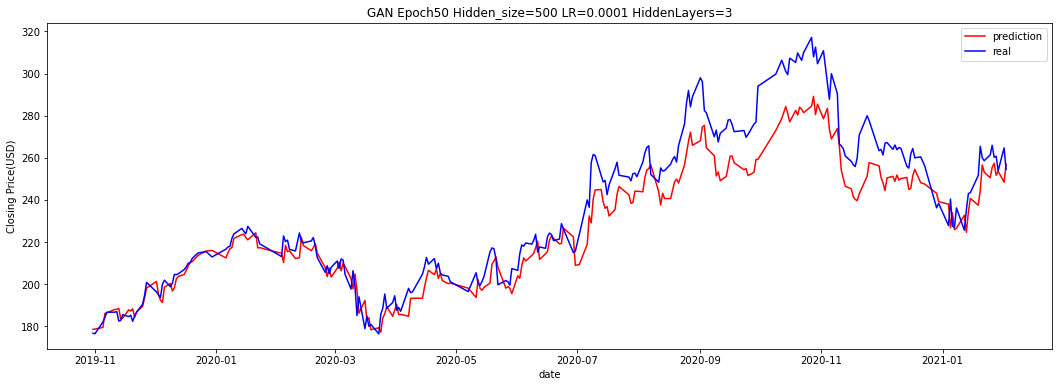

-----------------GAN: 100 epoch, Hidden Size: 500, Learning Rate: 0.0001, Hidden Layers: 3-----------------
epoch: 0, avg_d_loss = 0.17460437902781747, avg_g_loss = 0.09415229131362586, avg_dev_loss = 0.0038010934119895386
epoch: 1, avg_d_loss = 0.17439564960537754, avg_g_loss = 0.09099802839438725, avg_dev_loss = 0.0047823298410884325
epoch: 2, avg_d_loss = 0.1744032927490157, avg_g_loss = 0.08935962505969107, avg_dev_loss = 0.003446837979237843
epoch: 3, avg_d_loss = 0.17434080804406615, avg_g_loss = 0.08866056765893567, avg_dev_loss = 0.004521803951648705
epoch: 4, avg_d_loss = 0.17419242299857096, avg_g_loss = 0.08904148991419185, avg_dev_loss = 0.006289970172222123
epoch: 5, avg_d_loss = 0.17419067036516314, avg_g_loss = 0.08831717336434677, avg_dev_loss = 0.0032530728685085312
epoch: 6, avg_d_loss = 0.17427910250553763, avg_g_loss = 0.08886939173868853, avg_dev_loss = 0.004251488487983385
epoch: 7, avg_d_loss = 0.17419997971925144, avg_g_loss = 0.08821441918724843, avg_dev_loss =

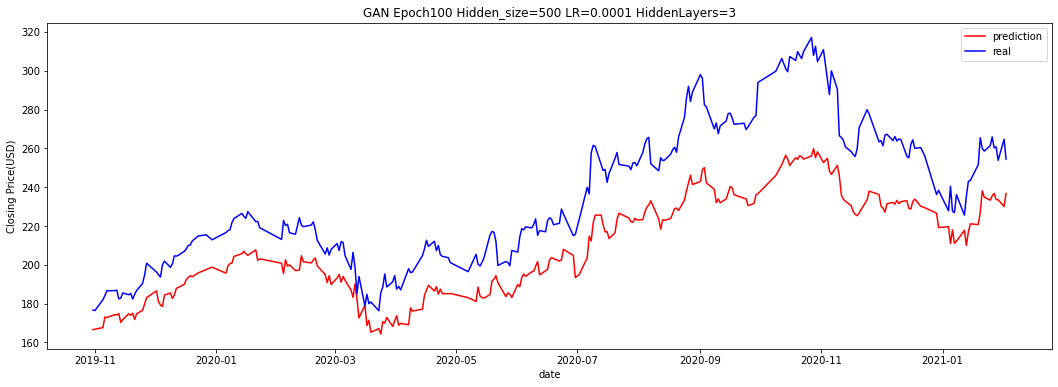

In [37]:
GAN(1e-4,500,3)

-----------------GAN: 1 epoch, Hidden Size: 500, Learning Rate: 0.001, Hidden Layers: 1-----------------
epoch: 0, avg_d_loss = 0.17649136780181615, avg_g_loss = 0.09262483715255602, avg_dev_loss = 0.002082064025415667
avg_test_loss = 0.005617996931753375
RMSE = 15.077145664048347 ; MAE = 11.654872474635141; R2 = 0.8197163039496645


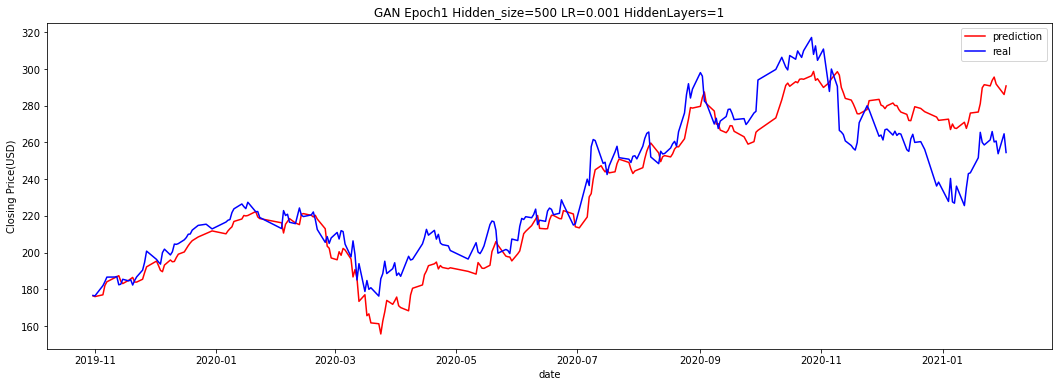

-----------------GAN: 50 epoch, Hidden Size: 500, Learning Rate: 0.001, Hidden Layers: 1-----------------
epoch: 0, avg_d_loss = 0.17640997747051398, avg_g_loss = 0.09195113529572771, avg_dev_loss = 0.0030435140212792407
epoch: 1, avg_d_loss = 0.17403724952040214, avg_g_loss = 0.0871061190906133, avg_dev_loss = 0.0022163277796466087
epoch: 2, avg_d_loss = 0.1739831767003648, avg_g_loss = 0.08707759762595967, avg_dev_loss = 0.0025348740102220397
epoch: 3, avg_d_loss = 0.173994052697195, avg_g_loss = 0.08711758660121864, avg_dev_loss = 0.002077422150810862
epoch: 4, avg_d_loss = 0.17399516320198358, avg_g_loss = 0.08701437145131623, avg_dev_loss = 0.0023536166183282213
epoch: 5, avg_d_loss = 0.17398067436290784, avg_g_loss = 0.08705558077312997, avg_dev_loss = 0.0018081401258763705
epoch: 6, avg_d_loss = 0.17399465856443339, avg_g_loss = 0.08705909321667728, avg_dev_loss = 0.003262550736504816
epoch: 7, avg_d_loss = 0.17403469097780486, avg_g_loss = 0.0870881834561985, avg_dev_loss = 0.0

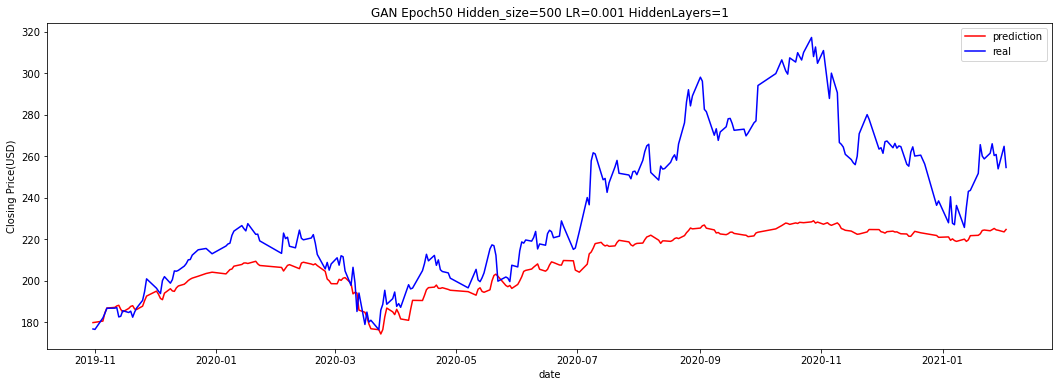

-----------------GAN: 100 epoch, Hidden Size: 500, Learning Rate: 0.001, Hidden Layers: 1-----------------
epoch: 0, avg_d_loss = 0.17640661543615266, avg_g_loss = 0.09112308173427412, avg_dev_loss = 0.002438572607226245
epoch: 1, avg_d_loss = 0.17403601648236408, avg_g_loss = 0.08714400301716929, avg_dev_loss = 0.0026012697742239153
epoch: 2, avg_d_loss = 0.17397202904535639, avg_g_loss = 0.08709189088021244, avg_dev_loss = 0.0020087013665600873
epoch: 3, avg_d_loss = 0.1739819833987566, avg_g_loss = 0.08708469284502424, avg_dev_loss = 0.0021868577800662798
epoch: 4, avg_d_loss = 0.1739722893718531, avg_g_loss = 0.08706347381811783, avg_dev_loss = 0.0020670828837972177
epoch: 5, avg_d_loss = 0.174015614469695, avg_g_loss = 0.08708554763153327, avg_dev_loss = 0.002345957102771041
epoch: 6, avg_d_loss = 0.1740190148806844, avg_g_loss = 0.0870673063438957, avg_dev_loss = 0.0024651443309543705
epoch: 7, avg_d_loss = 0.1739911706728627, avg_g_loss = 0.0870642608411714, avg_dev_loss = 0.002

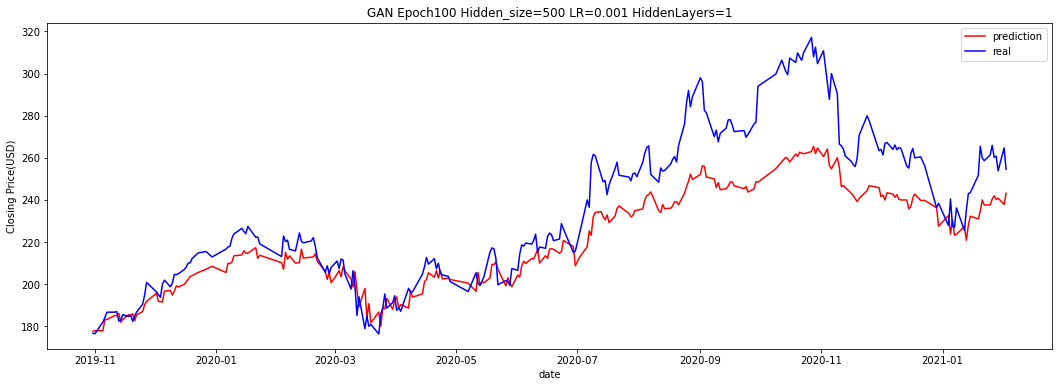

In [38]:
GAN(1e-3,500,1)

-----------------GAN: 1 epoch, Hidden Size: 500, Learning Rate: 0.01, Hidden Layers: 1-----------------
epoch: 0, avg_d_loss = 0.022959278320986008, avg_g_loss = 1.8669483626523398, avg_dev_loss = 13.893579142175247
avg_test_loss = 13.905269825097287
RMSE = 28847.388661250417 ; MAE = 28847.31794180843; R2 = -659979.6511703662


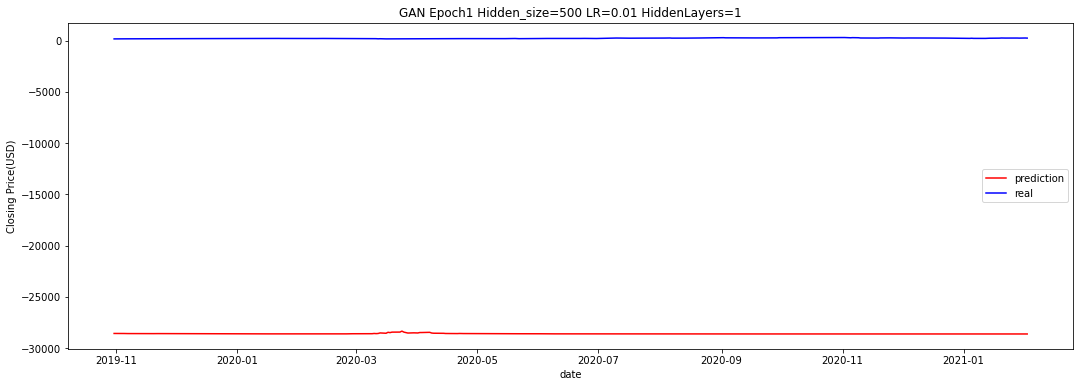

-----------------GAN: 50 epoch, Hidden Size: 500, Learning Rate: 0.01, Hidden Layers: 1-----------------
epoch: 0, avg_d_loss = 0.14946191321679653, avg_g_loss = 1.1802954175971707, avg_dev_loss = 1.6223546488656744
epoch: 1, avg_d_loss = 0.1506017027518346, avg_g_loss = 1.3794713235036464, avg_dev_loss = 0.08668838050428905
epoch: 2, avg_d_loss = 0.033687105198476064, avg_g_loss = 0.7714820378784596, avg_dev_loss = 1.3908062126246696
epoch: 3, avg_d_loss = 2.9359428217284577e-05, avg_g_loss = 1.1306993619872892, avg_dev_loss = 1.3658287352935443
epoch: 4, avg_d_loss = 2.176564874237283e-05, avg_g_loss = 1.1963028587467015, avg_dev_loss = 1.3444176082828652
epoch: 5, avg_d_loss = 1.4571094551198634e-05, avg_g_loss = 1.242208449408431, avg_dev_loss = 1.315962573874586
epoch: 6, avg_d_loss = 1.1290049044681236e-05, avg_g_loss = 1.2779636044617086, avg_dev_loss = 1.2766309274013505
epoch: 7, avg_d_loss = 9.413220056992778e-06, avg_g_loss = 1.3071080378253197, avg_dev_loss = 1.201590806359

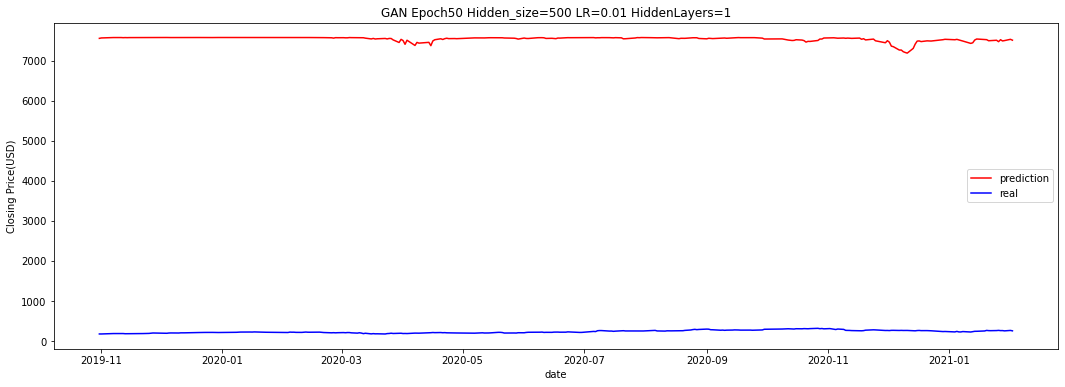

-----------------GAN: 100 epoch, Hidden Size: 500, Learning Rate: 0.01, Hidden Layers: 1-----------------
epoch: 0, avg_d_loss = 0.22278813547389853, avg_g_loss = 0.3111875593052594, avg_dev_loss = 0.015246658724070501
epoch: 1, avg_d_loss = 0.17392444716358063, avg_g_loss = 0.08730068761284059, avg_dev_loss = 0.013990188817787533
epoch: 2, avg_d_loss = 0.12753164770203515, avg_g_loss = 0.6359930585772365, avg_dev_loss = 0.1363218458433115
epoch: 3, avg_d_loss = 0.016672768434109135, avg_g_loss = 1.6577742628573766, avg_dev_loss = 2.061940508650283
epoch: 4, avg_d_loss = 0.03649050218629484, avg_g_loss = 1.282438476124946, avg_dev_loss = 2.581834183899622
epoch: 5, avg_d_loss = 8.773262964349703e-05, avg_g_loss = 1.1425196631930779, avg_dev_loss = 1.7668891768945034
epoch: 6, avg_d_loss = 0.13977687975914213, avg_g_loss = 0.7300943954740338, avg_dev_loss = 0.1395896763855967
epoch: 7, avg_d_loss = 0.17397453213825878, avg_g_loss = 0.08723403964810196, avg_dev_loss = 0.02385943317821270

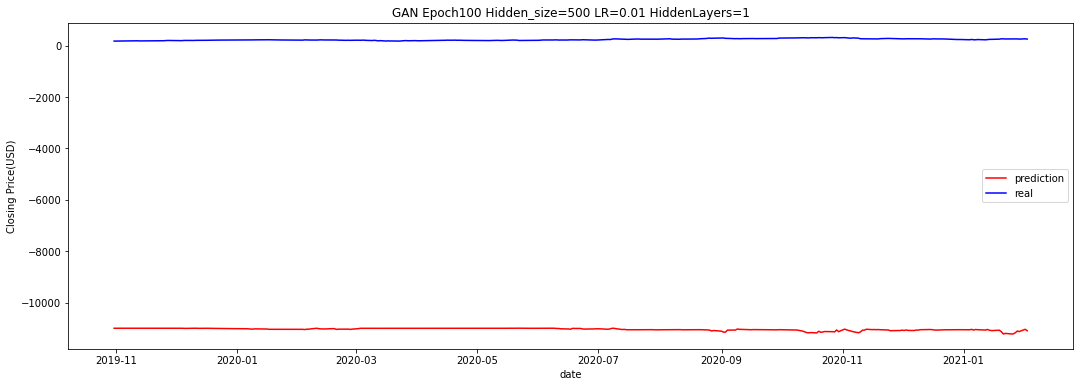

In [39]:
GAN(1e-2,500,1)

-----------------GAN: 1 epoch, Hidden Size: 500, Learning Rate: 0.001, Hidden Layers: 2-----------------
epoch: 0, avg_d_loss = 0.17608560295008283, avg_g_loss = 0.09204100791945657, avg_dev_loss = 0.00557454100353183
avg_test_loss = 0.010721379284267172
RMSE = 25.519872474865288 ; MAE = 22.242146066200245; R2 = 0.4834942134188004


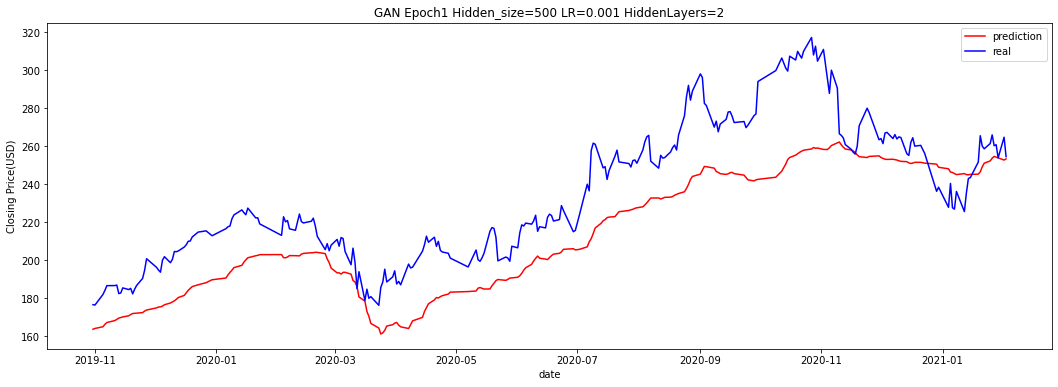

-----------------GAN: 50 epoch, Hidden Size: 500, Learning Rate: 0.001, Hidden Layers: 2-----------------
epoch: 0, avg_d_loss = 0.17594468669141955, avg_g_loss = 0.09022295033070524, avg_dev_loss = 0.0027759370992505505
epoch: 1, avg_d_loss = 0.1739998326102137, avg_g_loss = 0.08712475109462955, avg_dev_loss = 0.004058632503897518
epoch: 2, avg_d_loss = 0.17400000802464358, avg_g_loss = 0.08704183748315344, avg_dev_loss = 0.003747024144906508
epoch: 3, avg_d_loss = 0.17398757127754588, avg_g_loss = 0.08711171527930237, avg_dev_loss = 0.0028169351513054885
epoch: 4, avg_d_loss = 0.17398309163720888, avg_g_loss = 0.08704625087092585, avg_dev_loss = 0.002089960815760346
epoch: 5, avg_d_loss = 0.174032256630437, avg_g_loss = 0.08705724653031285, avg_dev_loss = 0.002523709598489587
epoch: 6, avg_d_loss = 0.17405484731961868, avg_g_loss = 0.08703988208819101, avg_dev_loss = 0.0033485079077940024
epoch: 7, avg_d_loss = 0.17401747271437457, avg_g_loss = 0.0870772556358115, avg_dev_loss = 0.00

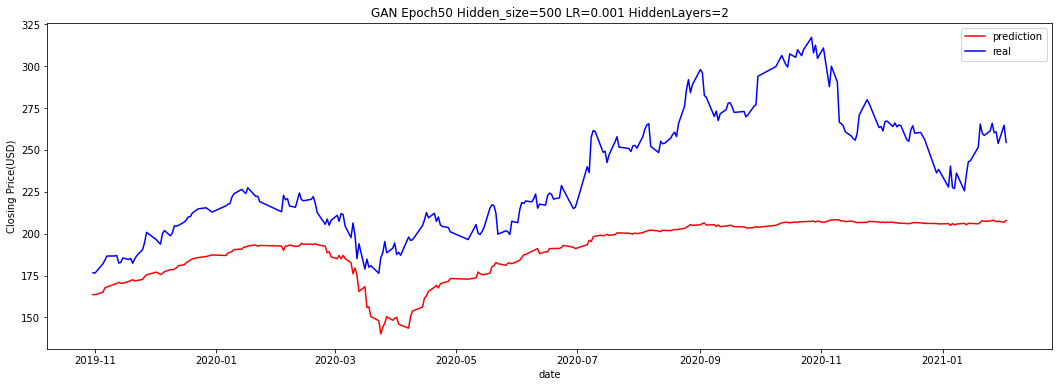

-----------------GAN: 100 epoch, Hidden Size: 500, Learning Rate: 0.001, Hidden Layers: 2-----------------
epoch: 0, avg_d_loss = 0.17612679059061262, avg_g_loss = 0.0913325843551162, avg_dev_loss = 0.008369336025116561
epoch: 1, avg_d_loss = 0.17400268562544133, avg_g_loss = 0.08722252922819594, avg_dev_loss = 0.0025149470499713157
epoch: 2, avg_d_loss = 0.1739939420999834, avg_g_loss = 0.08712612751621106, avg_dev_loss = 0.004883355641659675
epoch: 3, avg_d_loss = 0.17398855758710505, avg_g_loss = 0.08712588056109855, avg_dev_loss = 0.0025200531623209383
epoch: 4, avg_d_loss = 0.17399084401825687, avg_g_loss = 0.08709349733492872, avg_dev_loss = 0.0030077097108835503
epoch: 5, avg_d_loss = 0.1740375186100659, avg_g_loss = 0.08711555891012814, avg_dev_loss = 0.0017850945593909618
epoch: 6, avg_d_loss = 0.1740217986971102, avg_g_loss = 0.08708376666892165, avg_dev_loss = 0.0024533003795282923
epoch: 7, avg_d_loss = 0.17396686814432663, avg_g_loss = 0.0870290465832361, avg_dev_loss = 0.

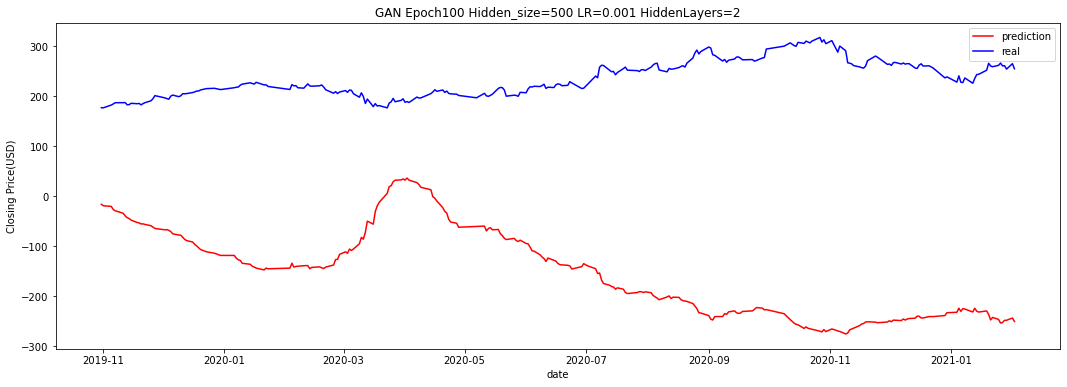

In [40]:
GAN(1e-3,500,2)

-----------------GAN: 1 epoch, Hidden Size: 750, Learning Rate: 0.0001, Hidden Layers: 1-----------------
epoch: 0, avg_d_loss = 0.17472857395505723, avg_g_loss = 0.09108181492306283, avg_dev_loss = 0.003392121219872975
avg_test_loss = 0.00643926187220848
RMSE = 18.753860377874425 ; MAE = 13.358635762834638; R2 = 0.7210672243663079


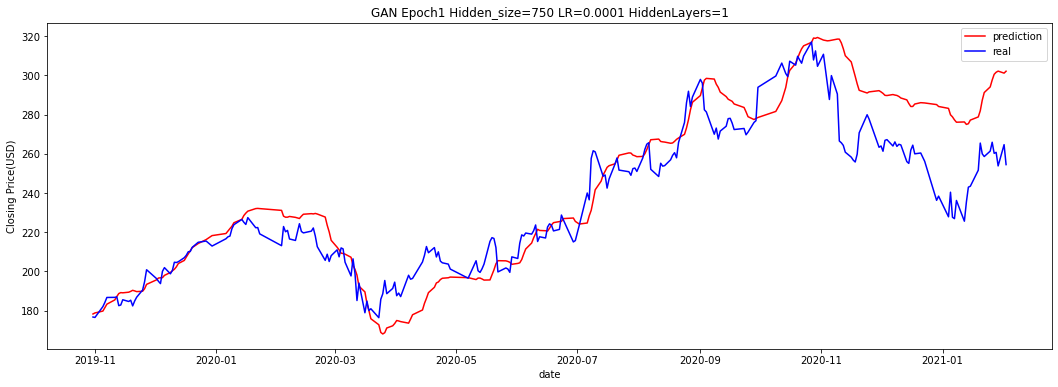

-----------------GAN: 50 epoch, Hidden Size: 750, Learning Rate: 0.0001, Hidden Layers: 1-----------------
epoch: 0, avg_d_loss = 0.17495524354458458, avg_g_loss = 0.09409047283600491, avg_dev_loss = 0.016447261910701432
epoch: 1, avg_d_loss = 0.17458476872196366, avg_g_loss = 0.09031592779739728, avg_dev_loss = 0.0027998471526365317
epoch: 2, avg_d_loss = 0.17444491401522483, avg_g_loss = 0.08852131889497977, avg_dev_loss = 0.0024212158812712808
epoch: 3, avg_d_loss = 0.17426835916492572, avg_g_loss = 0.08859010446811962, avg_dev_loss = 0.002892622610858638
epoch: 4, avg_d_loss = 0.1742677502759056, avg_g_loss = 0.0880989834231871, avg_dev_loss = 0.002405100420627304
epoch: 5, avg_d_loss = 0.17423292620553715, avg_g_loss = 0.08808527284399789, avg_dev_loss = 0.0030045800562593875
epoch: 6, avg_d_loss = 0.17421463732483722, avg_g_loss = 0.08793285659057559, avg_dev_loss = 0.0022003730341168862
epoch: 7, avg_d_loss = 0.17412200853398543, avg_g_loss = 0.08789480888344943, avg_dev_loss = 

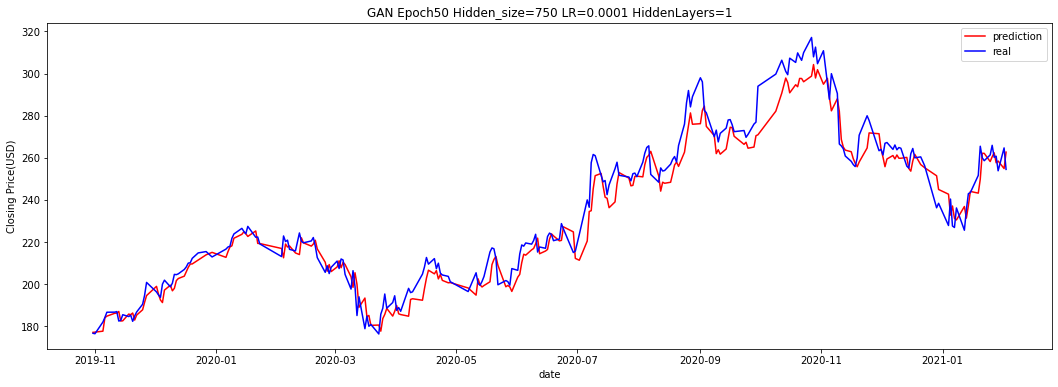

-----------------GAN: 100 epoch, Hidden Size: 750, Learning Rate: 0.0001, Hidden Layers: 1-----------------
epoch: 0, avg_d_loss = 0.17449103879384667, avg_g_loss = 0.09378845715855162, avg_dev_loss = 0.002751640557619555
epoch: 1, avg_d_loss = 0.17448376189015513, avg_g_loss = 0.08939343562446468, avg_dev_loss = 0.0030646976012694066
epoch: 2, avg_d_loss = 0.1743291080073561, avg_g_loss = 0.08882633550387674, avg_dev_loss = 0.002452739709173772
epoch: 3, avg_d_loss = 0.17420533794262866, avg_g_loss = 0.08839106008278251, avg_dev_loss = 0.0026605197444501483
epoch: 4, avg_d_loss = 0.1742591502850802, avg_g_loss = 0.08841386184341857, avg_dev_loss = 0.0025605868137381377
epoch: 5, avg_d_loss = 0.17414307020160785, avg_g_loss = 0.08812428585930016, avg_dev_loss = 0.002051041532350357
epoch: 6, avg_d_loss = 0.17421642848596222, avg_g_loss = 0.08798785029859749, avg_dev_loss = 0.002295154100815153
epoch: 7, avg_d_loss = 0.17425422024817522, avg_g_loss = 0.08796188329713578, avg_dev_loss = 

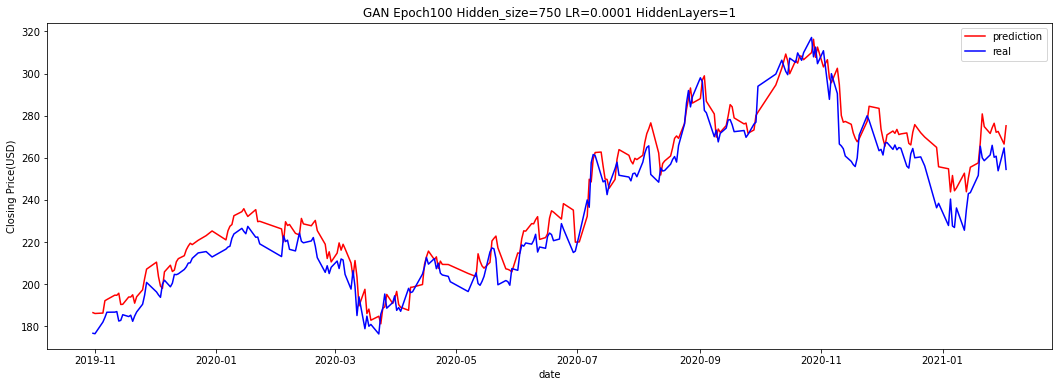

In [41]:
GAN(1e-4,750,1)

-----------------GAN: 1 epoch, Hidden Size: 750, Learning Rate: 0.001, Hidden Layers: 1-----------------
epoch: 0, avg_d_loss = 0.17584197708560184, avg_g_loss = 0.08990588040104082, avg_dev_loss = 0.0029565949708280003
avg_test_loss = 0.00620887182991613
RMSE = 16.01876062375565 ; MAE = 12.880677856957343; R2 = 0.7964945638435734


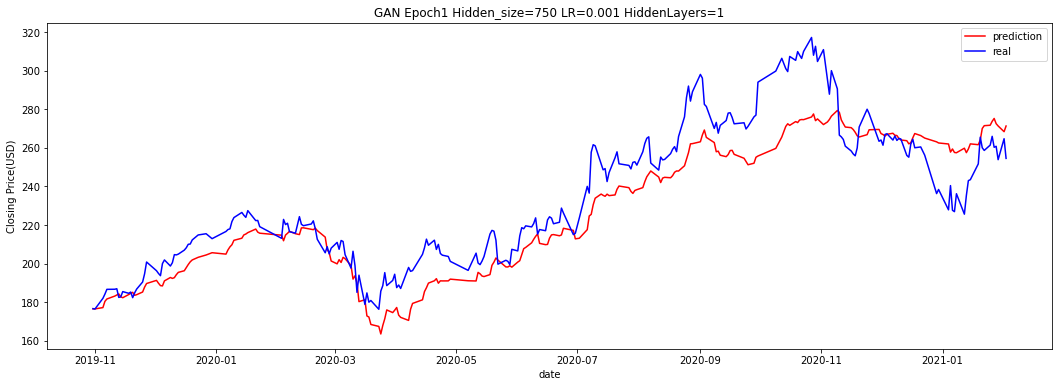

-----------------GAN: 50 epoch, Hidden Size: 750, Learning Rate: 0.001, Hidden Layers: 1-----------------
epoch: 0, avg_d_loss = 0.17564251622319674, avg_g_loss = 0.09252251682777066, avg_dev_loss = 0.0033229176564135024
epoch: 1, avg_d_loss = 0.17403729409168278, avg_g_loss = 0.08712571897132013, avg_dev_loss = 0.0021919537434786445
epoch: 2, avg_d_loss = 0.17406261042799182, avg_g_loss = 0.08705267298810836, avg_dev_loss = 0.0021008148491949183
epoch: 3, avg_d_loss = 0.17399646211486353, avg_g_loss = 0.08706609256971623, avg_dev_loss = 0.0021477825514717246
epoch: 4, avg_d_loss = 0.173998508012189, avg_g_loss = 0.08701229246548071, avg_dev_loss = 0.0027382098449953607
epoch: 5, avg_d_loss = 0.17401704588770414, avg_g_loss = 0.0870512246481215, avg_dev_loss = 0.001938116619852106
epoch: 6, avg_d_loss = 0.17403410052165333, avg_g_loss = 0.08708057763156479, avg_dev_loss = 0.002194056974391067
epoch: 7, avg_d_loss = 0.174005204884876, avg_g_loss = 0.08701956075709431, avg_dev_loss = 0.0

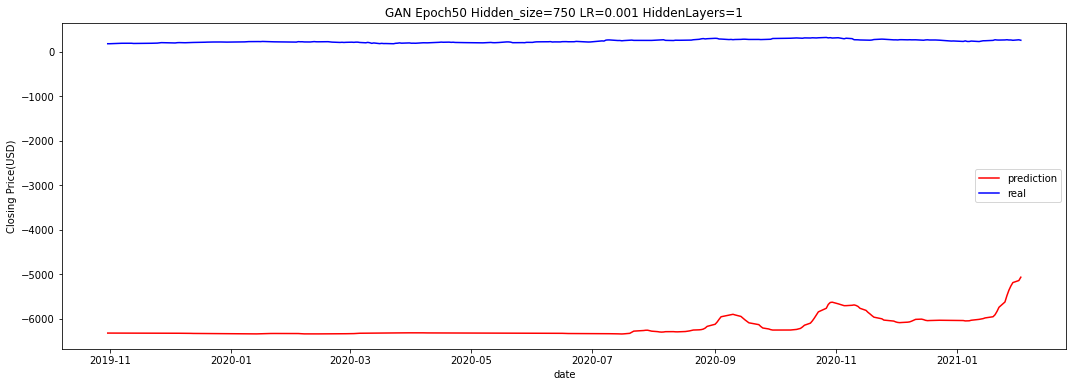

-----------------GAN: 100 epoch, Hidden Size: 750, Learning Rate: 0.001, Hidden Layers: 1-----------------
epoch: 0, avg_d_loss = 0.1765327891771633, avg_g_loss = 0.09028091766081836, avg_dev_loss = 0.00241517020608989
epoch: 1, avg_d_loss = 0.1739961028250149, avg_g_loss = 0.08711945867054967, avg_dev_loss = 0.0021721702175278627
epoch: 2, avg_d_loss = 0.1740047916562234, avg_g_loss = 0.08713435189956646, avg_dev_loss = 0.0018748698416148303
epoch: 3, avg_d_loss = 0.17399519009584105, avg_g_loss = 0.08709343561503673, avg_dev_loss = 0.0018829029237589455
epoch: 4, avg_d_loss = 0.17398975209742595, avg_g_loss = 0.08706196088754632, avg_dev_loss = 0.0024309993116008012
epoch: 5, avg_d_loss = 0.1739737624904502, avg_g_loss = 0.08702194962664703, avg_dev_loss = 0.0022216454544901395
epoch: 6, avg_d_loss = 0.17400668117634394, avg_g_loss = 0.0870334892067468, avg_dev_loss = 0.001734082038184989
epoch: 7, avg_d_loss = 0.17404322766230285, avg_g_loss = 0.08711945451559978, avg_dev_loss = 0.0

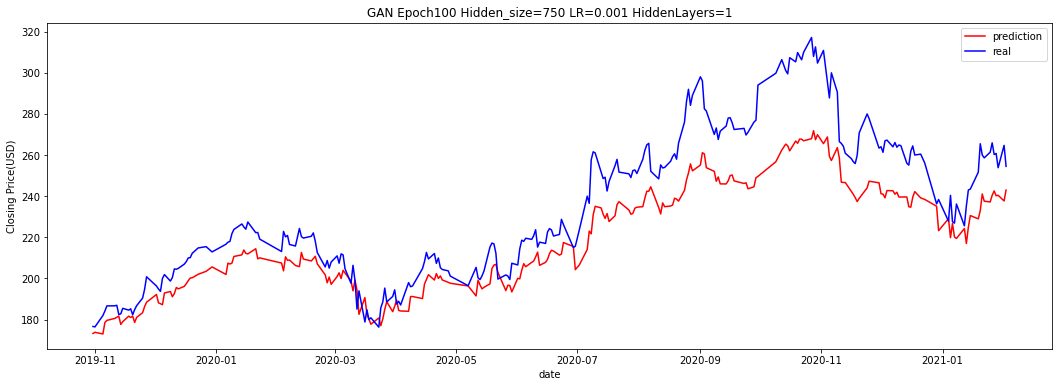

In [103]:
GAN(1e-3,750,1)

-----------------GAN: 1 epoch, Hidden Size: 750, Learning Rate: 0.0001, Hidden Layers: 2-----------------
epoch: 0, avg_d_loss = 0.17475426302814362, avg_g_loss = 0.09175307261173263, avg_dev_loss = 0.00630733969943605
avg_test_loss = 0.013108310727120348
RMSE = 30.28946648643901 ; MAE = 27.193978553091625; R2 = 0.2723853421818684


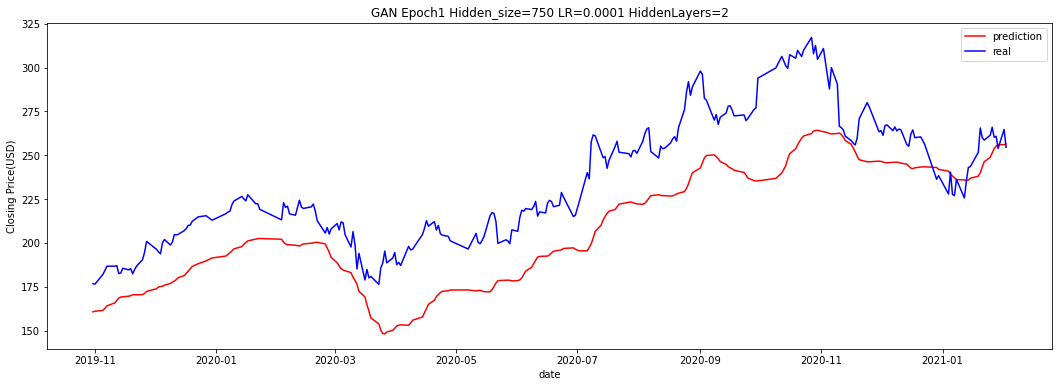

-----------------GAN: 50 epoch, Hidden Size: 750, Learning Rate: 0.0001, Hidden Layers: 2-----------------
epoch: 0, avg_d_loss = 0.17471232371940662, avg_g_loss = 0.09269528047515714, avg_dev_loss = 0.010056093703431322
epoch: 1, avg_d_loss = 0.17444532059595763, avg_g_loss = 0.09114297465226497, avg_dev_loss = 0.0042748794582860095
epoch: 2, avg_d_loss = 0.17435801920630936, avg_g_loss = 0.08925423158287851, avg_dev_loss = 0.0027708473116046122
epoch: 3, avg_d_loss = 0.1742910823592366, avg_g_loss = 0.08864902075101516, avg_dev_loss = 0.0027435307564504245
epoch: 4, avg_d_loss = 0.1742237603860814, avg_g_loss = 0.08862320952240203, avg_dev_loss = 0.0024760041258407636
epoch: 5, avg_d_loss = 0.17419061687962636, avg_g_loss = 0.08844148395028253, avg_dev_loss = 0.002243496714860994
epoch: 6, avg_d_loss = 0.17415547401128462, avg_g_loss = 0.08831559153715166, avg_dev_loss = 0.003134373171757836
epoch: 7, avg_d_loss = 0.1742025337291761, avg_g_loss = 0.08795316167959545, avg_dev_loss = 0

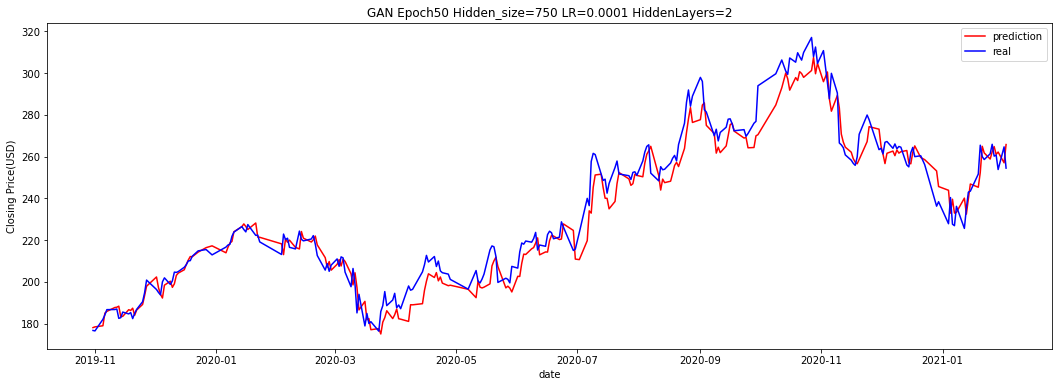

-----------------GAN: 100 epoch, Hidden Size: 750, Learning Rate: 0.0001, Hidden Layers: 2-----------------
epoch: 0, avg_d_loss = 0.17456485442486705, avg_g_loss = 0.0931600854272927, avg_dev_loss = 0.010629901414588376
epoch: 1, avg_d_loss = 0.17447052331327334, avg_g_loss = 0.0894345468139165, avg_dev_loss = 0.004341944358081419
epoch: 2, avg_d_loss = 0.1743161826381514, avg_g_loss = 0.08893861690552667, avg_dev_loss = 0.00463153678258109
epoch: 3, avg_d_loss = 0.17431956416300495, avg_g_loss = 0.08832456328267531, avg_dev_loss = 0.00265372074970501
epoch: 4, avg_d_loss = 0.17421470954542076, avg_g_loss = 0.08813541946302349, avg_dev_loss = 0.0031941456281130306
epoch: 5, avg_d_loss = 0.17418482578601524, avg_g_loss = 0.08801374439957477, avg_dev_loss = 0.0021221431064288427
epoch: 6, avg_d_loss = 0.1742087286839165, avg_g_loss = 0.08798589218403148, avg_dev_loss = 0.0027270393637309964
epoch: 7, avg_d_loss = 0.17417987127267814, avg_g_loss = 0.08799639076032263, avg_dev_loss = 0.00

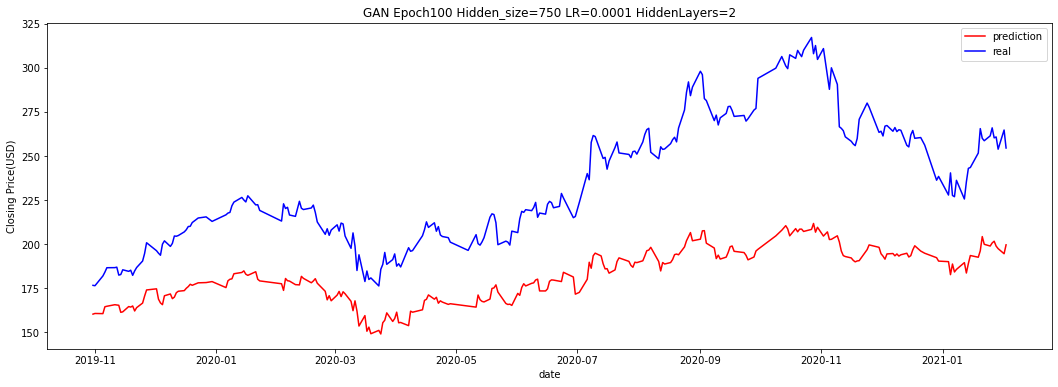

In [104]:
GAN(1e-4,750,2)

-----------------GAN: 1 epoch, Hidden Size: 750, Learning Rate: 0.0001, Hidden Layers: 3-----------------
epoch: 0, avg_d_loss = 0.1744525039755044, avg_g_loss = 0.09328483998851027, avg_dev_loss = 0.008251002646217781
avg_test_loss = 0.016090326448620268
RMSE = 42.431326577001215 ; MAE = 33.38034926937772; R2 = -0.4278790161765704


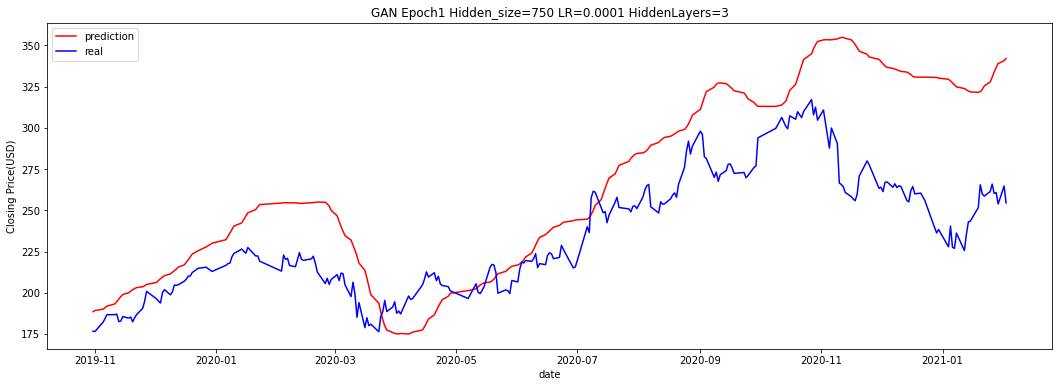

-----------------GAN: 50 epoch, Hidden Size: 750, Learning Rate: 0.0001, Hidden Layers: 3-----------------
epoch: 0, avg_d_loss = 0.17443906565884976, avg_g_loss = 0.09387387386293013, avg_dev_loss = 0.0058420803468716915
epoch: 1, avg_d_loss = 0.17450145442222914, avg_g_loss = 0.08949204633444434, avg_dev_loss = 0.005789229540090597
epoch: 2, avg_d_loss = 0.174405788740731, avg_g_loss = 0.08873114718834861, avg_dev_loss = 0.003858648190990147
epoch: 3, avg_d_loss = 0.1743745802322117, avg_g_loss = 0.08916256606050015, avg_dev_loss = 0.0036256478058294653
epoch: 4, avg_d_loss = 0.17422530300565847, avg_g_loss = 0.08825108646893229, avg_dev_loss = 0.002730613340669712
epoch: 5, avg_d_loss = 0.17427211554180383, avg_g_loss = 0.08808897565979468, avg_dev_loss = 0.002885903476138985
epoch: 6, avg_d_loss = 0.17418414271225344, avg_g_loss = 0.0880392297290275, avg_dev_loss = 0.0025304477633518864
epoch: 7, avg_d_loss = 0.1742016169205969, avg_g_loss = 0.08787937241362075, avg_dev_loss = 0.00

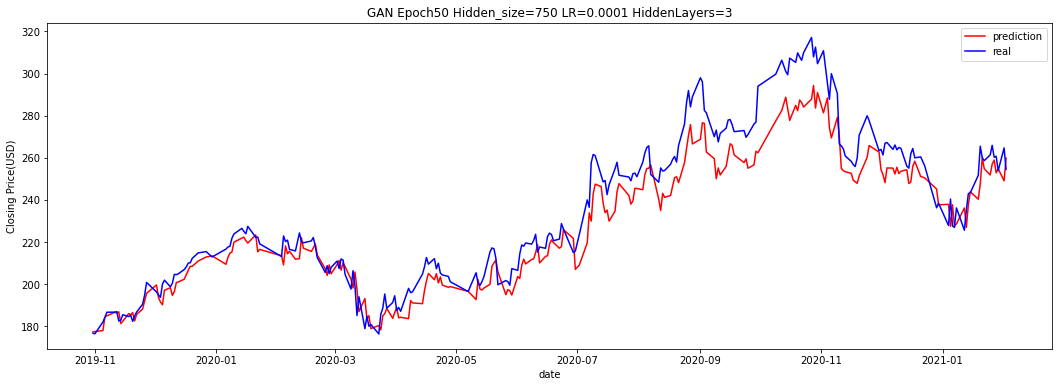

-----------------GAN: 100 epoch, Hidden Size: 750, Learning Rate: 0.0001, Hidden Layers: 3-----------------
epoch: 0, avg_d_loss = 0.1740877397160113, avg_g_loss = 0.09527703390677468, avg_dev_loss = 0.02839853232124459
epoch: 1, avg_d_loss = 0.17417318119900005, avg_g_loss = 0.09207924282596139, avg_dev_loss = 0.009278783171009202
epoch: 2, avg_d_loss = 0.17447001278324878, avg_g_loss = 0.0894722386306985, avg_dev_loss = 0.006453758636808214
epoch: 3, avg_d_loss = 0.17429076597868867, avg_g_loss = 0.08891759051720603, avg_dev_loss = 0.003975114795758244
epoch: 4, avg_d_loss = 0.17427387029045888, avg_g_loss = 0.08849633805198814, avg_dev_loss = 0.004645978670723085
epoch: 5, avg_d_loss = 0.1742575505538283, avg_g_loss = 0.08857078689737163, avg_dev_loss = 0.0031469606302196988
epoch: 6, avg_d_loss = 0.1742752971757954, avg_g_loss = 0.0883657500922151, avg_dev_loss = 0.0026307935284684367
epoch: 7, avg_d_loss = 0.17419655332093908, avg_g_loss = 0.08815982178590144, avg_dev_loss = 0.002

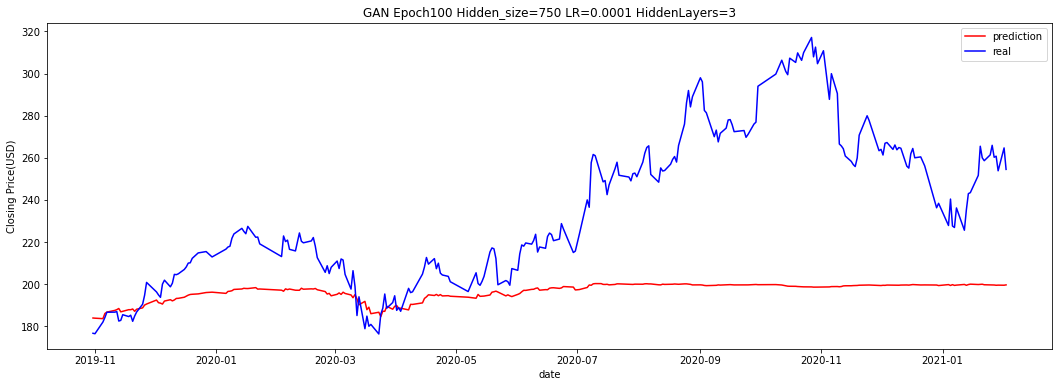

In [105]:
GAN(1e-4,750,3)

-----------------GAN: 1 epoch, Hidden Size: 1000, Learning Rate: 0.0001, Hidden Layers: 1-----------------
epoch: 0, avg_d_loss = 0.17465906662934935, avg_g_loss = 0.0916485692007309, avg_dev_loss = 0.0028224141680469076
avg_test_loss = 0.005429647453693729
RMSE = 14.647358414542415 ; MAE = 11.26413007107765; R2 = 0.8298480976082923


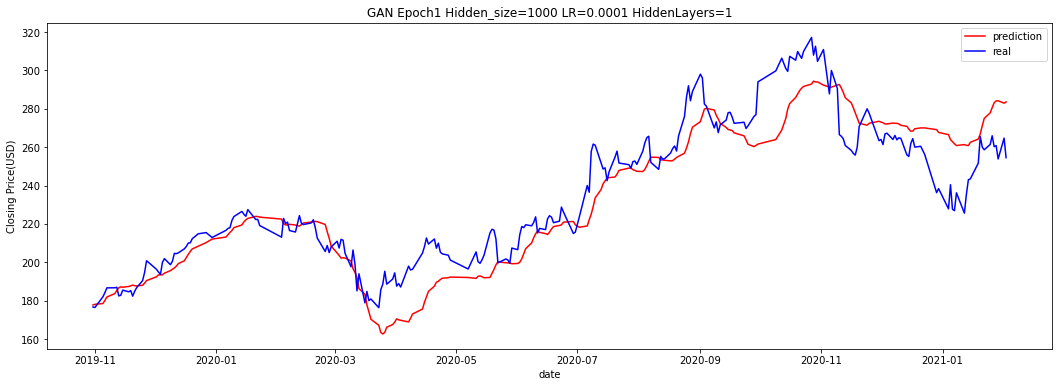

-----------------GAN: 50 epoch, Hidden Size: 1000, Learning Rate: 0.0001, Hidden Layers: 1-----------------
epoch: 0, avg_d_loss = 0.17473905213432167, avg_g_loss = 0.09185329423355663, avg_dev_loss = 0.004389562874239208
epoch: 1, avg_d_loss = 0.17446560566567348, avg_g_loss = 0.08923800567257087, avg_dev_loss = 0.0026978182716174723
epoch: 2, avg_d_loss = 0.1744057428096486, avg_g_loss = 0.0885665910023398, avg_dev_loss = 0.0023950246577027177
epoch: 3, avg_d_loss = 0.17419582310738219, avg_g_loss = 0.0883288057131459, avg_dev_loss = 0.002931996549660262
epoch: 4, avg_d_loss = 0.1742358872494619, avg_g_loss = 0.0881444702281396, avg_dev_loss = 0.00206580379899917
epoch: 5, avg_d_loss = 0.1742224518034999, avg_g_loss = 0.08788158178933825, avg_dev_loss = 0.0029429837693053054
epoch: 6, avg_d_loss = 0.1741439025513875, avg_g_loss = 0.08795329433581373, avg_dev_loss = 0.002299664258786934
epoch: 7, avg_d_loss = 0.17413920368078545, avg_g_loss = 0.08788543206808383, avg_dev_loss = 0.0026

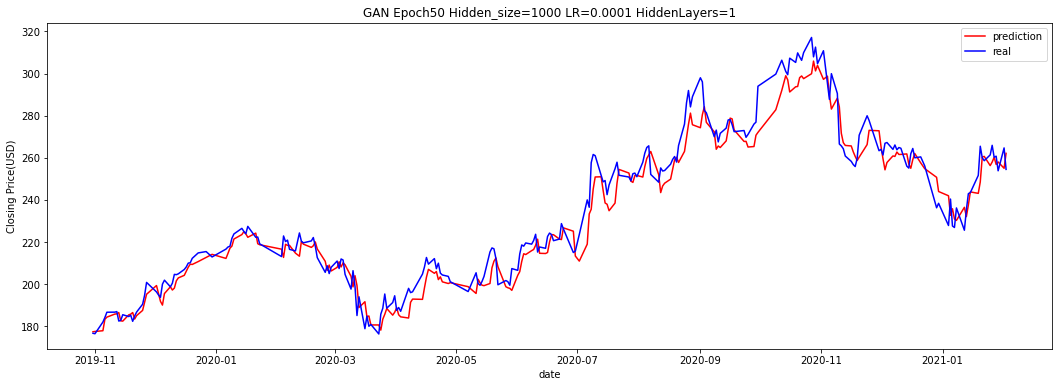

-----------------GAN: 100 epoch, Hidden Size: 1000, Learning Rate: 0.0001, Hidden Layers: 1-----------------
epoch: 0, avg_d_loss = 0.17458660264130024, avg_g_loss = 0.09142133582227584, avg_dev_loss = 0.003102306262395228
epoch: 1, avg_d_loss = 0.17450072541738493, avg_g_loss = 0.08862373017539543, avg_dev_loss = 0.0033352867675371495
epoch: 2, avg_d_loss = 0.1743598106696125, avg_g_loss = 0.08852570977047822, avg_dev_loss = 0.0031014046571553886
epoch: 3, avg_d_loss = 0.17425481795660291, avg_g_loss = 0.08799551482134144, avg_dev_loss = 0.002403545643100267
epoch: 4, avg_d_loss = 0.17423136167804248, avg_g_loss = 0.08795049004681664, avg_dev_loss = 0.0020289144606219726
epoch: 5, avg_d_loss = 0.17423102112324065, avg_g_loss = 0.08791218307081737, avg_dev_loss = 0.0024528965254813546
epoch: 6, avg_d_loss = 0.17417906188843973, avg_g_loss = 0.08779909016968179, avg_dev_loss = 0.0018286903675631425
epoch: 7, avg_d_loss = 0.1741480608252367, avg_g_loss = 0.08767037934072419, avg_dev_loss

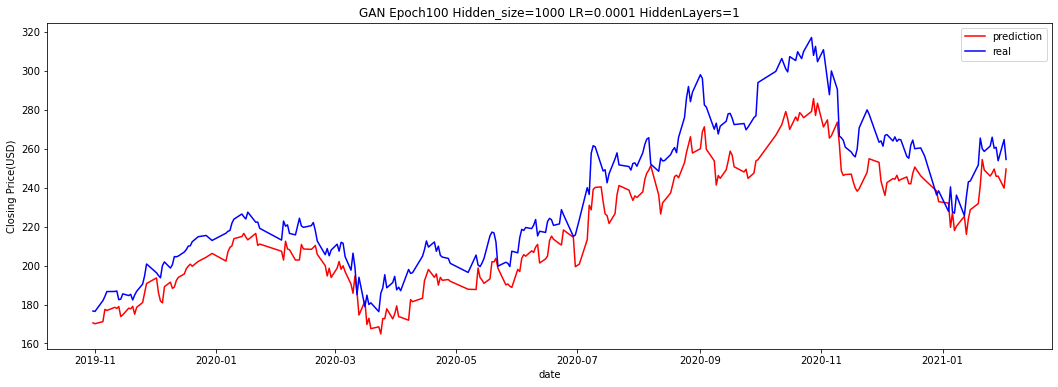

In [106]:
GAN(1e-4,1000,1)

-----------------GAN: 1 epoch, Hidden Size: 1000, Learning Rate: 0.0001, Hidden Layers: 2-----------------
epoch: 0, avg_d_loss = 0.17469212084215405, avg_g_loss = 0.09298106835368922, avg_dev_loss = 0.003016435445601496
avg_test_loss = 0.006109782889711134
RMSE = 16.095550653324306 ; MAE = 12.675111893311765; R2 = 0.7945387764650309


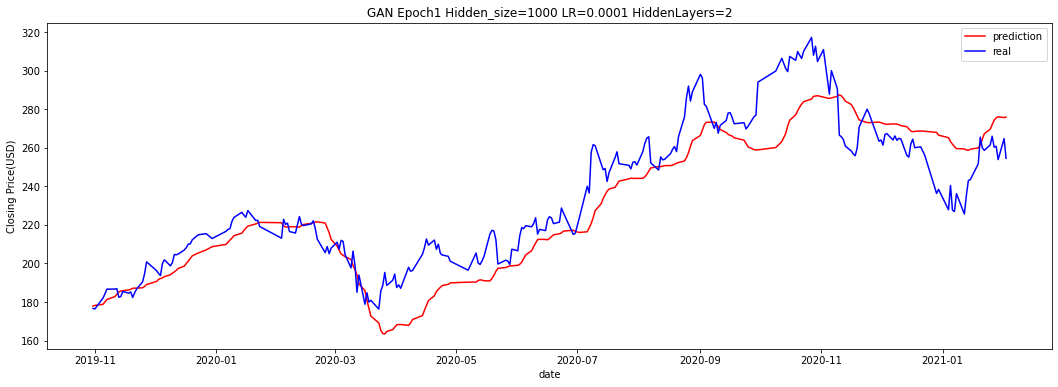

-----------------GAN: 50 epoch, Hidden Size: 1000, Learning Rate: 0.0001, Hidden Layers: 2-----------------
epoch: 0, avg_d_loss = 0.17455955482405552, avg_g_loss = 0.09303384384728203, avg_dev_loss = 0.0062676990978391455
epoch: 1, avg_d_loss = 0.17444962527513203, avg_g_loss = 0.0898046263119416, avg_dev_loss = 0.00609213973576125
epoch: 2, avg_d_loss = 0.17428930676028756, avg_g_loss = 0.08897602195522178, avg_dev_loss = 0.003120098376342099
epoch: 3, avg_d_loss = 0.1742413160314427, avg_g_loss = 0.08835791665187202, avg_dev_loss = 0.002329137098369943
epoch: 4, avg_d_loss = 0.17426503807570695, avg_g_loss = 0.08816476005716167, avg_dev_loss = 0.0026094470130626694
epoch: 5, avg_d_loss = 0.17419304850739067, avg_g_loss = 0.08812894635327416, avg_dev_loss = 0.00329217263727587
epoch: 6, avg_d_loss = 0.1741519714640725, avg_g_loss = 0.08799070709105226, avg_dev_loss = 0.0053814402834544165
epoch: 7, avg_d_loss = 0.17414407585057015, avg_g_loss = 0.08791727008928364, avg_dev_loss = 0.0

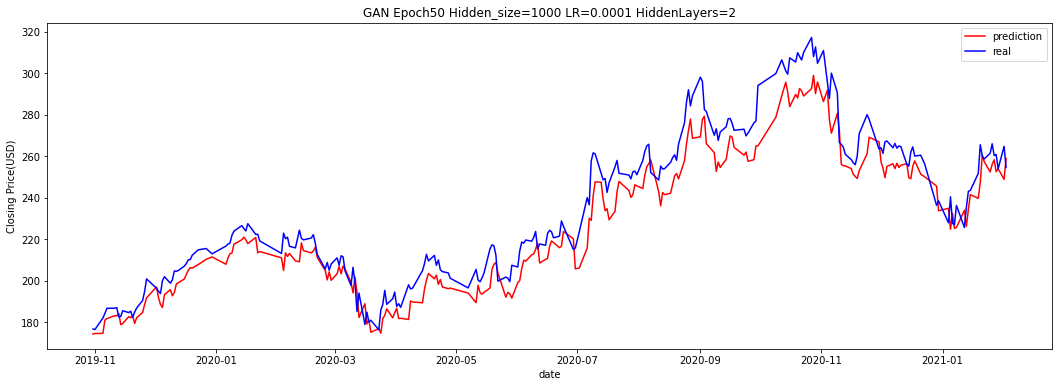

-----------------GAN: 100 epoch, Hidden Size: 1000, Learning Rate: 0.0001, Hidden Layers: 2-----------------
epoch: 0, avg_d_loss = 0.17463541333061963, avg_g_loss = 0.09256574114919162, avg_dev_loss = 0.0058654132281419444
epoch: 1, avg_d_loss = 0.17462594865695, avg_g_loss = 0.08964637348709299, avg_dev_loss = 0.004040622849994739
epoch: 2, avg_d_loss = 0.1744200072814303, avg_g_loss = 0.08926916107327615, avg_dev_loss = 0.002692326060549388
epoch: 3, avg_d_loss = 0.17432200334522358, avg_g_loss = 0.08848282048910742, avg_dev_loss = 0.0024099206771460778
epoch: 4, avg_d_loss = 0.17425593918871668, avg_g_loss = 0.08808629345077978, avg_dev_loss = 0.0023021597783488465
epoch: 5, avg_d_loss = 0.17419382994014804, avg_g_loss = 0.08809018595892516, avg_dev_loss = 0.005335447870676508
epoch: 6, avg_d_loss = 0.1741936850457137, avg_g_loss = 0.08784344720598712, avg_dev_loss = 0.0023156941085770554
epoch: 7, avg_d_loss = 0.1741521716571126, avg_g_loss = 0.08786779279491294, avg_dev_loss = 0.

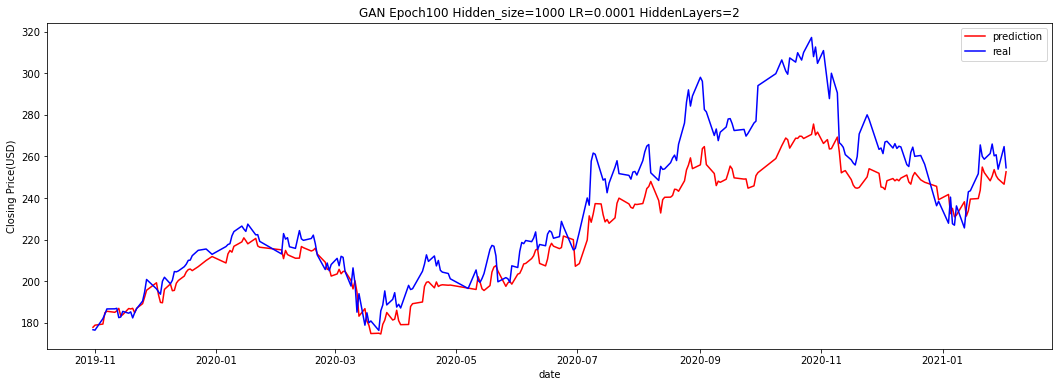

In [107]:
GAN(1e-4,1000,2)

-----------------GAN: 1 epoch, Hidden Size: 1000, Learning Rate: 0.0001, Hidden Layers: 3-----------------
epoch: 0, avg_d_loss = 0.17447959394660437, avg_g_loss = 0.09328727093637368, avg_dev_loss = 0.013423330656929161
avg_test_loss = 0.031161852858283302
RMSE = 67.37187784162722 ; MAE = 64.64713742773066; R2 = -2.599776162526263


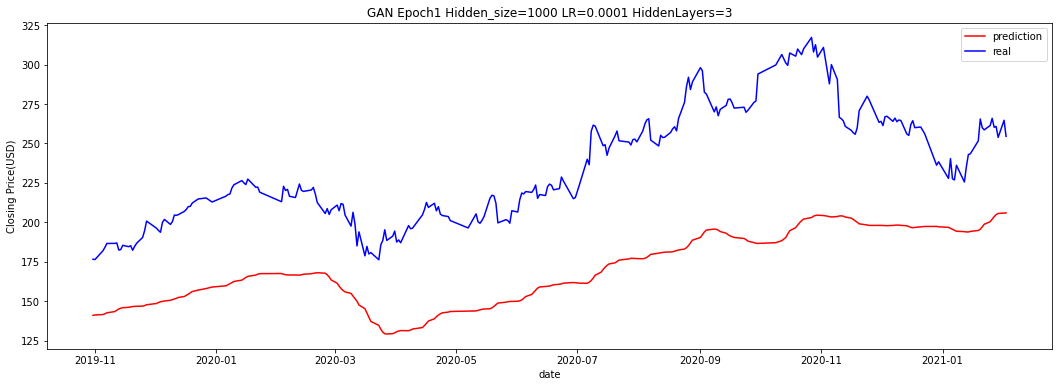

-----------------GAN: 50 epoch, Hidden Size: 1000, Learning Rate: 0.0001, Hidden Layers: 3-----------------
epoch: 0, avg_d_loss = 0.17463979325215928, avg_g_loss = 0.09441501952245057, avg_dev_loss = 0.0037026690892846864
epoch: 1, avg_d_loss = 0.174394885245687, avg_g_loss = 0.09160354457729518, avg_dev_loss = 0.004618666074575127
epoch: 2, avg_d_loss = 0.17438052014857341, avg_g_loss = 0.08987700289495393, avg_dev_loss = 0.003481741824644147
epoch: 3, avg_d_loss = 0.17423054307736976, avg_g_loss = 0.0891064344250204, avg_dev_loss = 0.004931767545498822
epoch: 4, avg_d_loss = 0.1742362568133684, avg_g_loss = 0.08868645073040961, avg_dev_loss = 0.004459043065291394
epoch: 5, avg_d_loss = 0.17426789109093457, avg_g_loss = 0.08915494807319496, avg_dev_loss = 0.0031565334860362932
epoch: 6, avg_d_loss = 0.17412988480808467, avg_g_loss = 0.08839577829278769, avg_dev_loss = 0.0031128056248217934
epoch: 7, avg_d_loss = 0.17419392845023268, avg_g_loss = 0.08826691101108063, avg_dev_loss = 0.

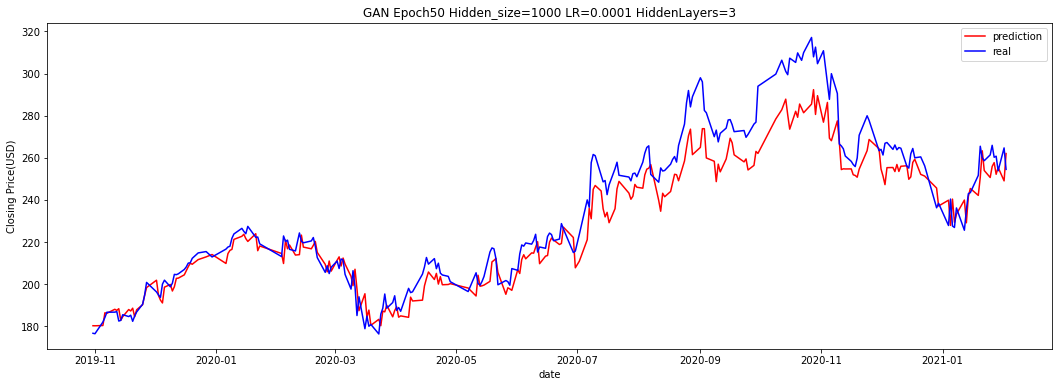

-----------------GAN: 100 epoch, Hidden Size: 1000, Learning Rate: 0.0001, Hidden Layers: 3-----------------
epoch: 0, avg_d_loss = 0.17468625677251393, avg_g_loss = 0.09177177864940145, avg_dev_loss = 0.006125549314819814
epoch: 1, avg_d_loss = 0.174410101427627, avg_g_loss = 0.08909479414404421, avg_dev_loss = 0.0030037249321606674
epoch: 2, avg_d_loss = 0.17433357420076437, avg_g_loss = 0.0886567049153404, avg_dev_loss = 0.00510519995095612
epoch: 3, avg_d_loss = 0.17426295652135695, avg_g_loss = 0.08869456557417701, avg_dev_loss = 0.005604909031790019
epoch: 4, avg_d_loss = 0.17416474513983393, avg_g_loss = 0.08820344286726454, avg_dev_loss = 0.0030483979406012328
epoch: 5, avg_d_loss = 0.17419283713375813, avg_g_loss = 0.08815239794807289, avg_dev_loss = 0.004688910920413728
epoch: 6, avg_d_loss = 0.17422750210731805, avg_g_loss = 0.08796496800747812, avg_dev_loss = 0.0022820776236374568
epoch: 7, avg_d_loss = 0.17413952655816411, avg_g_loss = 0.08780022182694255, avg_dev_loss = 0

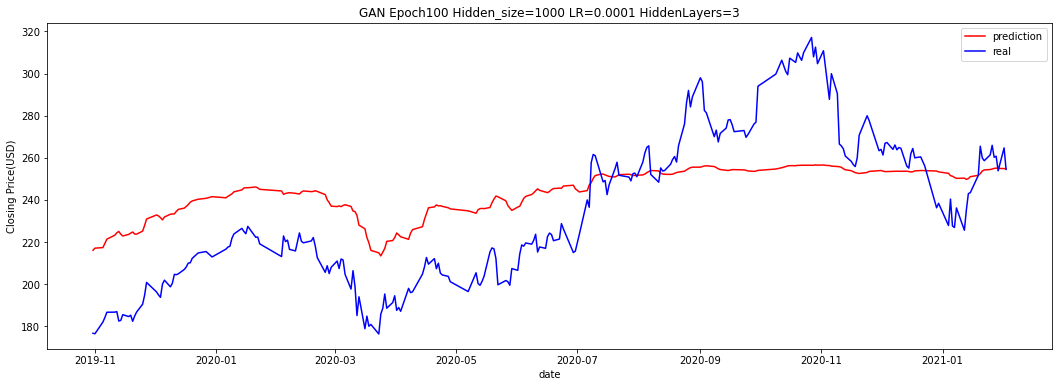

In [108]:
GAN(1e-4,1000,3)

## LFGAN

In [29]:
few_fea_df = gan_df[['Open','High','Low','Close','Volume']]

In [30]:
X = []
Y = [] 
real = []
for i in range(gan_df.shape[0] - sequence):
    X.append(np.array(few_fea_df.iloc[i:(i + sequence), ].values, dtype=np.float32))
    Y.append(np.array(few_fea_df.iloc[(i + sequence), ], dtype=np.float32))
total_len = len(Y)

In [31]:
trainx, trainy = X[:int(0.6 * total_len)], Y[:int(0.6 * total_len)]
devx, devy = X[int(0.6 * total_len):int(0.8 * total_len)], Y[int(0.6 * total_len):int(0.8 * total_len)]
testx, testy = X[int(0.8 * total_len):], Y[int(0.8 * total_len):]
few_train_loader = DataLoader(dataset=Mydataset(trainx, trainy, transform=transforms.ToTensor()), batch_size=batchSize,
                          shuffle=True)
few_dev_loader = DataLoader(dataset=Mydataset(devx, devy), batch_size=batchSize, shuffle=True)
few_test_loader = DataLoader(dataset=Mydataset(testx, testy), batch_size=batchSize, shuffle=False)

In [32]:
epoch = [0,49,99]
def LFGAN(lr, hs,layers, epoch=epoch):
    for e in range (0,len(epoch)):
        generator = lstm(hidden_size=hs,num_layers =layers, input_size=5).cuda()
        gen_optimizer = optim.Adam(generator.parameters(), lr=lr) 
        discriminator = MobileNetV2().cuda()
        criterion = nn.BCELoss().cuda()
        sub_criterion = nn.L1Loss().cuda()
        dis_optimizer = optim.Adam(discriminator.parameters(), lr=lr)
        print("-----------------LFGAN: {} epoch, Hidden Size: {}, Learning Rate: {}, Hidden Layers: {}-----------------".format(epoch[e]+1, hs, lr, layers))
        train(epoch[e]+1,generator, gen_optimizer, discriminator, criterion, sub_criterion,dis_optimizer,train_loader=few_train_loader,dev_loader=few_dev_loader)
        
        torch.save(generator, 'model/lfg_generator_epoch{}_hidden_size={}_lr={}_hl={}.pkl'.format(epoch[e]+1,hs,lr,layers))
        torch.save(discriminator, 'model/lfg_discriminator_epoch{}_hidden_size={}_lr={}_hl={}.pkl'.format(epoch[e]+1,hs,lr,layers))
        generator = torch.load('model/lfg_generator_epoch{}_hidden_size={}_lr={}_hl={}.pkl'.format(epoch[e]+1,hs,lr,layers))
        discriminator = torch.load('model/lfg_discriminator_epoch{}_hidden_size={}_lr={}_hl={}.pkl'.format(epoch[e]+1,hs,lr,layers))
        
        plt.figure(figsize=(18, 6))
        all_fake = []
        all_real = []
        total_test_loss = 0
        for idx, (data, label) in enumerate(few_test_loader):
            with torch.no_grad():
                data = data.cuda()
                data = data.unsqueeze(1)
                label = label.cuda() 
                data3 = data.squeeze(1).cuda()
                fake_gen_3 = generator(Variable(data3).cuda())
                fake_close = fake_gen_3.squeeze()
                real_close = label[:,3]
                all_fake += fake_close.tolist()
                all_real += real_close.tolist()
                test_loss = sub_criterion(fake_close, real_close)
                total_test_loss += test_loss.item()
        print("avg_test_loss = {}".format(total_test_loss/len(testx)))
        all_fake = [close*(close_max-close_min) + close_min for close in all_fake]
        all_real = [close*(close_max-close_min) + close_min for close in all_real]

        rmse = np.sqrt(mean_squared_error(all_real, all_fake))
        mae = mean_absolute_error(all_real,all_fake)
        r2 = r2_score(all_real,all_fake)
        print("RMSE = {} ; MAE = {}; R2 = {}".format(rmse, mae,r2))
        
        plt.plot(date[int(0.8 * total_len):], all_fake, 'r', label="prediction")
        plt.plot(date[int(0.8 * total_len):], all_real, 'b', label="real")

        plt.legend(loc='best')
        plt.title("LFGAN Epoch{} Hidden_size={} LR={} HiddenLayers={}".format(epoch[e]+1,hs,lr,layers))
        plt.savefig('image/lfgan_epoch{}_hidden_size={}_lr={}_hl={}.png'.format(epoch[e]+1,hs,lr,layers))
        plt.xlabel("date")
        plt.ylabel("Closing Price(USD)")
        plt.show()
        
        

-----------------LFGAN: 1 epoch, Hidden Size: 500, Learning Rate: 0.0001, Hidden Layers: 1-----------------
epoch: 0, avg_d_loss = 0.16645574826553597, avg_g_loss = 0.11814998590749781, avg_dev_loss = 0.04873528793284195
avg_test_loss = 0.07922116271925694
RMSE = 167.68243712203167 ; MAE = 164.34906489582477; R2 = -21.299408667201444


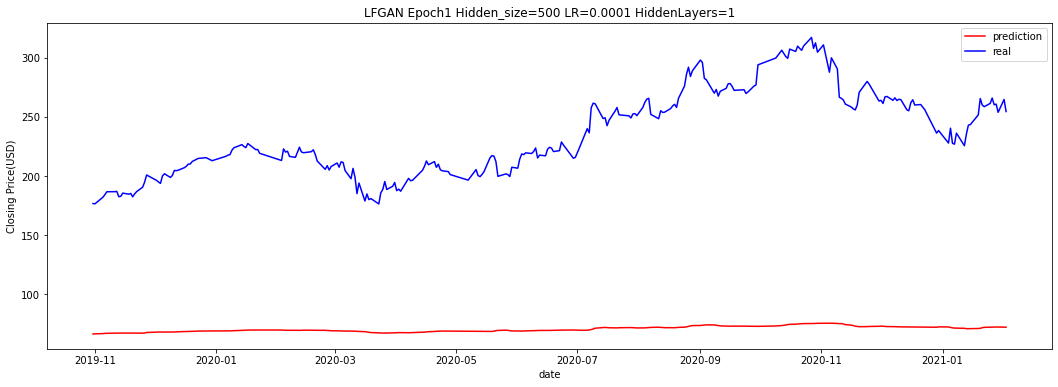

-----------------LFGAN: 50 epoch, Hidden Size: 500, Learning Rate: 0.0001, Hidden Layers: 1-----------------
epoch: 0, avg_d_loss = 0.16919408098373123, avg_g_loss = 0.11459351636006654, avg_dev_loss = 0.009076908060806332
epoch: 1, avg_d_loss = 0.17082900103507387, avg_g_loss = 0.11344888772348034, avg_dev_loss = 0.00903620048224246
epoch: 2, avg_d_loss = 0.1592568384226133, avg_g_loss = 0.13791120936208806, avg_dev_loss = 0.04041782440794738
epoch: 3, avg_d_loss = 0.17492966144257172, avg_g_loss = 0.11137517285739816, avg_dev_loss = 0.004186056993420133
epoch: 4, avg_d_loss = 0.17512505544002518, avg_g_loss = 0.09546103019678094, avg_dev_loss = 0.002797069537945573
epoch: 5, avg_d_loss = 0.17460970612684282, avg_g_loss = 0.09505844735676194, avg_dev_loss = 0.00424334786464053
epoch: 6, avg_d_loss = 0.17460895219229927, avg_g_loss = 0.09331329127228305, avg_dev_loss = 0.0032216300302585267
epoch: 7, avg_d_loss = 0.17438002533181388, avg_g_loss = 0.09226852526985042, avg_dev_loss = 0.0

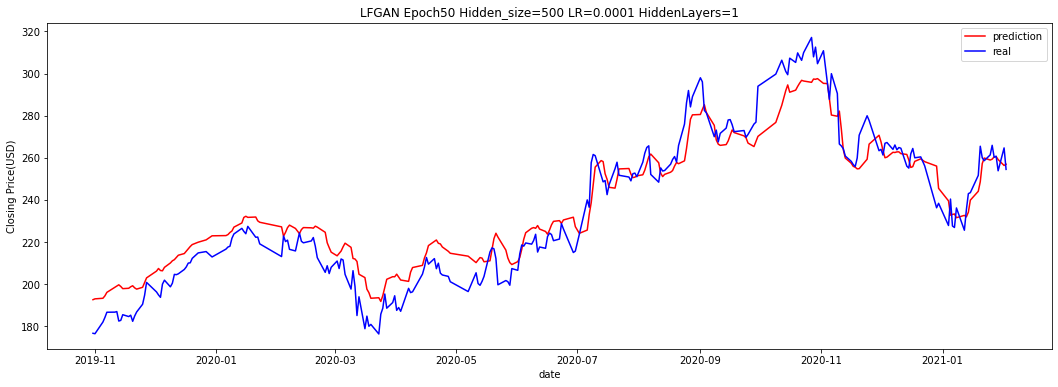

-----------------LFGAN: 100 epoch, Hidden Size: 500, Learning Rate: 0.0001, Hidden Layers: 1-----------------
epoch: 0, avg_d_loss = 0.17212251519975552, avg_g_loss = 0.11127685835757334, avg_dev_loss = 0.02370094046166641
epoch: 1, avg_d_loss = 0.13891943054054173, avg_g_loss = 0.16525214253269674, avg_dev_loss = 0.008424158147872627
epoch: 2, avg_d_loss = 0.16571982169030436, avg_g_loss = 0.15754501753886843, avg_dev_loss = 0.003436560243254832
epoch: 3, avg_d_loss = 0.17634835639078505, avg_g_loss = 0.09937080827804874, avg_dev_loss = 0.0029674270916234405
epoch: 4, avg_d_loss = 0.17458406766860052, avg_g_loss = 0.09662753502225695, avg_dev_loss = 0.0044896758157944045
epoch: 5, avg_d_loss = 0.17483727605623892, avg_g_loss = 0.0959031099904475, avg_dev_loss = 0.0029006036699611424
epoch: 6, avg_d_loss = 0.1736871144617465, avg_g_loss = 0.094164612326483, avg_dev_loss = 0.0029226859797769626
epoch: 7, avg_d_loss = 0.17399760767232028, avg_g_loss = 0.09482310223186576, avg_dev_loss = 

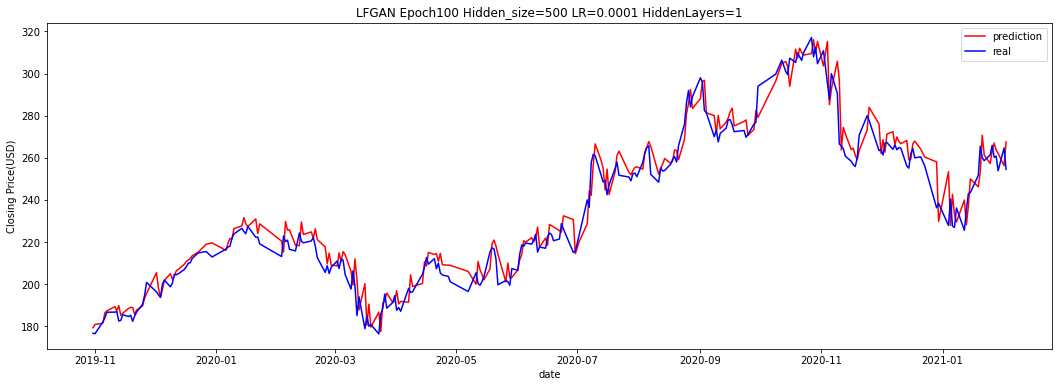

In [113]:
LFGAN(1e-4,500,1)

-----------------LFGAN: 1 epoch, Hidden Size: 500, Learning Rate: 0.0001, Hidden Layers: 2-----------------
epoch: 0, avg_d_loss = 0.16137719109031184, avg_g_loss = 0.12420944697654444, avg_dev_loss = 0.05079642946729189
avg_test_loss = 0.08277238047484195
RMSE = 175.21920909689794 ; MAE = 171.7162796569535; R2 = -23.349027664299843


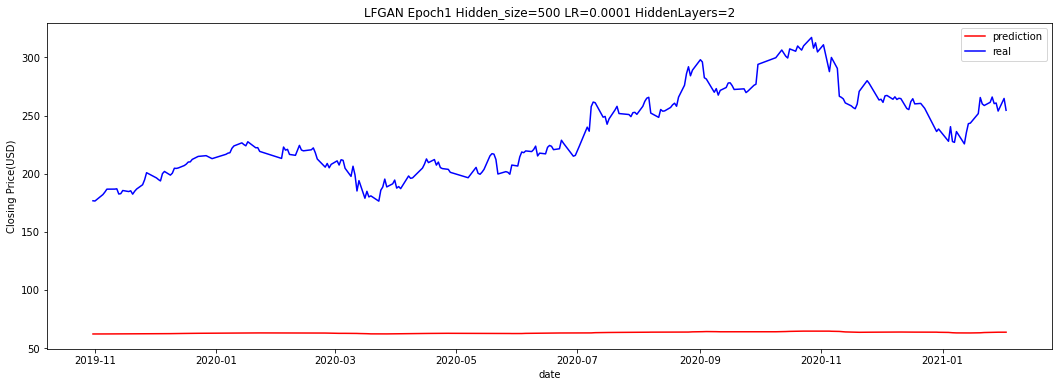

-----------------LFGAN: 50 epoch, Hidden Size: 500, Learning Rate: 0.0001, Hidden Layers: 2-----------------
epoch: 0, avg_d_loss = 0.17326906924012042, avg_g_loss = 0.10899435355787193, avg_dev_loss = 0.02920939963126817
epoch: 1, avg_d_loss = 0.13423159306795726, avg_g_loss = 0.1739281944751135, avg_dev_loss = 0.0042900770421037205
epoch: 2, avg_d_loss = 0.07454683232688934, avg_g_loss = 0.323166068364761, avg_dev_loss = 0.008401568964860285
epoch: 3, avg_d_loss = 0.177382894398595, avg_g_loss = 0.15807760808102228, avg_dev_loss = 0.003590690843166054
epoch: 4, avg_d_loss = 0.17663390902360884, avg_g_loss = 0.09112121340439801, avg_dev_loss = 0.003602410932230859
epoch: 5, avg_d_loss = 0.1749580609027877, avg_g_loss = 0.09099487123682774, avg_dev_loss = 0.002698348927180577
epoch: 6, avg_d_loss = 0.17418937885564845, avg_g_loss = 0.09048731185033143, avg_dev_loss = 0.0026522059800960264
epoch: 7, avg_d_loss = 0.174322560561776, avg_g_loss = 0.09096307884453217, avg_dev_loss = 0.00448

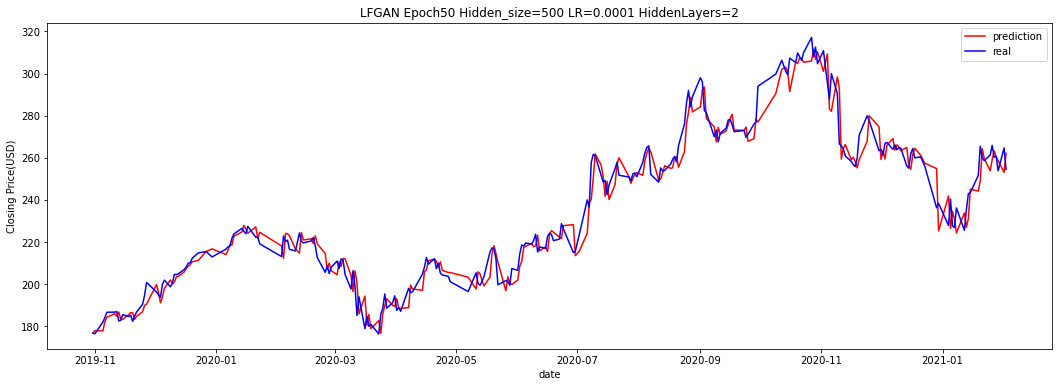

-----------------LFGAN: 100 epoch, Hidden Size: 500, Learning Rate: 0.0001, Hidden Layers: 2-----------------
epoch: 0, avg_d_loss = 0.1690019923622315, avg_g_loss = 0.11539231643024053, avg_dev_loss = 0.05455183869532306
epoch: 1, avg_d_loss = 0.08016994950587003, avg_g_loss = 0.28524096474448085, avg_dev_loss = 0.013501029419128433
epoch: 2, avg_d_loss = 0.1042798300414182, avg_g_loss = 0.28892145214274206, avg_dev_loss = 0.04379199632220395
epoch: 3, avg_d_loss = 0.18654796813528499, avg_g_loss = 0.14540387773166288, avg_dev_loss = 0.00281365650631629
epoch: 4, avg_d_loss = 0.17586206453079203, avg_g_loss = 0.09247843605786071, avg_dev_loss = 0.0030350020799800015
epoch: 5, avg_d_loss = 0.17470192894131814, avg_g_loss = 0.0925166551000114, avg_dev_loss = 0.0027356539842293744
epoch: 6, avg_d_loss = 0.17473264021565252, avg_g_loss = 0.09233884847662747, avg_dev_loss = 0.002838089835507788
epoch: 7, avg_d_loss = 0.17425860243605118, avg_g_loss = 0.09218122403129123, avg_dev_loss = 0.0

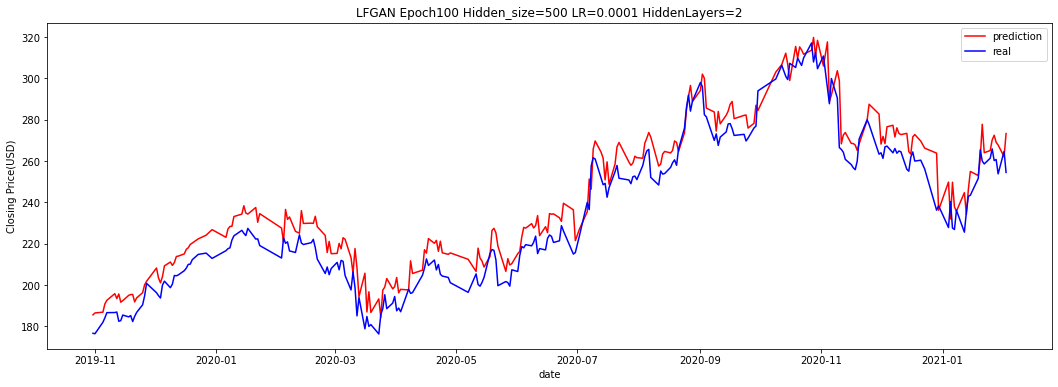

In [35]:
LFGAN(1e-4,500,2)

-----------------LFGAN: 1 epoch, Hidden Size: 500, Learning Rate: 0.0001, Hidden Layers: 3-----------------
epoch: 0, avg_d_loss = 0.17225927711288588, avg_g_loss = 0.10913469122087699, avg_dev_loss = 0.0224860673734897
avg_test_loss = 0.0554852146429546
RMSE = 120.5701715183865 ; MAE = 115.10741338095336; R2 = -10.529167509505392


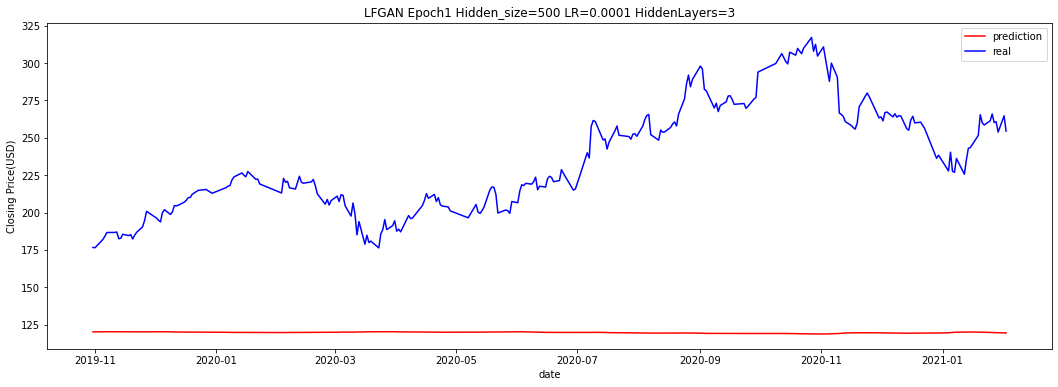

-----------------LFGAN: 50 epoch, Hidden Size: 500, Learning Rate: 0.0001, Hidden Layers: 3-----------------
epoch: 0, avg_d_loss = 0.16941577158348944, avg_g_loss = 0.11283089875872748, avg_dev_loss = 0.055222533501599676
epoch: 1, avg_d_loss = 0.09873430002173846, avg_g_loss = 0.24548880470720685, avg_dev_loss = 0.07367583350083674
epoch: 2, avg_d_loss = 0.12119076849540981, avg_g_loss = 0.24438971711655533, avg_dev_loss = 0.007222664177757705
epoch: 3, avg_d_loss = 0.1907901715567508, avg_g_loss = 0.12210508523785116, avg_dev_loss = 0.003414301789532143
epoch: 4, avg_d_loss = 0.17484217466661384, avg_g_loss = 0.09200396419931274, avg_dev_loss = 0.0037405836491530386
epoch: 5, avg_d_loss = 0.1743616988299313, avg_g_loss = 0.09062992370627225, avg_dev_loss = 0.00427931651274741
epoch: 6, avg_d_loss = 0.174599675926721, avg_g_loss = 0.09129735544153945, avg_dev_loss = 0.004717001741036716
epoch: 7, avg_d_loss = 0.17405734300915582, avg_g_loss = 0.09034805794934658, avg_dev_loss = 0.003

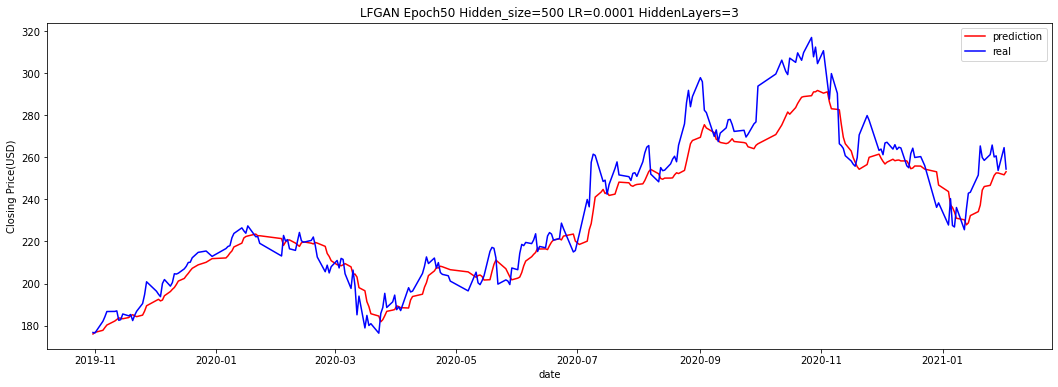

-----------------LFGAN: 100 epoch, Hidden Size: 500, Learning Rate: 0.0001, Hidden Layers: 3-----------------
epoch: 0, avg_d_loss = 0.16392870003732893, avg_g_loss = 0.12089338441614264, avg_dev_loss = 0.06067241088065811
epoch: 1, avg_d_loss = 0.14220855633417764, avg_g_loss = 0.1936938117514394, avg_dev_loss = 0.014296030958569095
epoch: 2, avg_d_loss = 0.15582133578408053, avg_g_loss = 0.15521039769374523, avg_dev_loss = 0.019859355495456508
epoch: 3, avg_d_loss = 0.16883269764473532, avg_g_loss = 0.129885020138193, avg_dev_loss = 0.007283039121913366
epoch: 4, avg_d_loss = 0.1743330784774703, avg_g_loss = 0.09702609367999136, avg_dev_loss = 0.0032447115465035455
epoch: 5, avg_d_loss = 0.17421569887676167, avg_g_loss = 0.09615093205213848, avg_dev_loss = 0.0031532504146090023
epoch: 6, avg_d_loss = 0.17444626580928518, avg_g_loss = 0.09393772547084871, avg_dev_loss = 0.003940765777808179
epoch: 7, avg_d_loss = 0.1739565316866257, avg_g_loss = 0.0930980590510882, avg_dev_loss = 0.00

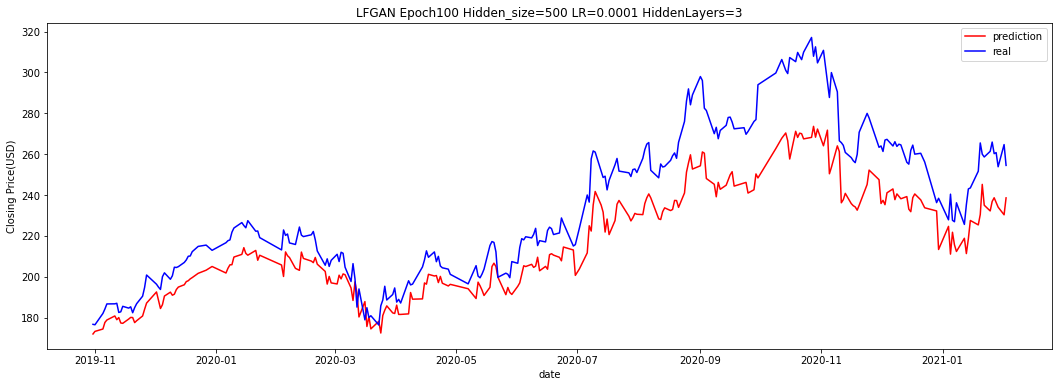

In [36]:
LFGAN(1e-4,500,3)

-----------------LFGAN: 1 epoch, Hidden Size: 500, Learning Rate: 0.001, Hidden Layers: 1-----------------
epoch: 0, avg_d_loss = 0.17625474552086853, avg_g_loss = 0.10979282939086546, avg_dev_loss = 0.004035851815467552
avg_test_loss = 0.011104396403287396
RMSE = 26.093847758741845 ; MAE = 23.036737872262677; R2 = 0.4599991540538906


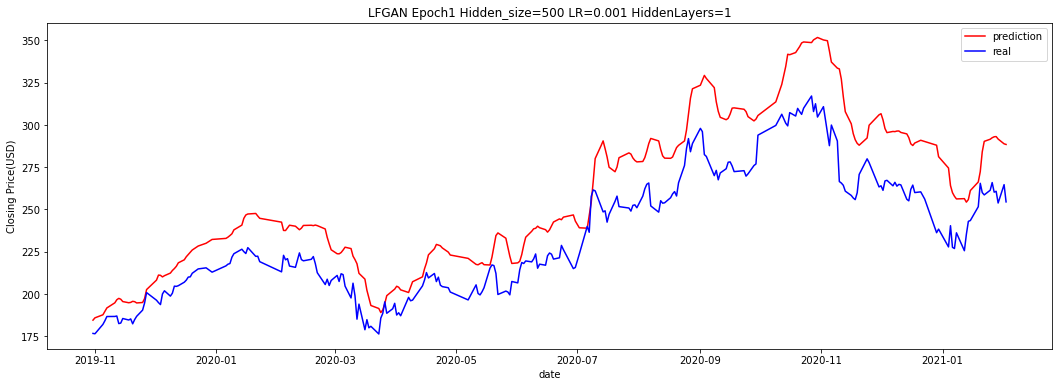

-----------------LFGAN: 50 epoch, Hidden Size: 500, Learning Rate: 0.001, Hidden Layers: 1-----------------
epoch: 0, avg_d_loss = 0.08464991705520468, avg_g_loss = 0.48334947331361144, avg_dev_loss = 0.0035805357938823593
epoch: 1, avg_d_loss = 0.18280392601916093, avg_g_loss = 0.14054308601753038, avg_dev_loss = 0.0028154010965910246
epoch: 2, avg_d_loss = 0.16604927769556396, avg_g_loss = 0.1428023623668498, avg_dev_loss = 0.005892241324082074
epoch: 3, avg_d_loss = 0.17531001235444585, avg_g_loss = 0.08941171071828545, avg_dev_loss = 0.0029208510264244368
epoch: 4, avg_d_loss = 0.1744047846026596, avg_g_loss = 0.08720350152186114, avg_dev_loss = 0.001980307129541051
epoch: 5, avg_d_loss = 0.1741834218662199, avg_g_loss = 0.08726529151918921, avg_dev_loss = 0.0018738118343820138
epoch: 6, avg_d_loss = 0.1739919617753216, avg_g_loss = 0.08794011022654777, avg_dev_loss = 0.0020748666158307187
epoch: 7, avg_d_loss = 0.17336980743553249, avg_g_loss = 0.08920697975521305, avg_dev_loss = 

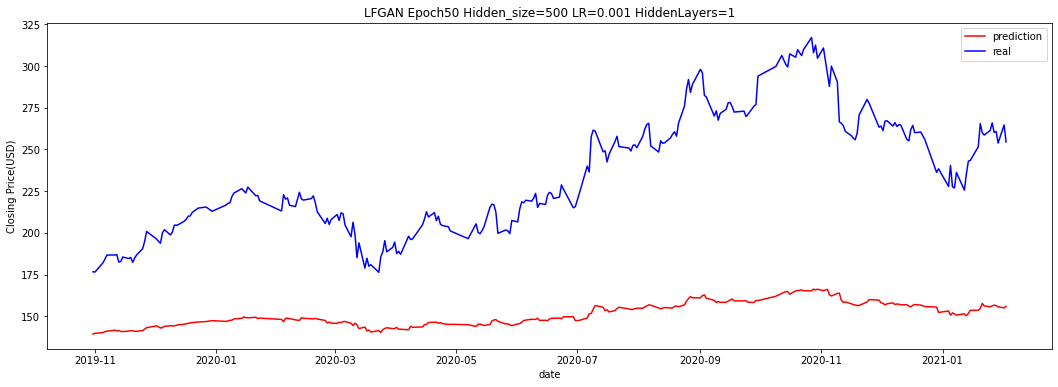

-----------------LFGAN: 100 epoch, Hidden Size: 500, Learning Rate: 0.001, Hidden Layers: 1-----------------
epoch: 0, avg_d_loss = 0.17155894965726612, avg_g_loss = 0.14294384399143312, avg_dev_loss = 0.0038599370706104055
epoch: 1, avg_d_loss = 0.17185243295626043, avg_g_loss = 0.09758636200533771, avg_dev_loss = 0.002951117501569338
epoch: 2, avg_d_loss = 0.17536078297140026, avg_g_loss = 0.08930861149148493, avg_dev_loss = 0.002698606984980206
epoch: 3, avg_d_loss = 0.17421688809896452, avg_g_loss = 0.08750199508606557, avg_dev_loss = 0.0019554797021721707
epoch: 4, avg_d_loss = 0.17382483004919325, avg_g_loss = 0.08707009680824135, avg_dev_loss = 0.0020688190532161255
epoch: 5, avg_d_loss = 0.17413994960760737, avg_g_loss = 0.08948231838804083, avg_dev_loss = 0.002040717602059415
epoch: 6, avg_d_loss = 0.174389603926655, avg_g_loss = 0.08904306788861525, avg_dev_loss = 0.0016761274101786286
epoch: 7, avg_d_loss = 0.17443173375873058, avg_g_loss = 0.0876262195512218, avg_dev_loss =

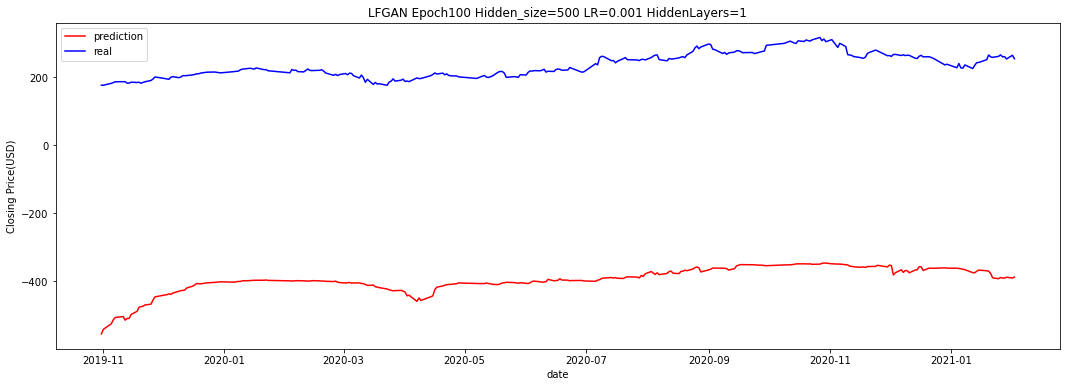

In [37]:
LFGAN(1e-3,500,1)

-----------------LFGAN: 1 epoch, Hidden Size: 250, Learning Rate: 0.0001, Hidden Layers: 1-----------------
epoch: 0, avg_d_loss = 0.1453221367792485, avg_g_loss = 0.14813600338910468, avg_dev_loss = 0.06587407378189464
avg_test_loss = 0.09856339295705159
RMSE = 207.56692517892623 ; MAE = 204.4756853671502; R2 = -33.16917519207897


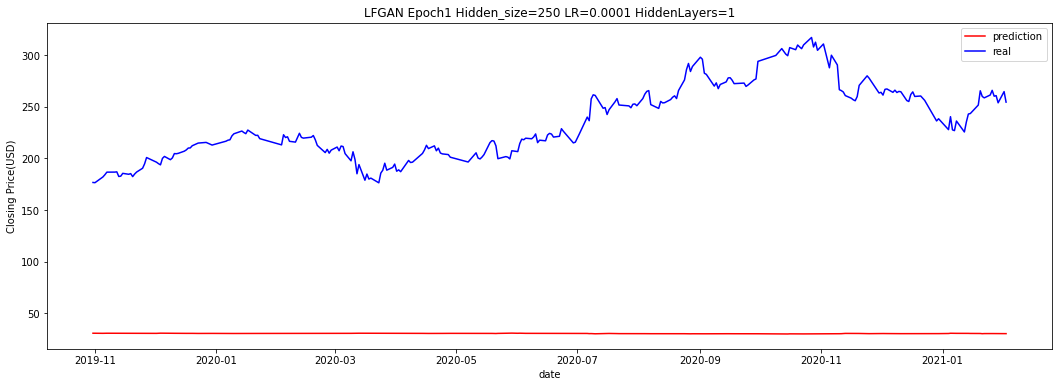

-----------------LFGAN: 50 epoch, Hidden Size: 250, Learning Rate: 0.0001, Hidden Layers: 1-----------------
epoch: 0, avg_d_loss = 0.1731709524403658, avg_g_loss = 0.10837200166910169, avg_dev_loss = 0.04261932468233
epoch: 1, avg_d_loss = 0.16376827130299557, avg_g_loss = 0.13027432103876227, avg_dev_loss = 0.03081770394238229
epoch: 2, avg_d_loss = 0.16416252951205004, avg_g_loss = 0.12319530960271567, avg_dev_loss = 0.010049460349540747
epoch: 3, avg_d_loss = 0.1514051688034725, avg_g_loss = 0.1668158764319426, avg_dev_loss = 0.004952991105077837
epoch: 4, avg_d_loss = 0.18314068746506337, avg_g_loss = 0.10222294205192982, avg_dev_loss = 0.004413975480618133
epoch: 5, avg_d_loss = 0.17558021312732963, avg_g_loss = 0.09265340575700477, avg_dev_loss = 0.003966653216701043
epoch: 6, avg_d_loss = 0.1746310596985811, avg_g_loss = 0.09185160921251517, avg_dev_loss = 0.0032529675830226435
epoch: 7, avg_d_loss = 0.17470334691239853, avg_g_loss = 0.09176644731988169, avg_dev_loss = 0.003567

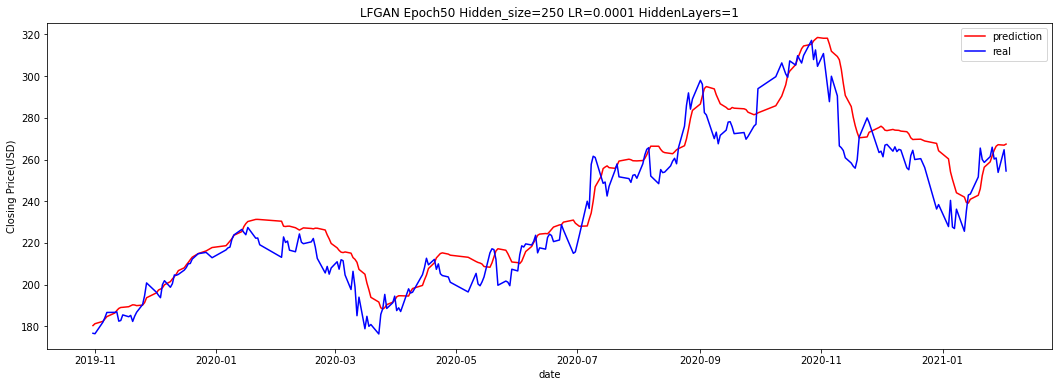

-----------------LFGAN: 100 epoch, Hidden Size: 250, Learning Rate: 0.0001, Hidden Layers: 1-----------------
epoch: 0, avg_d_loss = 0.15954043180770294, avg_g_loss = 0.12676435557910548, avg_dev_loss = 0.04176618776393934
epoch: 1, avg_d_loss = 0.1678336687263276, avg_g_loss = 0.13439080991672472, avg_dev_loss = 0.0037357090501390936
epoch: 2, avg_d_loss = 0.15872297336846702, avg_g_loss = 0.131873258015351, avg_dev_loss = 0.0035189208875590857
epoch: 3, avg_d_loss = 0.17763752523332796, avg_g_loss = 0.10883161595565738, avg_dev_loss = 0.012572237407299956
epoch: 4, avg_d_loss = 0.1746485320938555, avg_g_loss = 0.09773941479708305, avg_dev_loss = 0.0034063740318265707
epoch: 5, avg_d_loss = 0.17490517715386414, avg_g_loss = 0.0954689987107677, avg_dev_loss = 0.0032390307195966236
epoch: 6, avg_d_loss = 0.17365405601844738, avg_g_loss = 0.09548385348761187, avg_dev_loss = 0.003067413663682829
epoch: 7, avg_d_loss = 0.1751121485036891, avg_g_loss = 0.0934396874164296, avg_dev_loss = 0.0

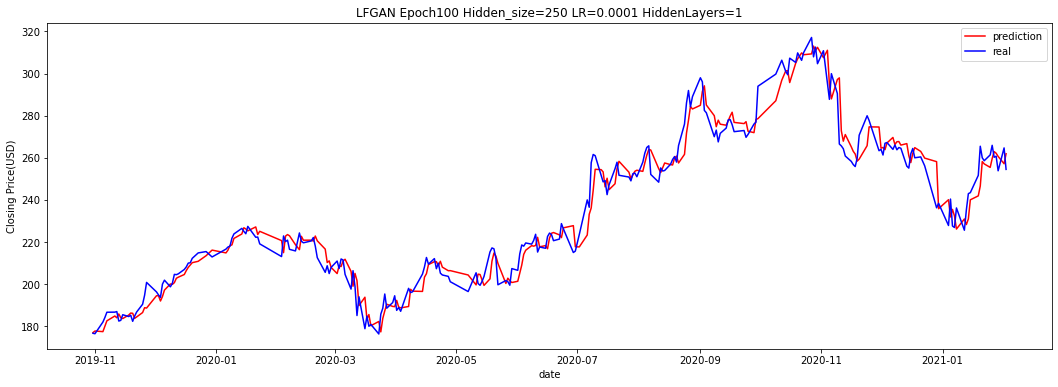

In [38]:
LFGAN(1e-4,250,1)

-----------------LFGAN: 1 epoch, Hidden Size: 750, Learning Rate: 0.0001, Hidden Layers: 1-----------------
epoch: 0, avg_d_loss = 0.1672401302818714, avg_g_loss = 0.11417363185544128, avg_dev_loss = 0.049055646694205104
avg_test_loss = 0.08084366809238087
RMSE = 171.26046717578157 ; MAE = 167.71504925497032; R2 = -22.26121741408879


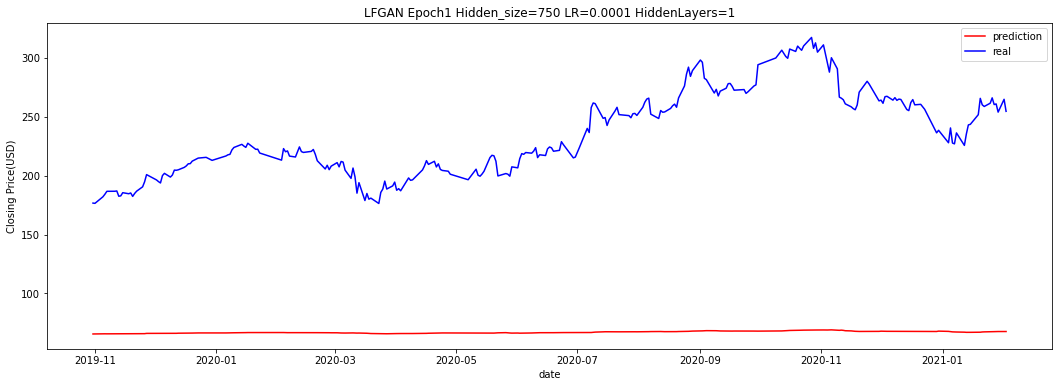

-----------------LFGAN: 50 epoch, Hidden Size: 750, Learning Rate: 0.0001, Hidden Layers: 1-----------------
epoch: 0, avg_d_loss = 0.17267809545736953, avg_g_loss = 0.10903567415679816, avg_dev_loss = 0.03613645744867651
epoch: 1, avg_d_loss = 0.16073140248901793, avg_g_loss = 0.12620037280410265, avg_dev_loss = 0.02353586301830785
epoch: 2, avg_d_loss = 0.16180451809226787, avg_g_loss = 0.13371546541934382, avg_dev_loss = 0.026467780819863874
epoch: 3, avg_d_loss = 0.16793839106541622, avg_g_loss = 0.1289950653778434, avg_dev_loss = 0.012340646817883612
epoch: 4, avg_d_loss = 0.17542000641840946, avg_g_loss = 0.09635887883310838, avg_dev_loss = 0.0027940160499269518
epoch: 5, avg_d_loss = 0.175016839392436, avg_g_loss = 0.09377259469304249, avg_dev_loss = 0.0029411341414252164
epoch: 6, avg_d_loss = 0.1746437622113826, avg_g_loss = 0.09264931683304645, avg_dev_loss = 0.005280564790556186
epoch: 7, avg_d_loss = 0.17481649677411987, avg_g_loss = 0.09196780639002985, avg_dev_loss = 0.00

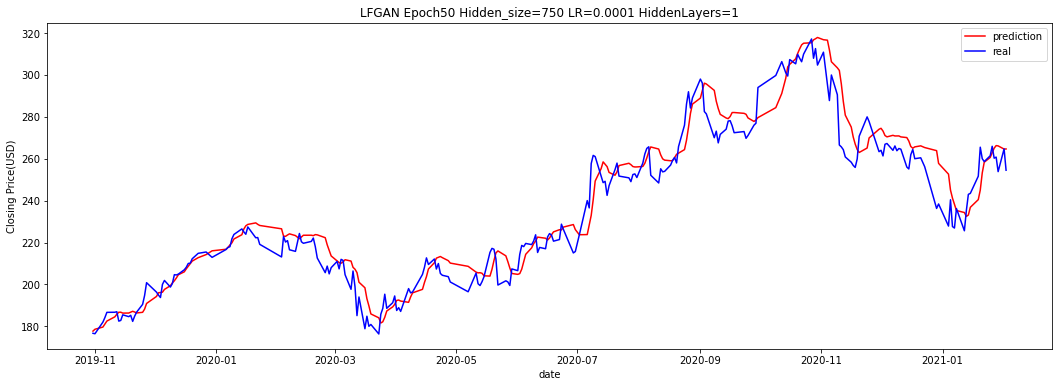

-----------------LFGAN: 100 epoch, Hidden Size: 750, Learning Rate: 0.0001, Hidden Layers: 1-----------------
epoch: 0, avg_d_loss = 0.1629880943225817, avg_g_loss = 0.12340503220926824, avg_dev_loss = 0.05275098146594522
epoch: 1, avg_d_loss = 0.13685251438119111, avg_g_loss = 0.19864954415080815, avg_dev_loss = 0.00401417665296861
epoch: 2, avg_d_loss = 0.14889293334934345, avg_g_loss = 0.18087344519387935, avg_dev_loss = 0.005994864063117894
epoch: 3, avg_d_loss = 0.17806017119319417, avg_g_loss = 0.10272204010961022, avg_dev_loss = 0.004671611585884493
epoch: 4, avg_d_loss = 0.17629283175571187, avg_g_loss = 0.09377349299320854, avg_dev_loss = 0.002865666355371135
epoch: 5, avg_d_loss = 0.17505926112862746, avg_g_loss = 0.09215189318239915, avg_dev_loss = 0.002879734735355178
epoch: 6, avg_d_loss = 0.17494973453429866, avg_g_loss = 0.09225058940880199, avg_dev_loss = 0.0034078051452967606
epoch: 7, avg_d_loss = 0.17378282637650522, avg_g_loss = 0.09201649311075344, avg_dev_loss = 0

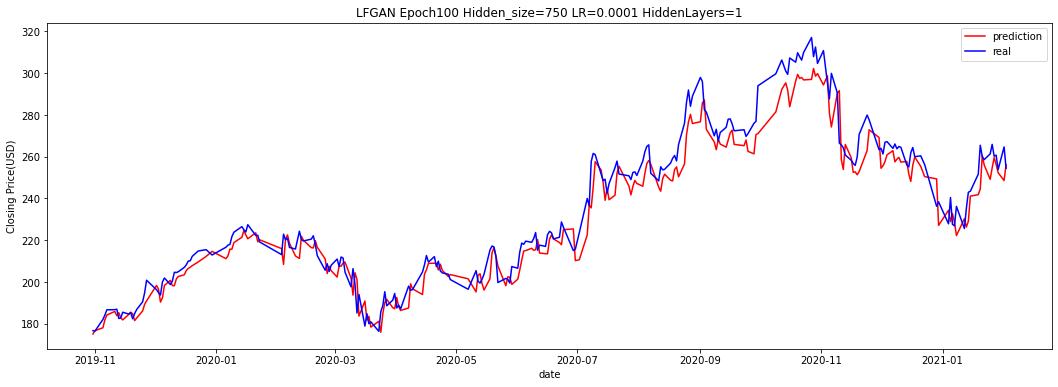

In [39]:
LFGAN(1e-4,750,1)

-----------------LFGAN: 1 epoch, Hidden Size: 750, Learning Rate: 0.0001, Hidden Layers: 2-----------------
epoch: 0, avg_d_loss = 0.16655081518098278, avg_g_loss = 0.12253892565257045, avg_dev_loss = 0.02057544898397569
avg_test_loss = 0.011592888682516235
RMSE = 30.42113810144487 ; MAE = 24.050144532045476; R2 = 0.26604555160583865


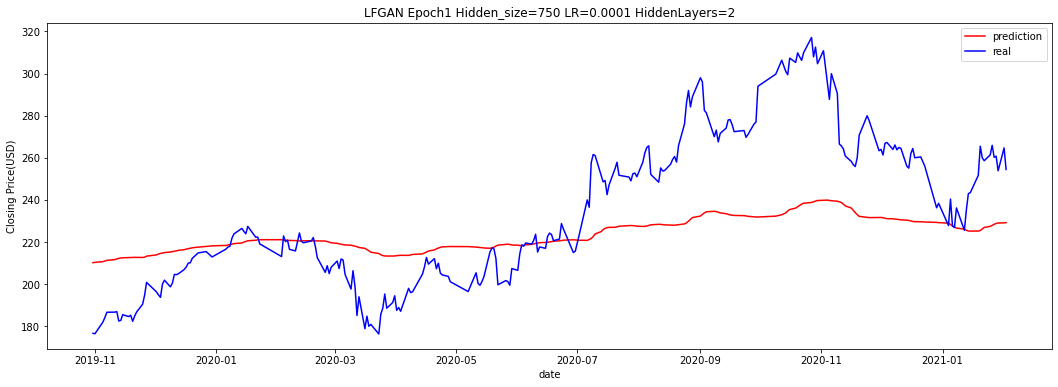

-----------------LFGAN: 50 epoch, Hidden Size: 750, Learning Rate: 0.0001, Hidden Layers: 2-----------------
epoch: 0, avg_d_loss = 0.17229724776457772, avg_g_loss = 0.10976675511615207, avg_dev_loss = 0.03381299315296652
epoch: 1, avg_d_loss = 0.17110113635262608, avg_g_loss = 0.11285588005498637, avg_dev_loss = 0.004274287448749796
epoch: 2, avg_d_loss = 0.16622282147256442, avg_g_loss = 0.12268493187593718, avg_dev_loss = 0.01640044334043568
epoch: 3, avg_d_loss = 0.1758830035140759, avg_g_loss = 0.10211050986337118, avg_dev_loss = 0.005072753663978649
epoch: 4, avg_d_loss = 0.1747259687259321, avg_g_loss = 0.09732603603744991, avg_dev_loss = 0.003345675738138844
epoch: 5, avg_d_loss = 0.1747713790042621, avg_g_loss = 0.09610806709611068, avg_dev_loss = 0.0042106213451791625
epoch: 6, avg_d_loss = 0.17442786391394824, avg_g_loss = 0.0947264030254688, avg_dev_loss = 0.0027324814073203182
epoch: 7, avg_d_loss = 0.17475751990450047, avg_g_loss = 0.09313020144125354, avg_dev_loss = 0.00

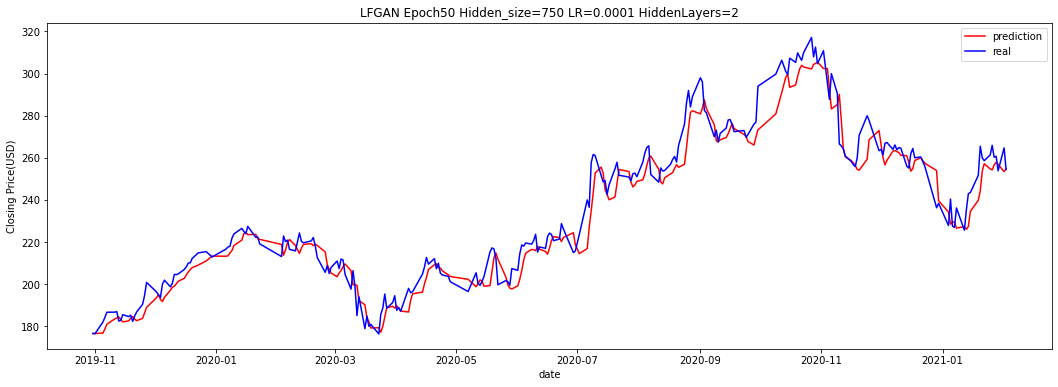

-----------------LFGAN: 100 epoch, Hidden Size: 750, Learning Rate: 0.0001, Hidden Layers: 2-----------------
epoch: 0, avg_d_loss = 0.17177476039857464, avg_g_loss = 0.11194692304681311, avg_dev_loss = 0.02746729343109711
epoch: 1, avg_d_loss = 0.1570530255031223, avg_g_loss = 0.13316137988606636, avg_dev_loss = 0.01086438307007456
epoch: 2, avg_d_loss = 0.16925084311397054, avg_g_loss = 0.132783923992186, avg_dev_loss = 0.01226340373092731
epoch: 3, avg_d_loss = 0.1759644038172578, avg_g_loss = 0.09841223595562393, avg_dev_loss = 0.005531065137667348
epoch: 4, avg_d_loss = 0.17536862932986028, avg_g_loss = 0.09732179398470203, avg_dev_loss = 0.0028422879756290196
epoch: 5, avg_d_loss = 0.17437969172711004, avg_g_loss = 0.09631673676281677, avg_dev_loss = 0.006488902161443188
epoch: 6, avg_d_loss = 0.17450474272511607, avg_g_loss = 0.0946745631510465, avg_dev_loss = 0.002593106990361395
epoch: 7, avg_d_loss = 0.17421903930538357, avg_g_loss = 0.09394054464212086, avg_dev_loss = 0.0026

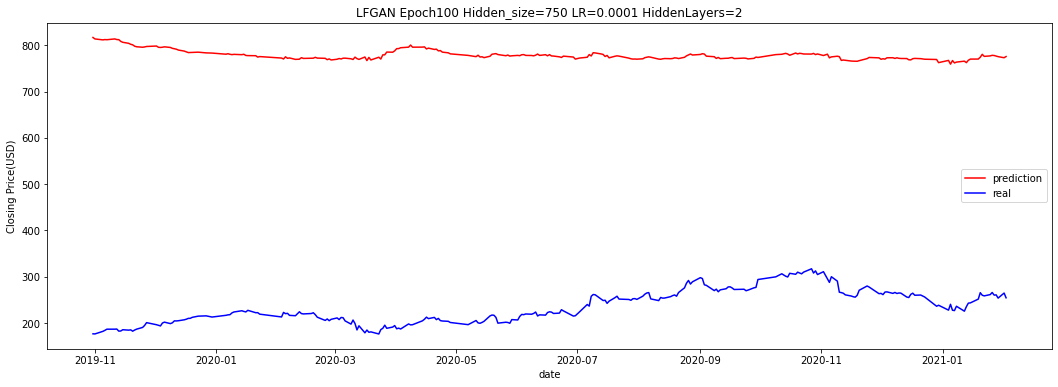

In [40]:
LFGAN(1e-4,750,2)

-----------------LFGAN: 1 epoch, Hidden Size: 750, Learning Rate: 0.0001, Hidden Layers: 3-----------------
epoch: 0, avg_d_loss = 0.15494122757506765, avg_g_loss = 0.1298520491754752, avg_dev_loss = 0.04592333467740976
avg_test_loss = 0.07745006477290933
RMSE = 164.30810076569867 ; MAE = 160.67481722134988; R2 = -20.410960145794323


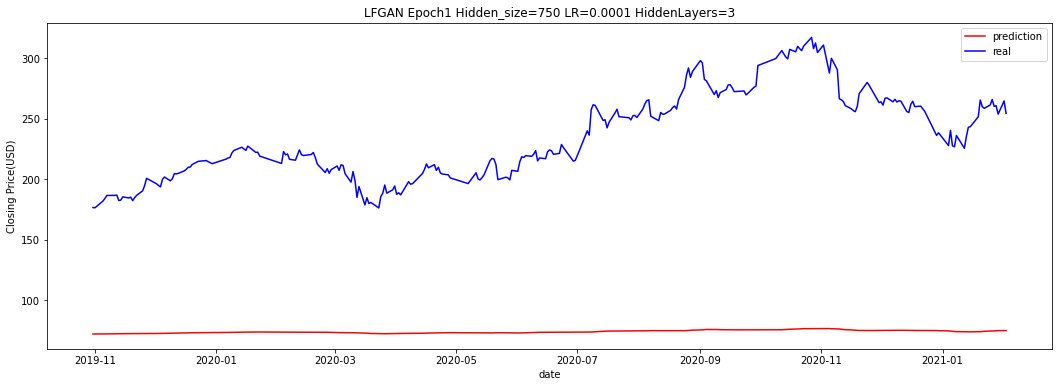

-----------------LFGAN: 50 epoch, Hidden Size: 750, Learning Rate: 0.0001, Hidden Layers: 3-----------------
epoch: 0, avg_d_loss = 0.16270603502053574, avg_g_loss = 0.12057275554526442, avg_dev_loss = 0.052774731650551916
epoch: 1, avg_d_loss = 0.06861537456021412, avg_g_loss = 0.3093002804936263, avg_dev_loss = 0.9206793861244115
epoch: 2, avg_d_loss = 0.0030947814781705084, avg_g_loss = 0.607455793895649, avg_dev_loss = 0.9750264697201805
epoch: 3, avg_d_loss = 0.0009720699627929767, avg_g_loss = 0.7480695226497674, avg_dev_loss = 0.7292328551694921
epoch: 4, avg_d_loss = 0.0017079701729789281, avg_g_loss = 0.7446465661468312, avg_dev_loss = 0.5145582300628546
epoch: 5, avg_d_loss = 0.05117787226429032, avg_g_loss = 0.5935576014192385, avg_dev_loss = 0.040405210320033955
epoch: 6, avg_d_loss = 0.01870649189573768, avg_g_loss = 0.567892241689491, avg_dev_loss = 0.06247923140743386
epoch: 7, avg_d_loss = 0.021164039463272225, avg_g_loss = 0.5909131987466558, avg_dev_loss = 0.010863617

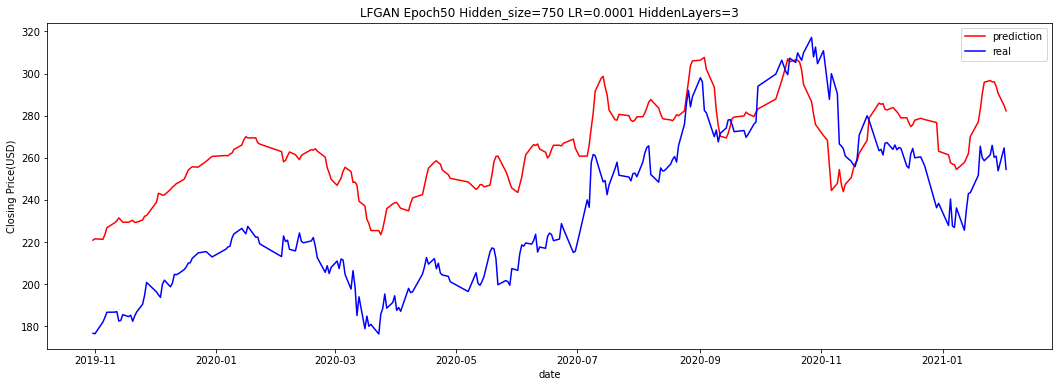

-----------------LFGAN: 100 epoch, Hidden Size: 750, Learning Rate: 0.0001, Hidden Layers: 3-----------------
epoch: 0, avg_d_loss = 0.11888488813649263, avg_g_loss = 0.2032291190403647, avg_dev_loss = 1.4229899685645737
epoch: 1, avg_d_loss = 0.0030778913035120047, avg_g_loss = 0.6681410604556703, avg_dev_loss = 1.6246143348316728
epoch: 2, avg_d_loss = 0.0007477996266519011, avg_g_loss = 0.8046473078854637, avg_dev_loss = 1.8476600937063703
epoch: 3, avg_d_loss = 0.0004157512718740808, avg_g_loss = 0.8802485175912371, avg_dev_loss = 1.6266437719076758
epoch: 4, avg_d_loss = 0.00028302731492328817, avg_g_loss = 0.9323744157421272, avg_dev_loss = 1.1641528633610831
epoch: 5, avg_d_loss = 0.00021843518065855247, avg_g_loss = 0.9701257598113047, avg_dev_loss = 1.2445615180998248
epoch: 6, avg_d_loss = 0.06867578708446032, avg_g_loss = 0.6369733316363491, avg_dev_loss = 0.021651031683153073
epoch: 7, avg_d_loss = 0.04215460050501713, avg_g_loss = 0.49466186618321445, avg_dev_loss = 0.0065

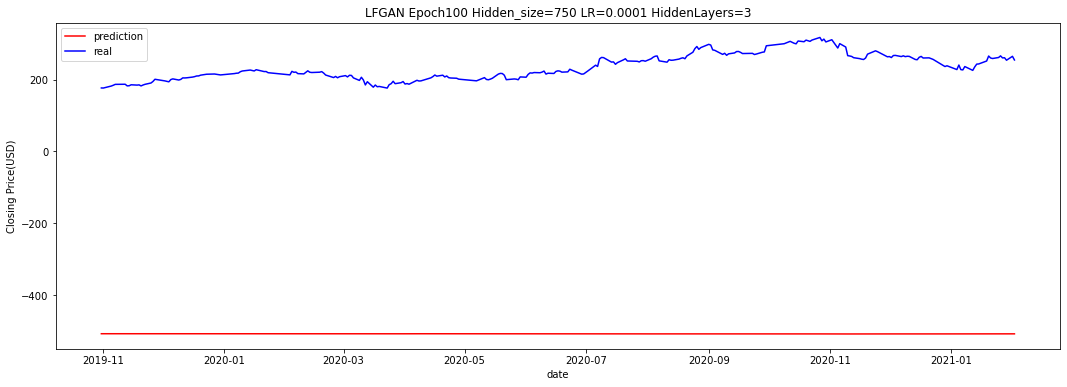

In [41]:
LFGAN(1e-4,750,3)

-----------------LFGAN: 1 epoch, Hidden Size: 1000, Learning Rate: 0.0001, Hidden Layers: 1-----------------
epoch: 0, avg_d_loss = 0.17006486586291528, avg_g_loss = 0.11767246854622554, avg_dev_loss = 0.006680385085679732
avg_test_loss = 0.011520029087974266
RMSE = 30.116279422386867 ; MAE = 23.898993157068457; R2 = 0.28068216648032707


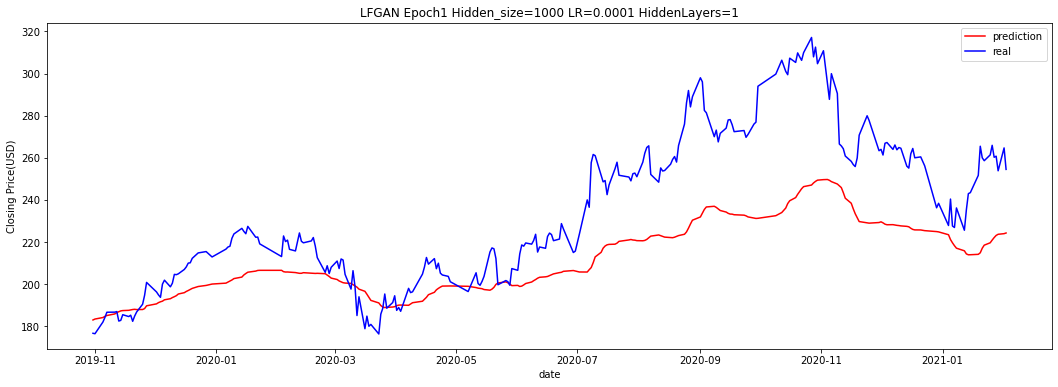

-----------------LFGAN: 50 epoch, Hidden Size: 1000, Learning Rate: 0.0001, Hidden Layers: 1-----------------
epoch: 0, avg_d_loss = 0.15923867872308264, avg_g_loss = 0.12791269904307087, avg_dev_loss = 0.06688711874385297
epoch: 1, avg_d_loss = 0.15122082803034811, avg_g_loss = 0.17628707722565973, avg_dev_loss = 0.005855010588699421
epoch: 2, avg_d_loss = 0.176323848683269, avg_g_loss = 0.11161349360631596, avg_dev_loss = 0.004111375333918365
epoch: 3, avg_d_loss = 0.17495511043509906, avg_g_loss = 0.09570779727892277, avg_dev_loss = 0.0034069260830208374
epoch: 4, avg_d_loss = 0.17244158347145536, avg_g_loss = 0.09848753089989395, avg_dev_loss = 0.0027558951507616405
epoch: 5, avg_d_loss = 0.17540918889305587, avg_g_loss = 0.09518293607673113, avg_dev_loss = 0.00322723590517452
epoch: 6, avg_d_loss = 0.17463785568570908, avg_g_loss = 0.09408067591743324, avg_dev_loss = 0.0026839616010850826
epoch: 7, avg_d_loss = 0.17532846546898323, avg_g_loss = 0.09226579614767406, avg_dev_loss = 

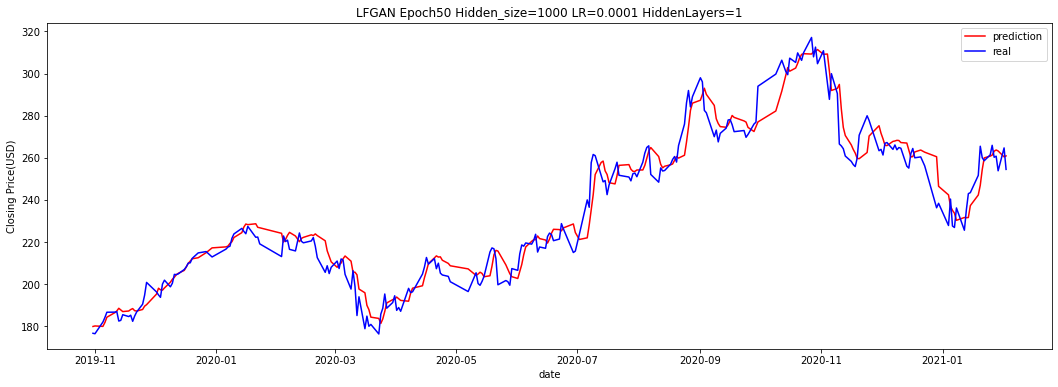

-----------------LFGAN: 100 epoch, Hidden Size: 1000, Learning Rate: 0.0001, Hidden Layers: 1-----------------
epoch: 0, avg_d_loss = 0.1708723522713278, avg_g_loss = 0.11485729018091702, avg_dev_loss = 0.005617900747989973
epoch: 1, avg_d_loss = 0.11703154811085555, avg_g_loss = 0.22444448800443545, avg_dev_loss = 0.036868618241734374
epoch: 2, avg_d_loss = 0.1406788815223672, avg_g_loss = 0.2269630358850699, avg_dev_loss = 0.005095161625074343
epoch: 3, avg_d_loss = 0.17438549838289713, avg_g_loss = 0.10181221679438505, avg_dev_loss = 0.003679503761090253
epoch: 4, avg_d_loss = 0.17627834518297242, avg_g_loss = 0.09528092399749466, avg_dev_loss = 0.00291275993669441
epoch: 5, avg_d_loss = 0.17459994939796825, avg_g_loss = 0.09314174510075868, avg_dev_loss = 0.0028443116085610917
epoch: 6, avg_d_loss = 0.1739775554308873, avg_g_loss = 0.09385122651534086, avg_dev_loss = 0.004176404617528499
epoch: 7, avg_d_loss = 0.1743898193796929, avg_g_loss = 0.0944709050338078, avg_dev_loss = 0.00

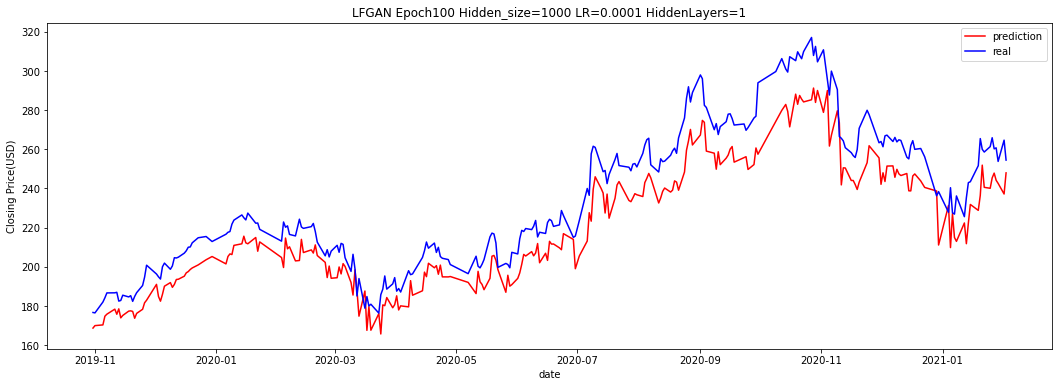

In [47]:
LFGAN(1e-4,1000,1)

-----------------LFGAN: 1 epoch, Hidden Size: 1000, Learning Rate: 0.0001, Hidden Layers: 2-----------------
epoch: 0, avg_d_loss = 0.17202351558646625, avg_g_loss = 0.10893281739020982, avg_dev_loss = 0.04436327058099522
avg_test_loss = 0.07715024268536856
RMSE = 163.99188617446208 ; MAE = 160.0528162263732; R2 = -20.328627710199044


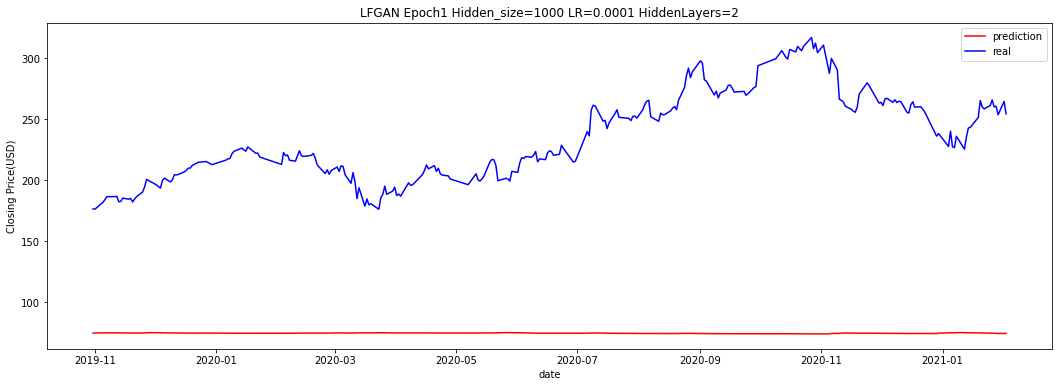

-----------------LFGAN: 50 epoch, Hidden Size: 1000, Learning Rate: 0.0001, Hidden Layers: 2-----------------
epoch: 0, avg_d_loss = 0.14224545825721344, avg_g_loss = 0.15204953067051896, avg_dev_loss = 0.06740778639289363
epoch: 1, avg_d_loss = 0.1150887056769678, avg_g_loss = 0.307727529975398, avg_dev_loss = 0.005074174161079719
epoch: 2, avg_d_loss = 0.16032409705741021, avg_g_loss = 0.14439532300516378, avg_dev_loss = 0.0031078105771156317
epoch: 3, avg_d_loss = 0.17838651583977375, avg_g_loss = 0.09646745209307121, avg_dev_loss = 0.0060899517013772815
epoch: 4, avg_d_loss = 0.17573341504400372, avg_g_loss = 0.09268522443880146, avg_dev_loss = 0.002856519158235521
epoch: 5, avg_d_loss = 0.17461568124696178, avg_g_loss = 0.0921661556144782, avg_dev_loss = 0.0026655979277459842
epoch: 6, avg_d_loss = 0.17481818156852771, avg_g_loss = 0.09162783350781342, avg_dev_loss = 0.0027904546830250735
epoch: 7, avg_d_loss = 0.17441492947939835, avg_g_loss = 0.09114655244184236, avg_dev_loss = 

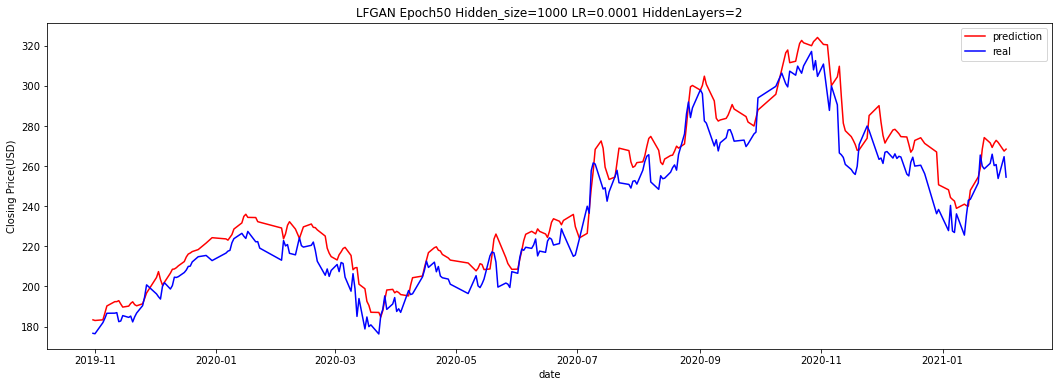

-----------------LFGAN: 100 epoch, Hidden Size: 1000, Learning Rate: 0.0001, Hidden Layers: 2-----------------
epoch: 0, avg_d_loss = 0.1706554014873142, avg_g_loss = 0.11508988034740299, avg_dev_loss = 0.006656266819728192
epoch: 1, avg_d_loss = 0.14019751484554227, avg_g_loss = 0.15964058317310154, avg_dev_loss = 0.046666189064997685
epoch: 2, avg_d_loss = 0.1502746654478467, avg_g_loss = 0.18072651453193453, avg_dev_loss = 0.003104024244465302
epoch: 3, avg_d_loss = 0.17535374690371322, avg_g_loss = 0.09384172807326033, avg_dev_loss = 0.003589863764979087
epoch: 4, avg_d_loss = 0.1737043336317113, avg_g_loss = 0.09491443067449128, avg_dev_loss = 0.008631261823408504
epoch: 5, avg_d_loss = 0.17031998975799714, avg_g_loss = 0.11124451418793246, avg_dev_loss = 0.010792201377819699
epoch: 6, avg_d_loss = 0.17501231669170925, avg_g_loss = 0.09937020037110768, avg_dev_loss = 0.002647887575422403
epoch: 7, avg_d_loss = 0.17572569922651476, avg_g_loss = 0.09285185001648877, avg_dev_loss = 0

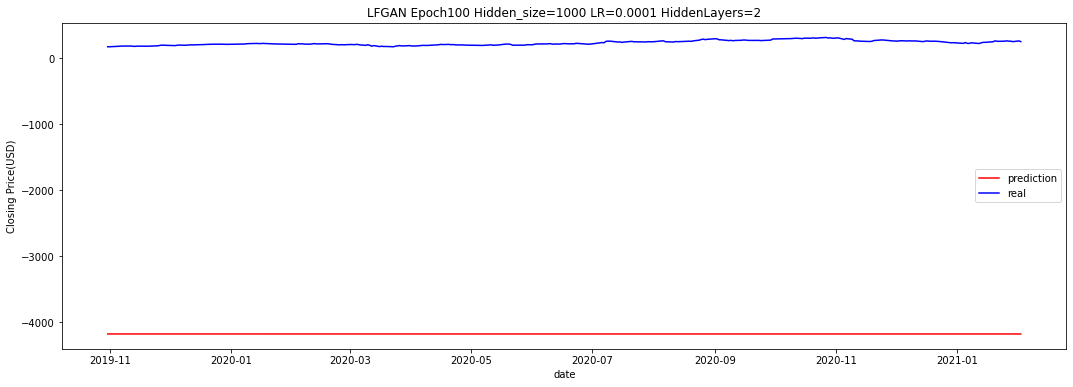

In [43]:
LFGAN(1e-4,1000,2)

-----------------LFGAN: 1 epoch, Hidden Size: 1000, Learning Rate: 0.0001, Hidden Layers: 3-----------------
epoch: 0, avg_d_loss = 0.1748649797512098, avg_g_loss = 0.10854578577218098, avg_dev_loss = 0.021791509519058488
avg_test_loss = 0.054719943101658966
RMSE = 119.02386442925294 ; MAE = 113.51981172170159; R2 = -10.235341699597555


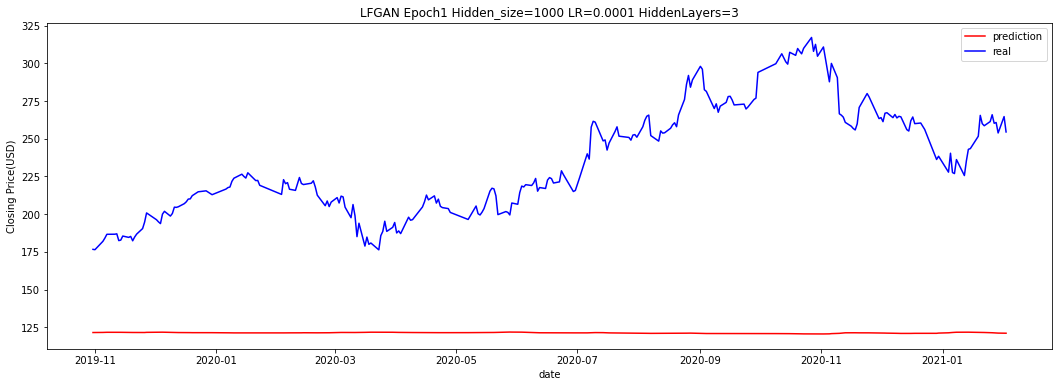

-----------------LFGAN: 50 epoch, Hidden Size: 1000, Learning Rate: 0.0001, Hidden Layers: 3-----------------
epoch: 0, avg_d_loss = 0.15593899663712438, avg_g_loss = 0.13195752538504557, avg_dev_loss = 0.053190474274493894
epoch: 1, avg_d_loss = 0.047899647397479025, avg_g_loss = 0.3915578261376636, avg_dev_loss = 1.4276697826022884
epoch: 2, avg_d_loss = 0.0016706726367435453, avg_g_loss = 0.6837974162760494, avg_dev_loss = 1.1041076137992365
epoch: 3, avg_d_loss = 0.008009306523719914, avg_g_loss = 0.7465190996235315, avg_dev_loss = 0.04143747800656598
epoch: 4, avg_d_loss = 0.006047085356628298, avg_g_loss = 0.6850425465780822, avg_dev_loss = 0.16294850142736397
epoch: 5, avg_d_loss = 0.04843305896953485, avg_g_loss = 0.611007555658222, avg_dev_loss = 0.16620713631009873
epoch: 6, avg_d_loss = 0.001065565716104608, avg_g_loss = 0.7315304143347214, avg_dev_loss = 0.09630049340171959
epoch: 7, avg_d_loss = 0.060043245333828814, avg_g_loss = 0.4544174124608324, avg_dev_loss = 0.049571

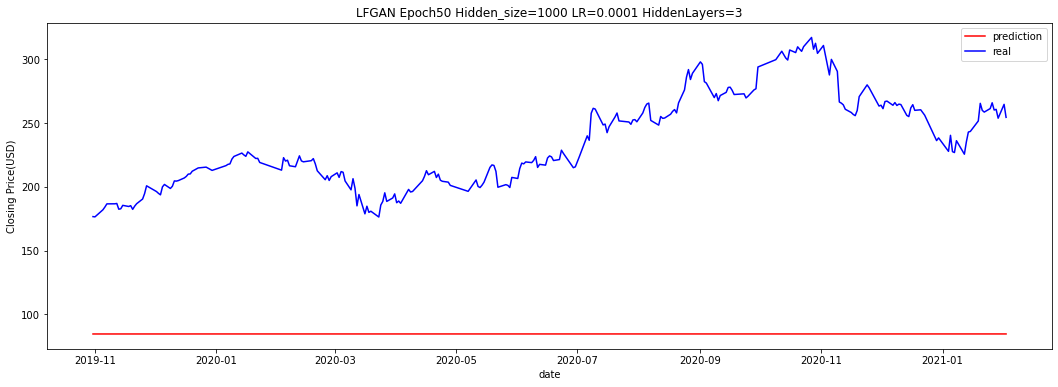

-----------------LFGAN: 100 epoch, Hidden Size: 1000, Learning Rate: 0.0001, Hidden Layers: 3-----------------
epoch: 0, avg_d_loss = 0.16837798567023718, avg_g_loss = 0.11380360705166565, avg_dev_loss = 0.020937861598489857
epoch: 1, avg_d_loss = 0.09570144946452028, avg_g_loss = 0.24864865172800757, avg_dev_loss = 1.2272378682183676
epoch: 2, avg_d_loss = 0.0027716833890353166, avg_g_loss = 0.6338397655801326, avg_dev_loss = 0.7448454410857575
epoch: 3, avg_d_loss = 0.0010365530133190717, avg_g_loss = 0.7526562924016413, avg_dev_loss = 0.6567182359586651
epoch: 4, avg_d_loss = 0.02196250309877296, avg_g_loss = 0.6964716246523935, avg_dev_loss = 0.08191158336378322
epoch: 5, avg_d_loss = 0.02267715491057009, avg_g_loss = 0.5659861458873869, avg_dev_loss = 0.016975092485603725
epoch: 6, avg_d_loss = 0.005089560823151499, avg_g_loss = 0.7082641212357013, avg_dev_loss = 0.029055000994595286
epoch: 7, avg_d_loss = 0.014025362125563663, avg_g_loss = 0.8315199158793015, avg_dev_loss = 0.035

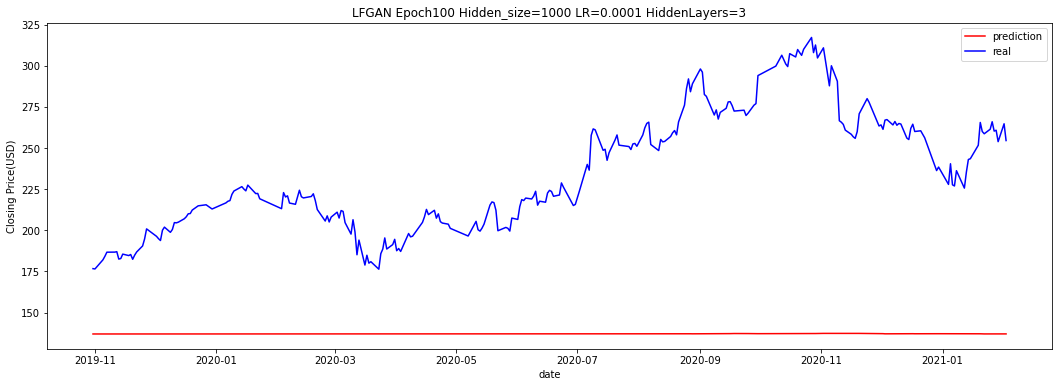

In [44]:
LFGAN(1e-4,1000,3)

-----------------LFGAN: 1 epoch, Hidden Size: 250, Learning Rate: 0.0001, Hidden Layers: 2-----------------
epoch: 0, avg_d_loss = 0.16907918694959093, avg_g_loss = 0.11482037805936787, avg_dev_loss = 0.04455038712505152
avg_test_loss = 0.07709304627143976
RMSE = 163.8200111654854 ; MAE = 159.93415660954443; R2 = -20.283943340425438


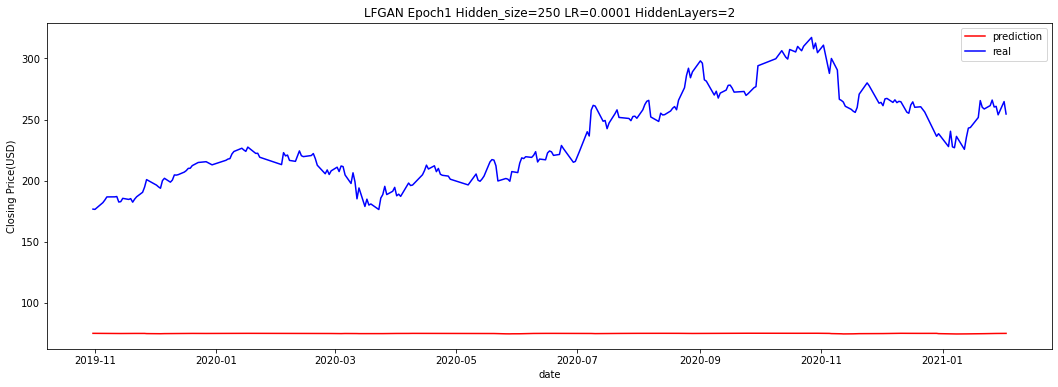

-----------------LFGAN: 50 epoch, Hidden Size: 250, Learning Rate: 0.0001, Hidden Layers: 2-----------------
epoch: 0, avg_d_loss = 0.15955428916994005, avg_g_loss = 0.12588802308637378, avg_dev_loss = 0.05820861243476433
epoch: 1, avg_d_loss = 0.09156996580678851, avg_g_loss = 0.32730450837180036, avg_dev_loss = 0.00745619618167442
epoch: 2, avg_d_loss = 0.17177340210768358, avg_g_loss = 0.12258063575916266, avg_dev_loss = 0.003889874105444426
epoch: 3, avg_d_loss = 0.17709506404112801, avg_g_loss = 0.10093103139572723, avg_dev_loss = 0.0032392609439535285
epoch: 4, avg_d_loss = 0.1752031390355718, avg_g_loss = 0.09560755714868563, avg_dev_loss = 0.004274724072603218
epoch: 5, avg_d_loss = 0.17412904973870147, avg_g_loss = 0.09447765433440794, avg_dev_loss = 0.00966372294174401
epoch: 6, avg_d_loss = 0.17447769687202946, avg_g_loss = 0.09435590689928662, avg_dev_loss = 0.00317211981735302
epoch: 7, avg_d_loss = 0.17443512737071107, avg_g_loss = 0.09332746357972178, avg_dev_loss = 0.00

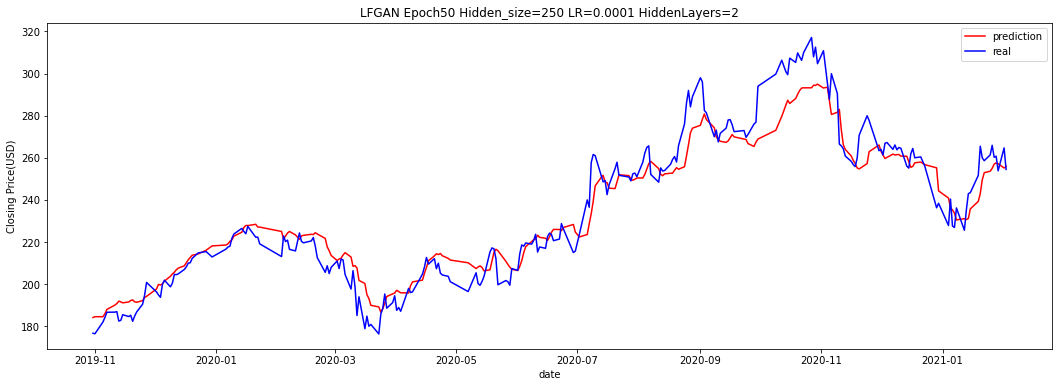

-----------------LFGAN: 100 epoch, Hidden Size: 250, Learning Rate: 0.0001, Hidden Layers: 2-----------------
epoch: 0, avg_d_loss = 0.17164482680563692, avg_g_loss = 0.11147925261460027, avg_dev_loss = 0.041512792894595474
epoch: 1, avg_d_loss = 0.1528583475694306, avg_g_loss = 0.14583646994277702, avg_dev_loss = 0.21284173151386102
epoch: 2, avg_d_loss = 0.14800766484365718, avg_g_loss = 0.16473111687806472, avg_dev_loss = 0.012746992050014975
epoch: 3, avg_d_loss = 0.17534391780316602, avg_g_loss = 0.12777859539133515, avg_dev_loss = 0.003263883887588298
epoch: 4, avg_d_loss = 0.17560027518955323, avg_g_loss = 0.09826875299555267, avg_dev_loss = 0.004358947801159362
epoch: 5, avg_d_loss = 0.17305006878155418, avg_g_loss = 0.09752108351208261, avg_dev_loss = 0.004045217499816825
epoch: 6, avg_d_loss = 0.17469576783053323, avg_g_loss = 0.09445258253578602, avg_dev_loss = 0.0033452655100210536
epoch: 7, avg_d_loss = 0.17459903833077434, avg_g_loss = 0.09459209865188115, avg_dev_loss = 

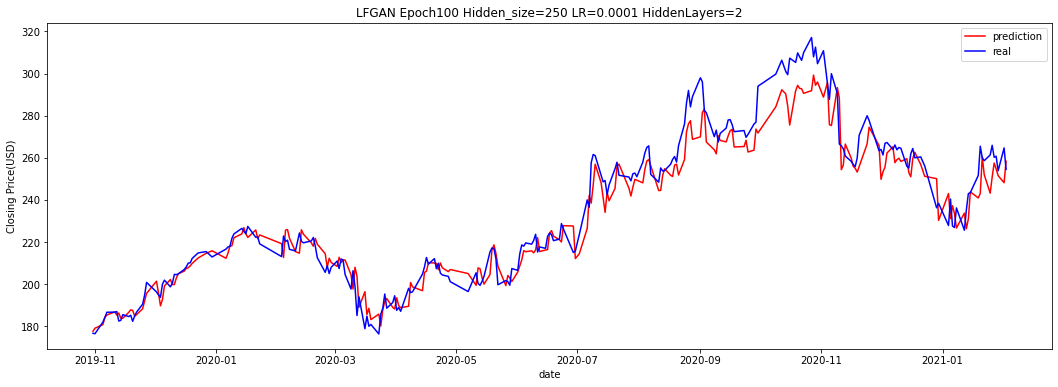

In [45]:
LFGAN(1e-4,250,2)

-----------------LFGAN: 1 epoch, Hidden Size: 250, Learning Rate: 0.0001, Hidden Layers: 3-----------------
epoch: 0, avg_d_loss = 0.15806010255946557, avg_g_loss = 0.12706435769229787, avg_dev_loss = 0.06895606622043218
avg_test_loss = 0.10157384113831953
RMSE = 213.70993020680444 ; MAE = 210.72103926195538; R2 = -35.22159719808843


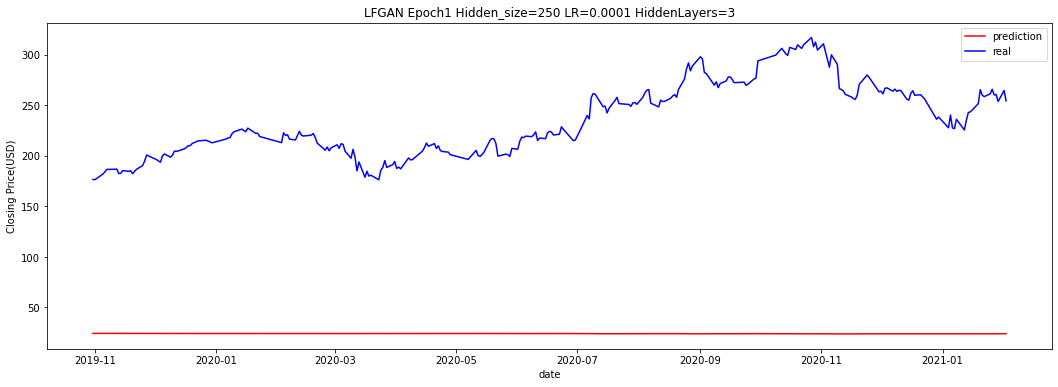

-----------------LFGAN: 50 epoch, Hidden Size: 250, Learning Rate: 0.0001, Hidden Layers: 3-----------------
epoch: 0, avg_d_loss = 0.1655096049846654, avg_g_loss = 0.1182716266737238, avg_dev_loss = 0.05866412982741236
epoch: 1, avg_d_loss = 0.08647169381927779, avg_g_loss = 0.30429016380406754, avg_dev_loss = 0.02044967836753497
epoch: 2, avg_d_loss = 0.14741058430442036, avg_g_loss = 0.20071569047348883, avg_dev_loss = 0.004661103915918916
epoch: 3, avg_d_loss = 0.17718192364628627, avg_g_loss = 0.09981031585555566, avg_dev_loss = 0.003896540023754758
epoch: 4, avg_d_loss = 0.1751550395225844, avg_g_loss = 0.09406256048700504, avg_dev_loss = 0.004757342144790257
epoch: 5, avg_d_loss = 0.17463746436497407, avg_g_loss = 0.09373893272438581, avg_dev_loss = 0.00472623581498748
epoch: 6, avg_d_loss = 0.1742657265886759, avg_g_loss = 0.09253995537908963, avg_dev_loss = 0.0037910591088547
epoch: 7, avg_d_loss = 0.17374492054203164, avg_g_loss = 0.09283070011283961, avg_dev_loss = 0.0041746

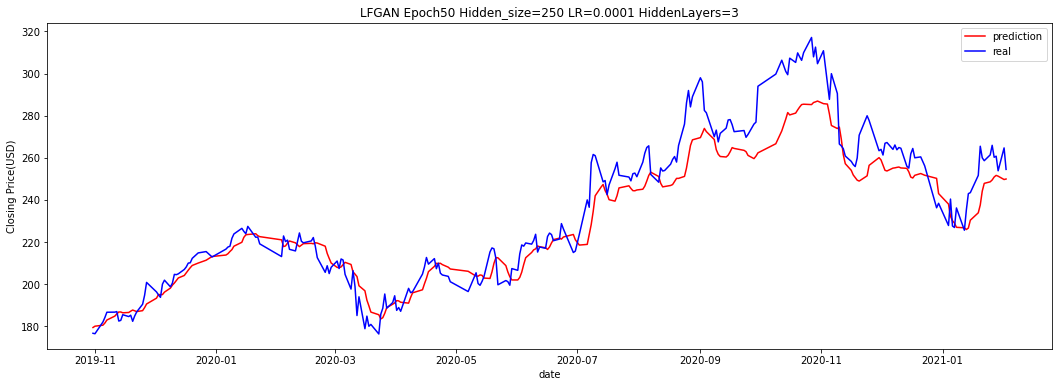

-----------------LFGAN: 100 epoch, Hidden Size: 250, Learning Rate: 0.0001, Hidden Layers: 3-----------------
epoch: 0, avg_d_loss = 0.1448885466813739, avg_g_loss = 0.15036582788133804, avg_dev_loss = 0.04132953002878922
epoch: 1, avg_d_loss = 0.13579531914834286, avg_g_loss = 0.20114820459043117, avg_dev_loss = 0.008400410215437639
epoch: 2, avg_d_loss = 0.11501580420102457, avg_g_loss = 0.2703235554868882, avg_dev_loss = 0.007677483510495139
epoch: 3, avg_d_loss = 0.17755011037577542, avg_g_loss = 0.09831282341586017, avg_dev_loss = 0.003908010688344788
epoch: 4, avg_d_loss = 0.17504373400534665, avg_g_loss = 0.09272690251450726, avg_dev_loss = 0.003540545404523951
epoch: 5, avg_d_loss = 0.1750177678348749, avg_g_loss = 0.09198708142919988, avg_dev_loss = 0.0037182690186192326
epoch: 6, avg_d_loss = 0.1742309217066215, avg_g_loss = 0.09245053126331518, avg_dev_loss = 0.0036047557404286054
epoch: 7, avg_d_loss = 0.17349571601519567, avg_g_loss = 0.09360766357946457, avg_dev_loss = 0.

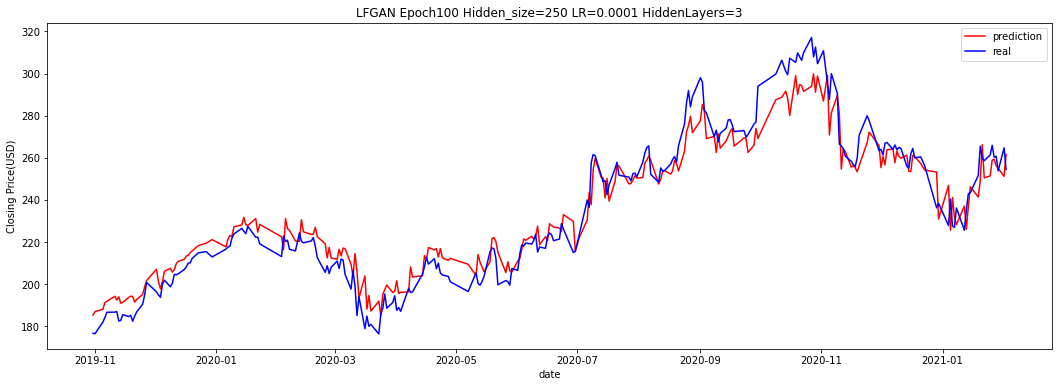

In [46]:
LFGAN(1e-4,250,3)

## Baseline LSTM

In [29]:
gan_df = TA_data.dropna()
close_min=gan_df['Close'].min()
close_max=gan_df["Close"].max()
gan_df=gan_df.apply(lambda x:(x-min(x))/(max(x)-min(x)))

In [30]:
sequence = 14
batchSize = 8
useGPU = True
X = []
Y = [] 
real = []
date = []
for i in range(gan_df.shape[0] - sequence):
    X.append(np.array(gan_df.iloc[i:(i + sequence), ].values, dtype=np.float32))
    Y.append(np.array(gan_df.iloc[(i + sequence), ], dtype=np.float32))
    date.append(gan_df.index[i + sequence])
total_len = len(Y)

In [31]:
trainx, trainy = X[:int(0.6 * total_len)], Y[:int(0.6 * total_len)]
devx, devy = X[int(0.6 * total_len):int(0.8 * total_len)], Y[int(0.6 * total_len):int(0.8 * total_len)]
testx, testy = X[int(0.8 * total_len):], Y[int(0.8 * total_len):]
train_loader = DataLoader(dataset=Mydataset(trainx, trainy, transform=transforms.ToTensor()), batch_size=batchSize,
                          shuffle=True)
dev_loader = DataLoader(dataset=Mydataset(devx, devy), batch_size=batchSize, shuffle=True)
test_loader = DataLoader(dataset=Mydataset(testx, testy), batch_size=batchSize, shuffle=False)

In [32]:
def train_lstm(epoch, generator, gen_optimizer, sub_criterion, train_loader = train_loader, dev_loader = dev_loader):
    for i in range(epoch):
        total_g_loss = 0
        total_dev_loss = 0
        for idx, (data, label) in enumerate(train_loader):
            label = label.cuda() 
            data2 = data.squeeze(1).cuda()
            fake_gen_2 = generator(Variable(data2).cuda())
            fake_close = fake_gen_2.squeeze()
            real_close = label[:,3]
    #         print(fake_close.shape)
    #         print(real_close.shape)
            lstm_loss = sub_criterion(fake_close, real_close)
#             g_loss = 0.1*cnn_loss + 0.9*lstm_loss
            g_loss = lstm_loss 
            gen_optimizer.zero_grad()
            g_loss.backward()
            gen_optimizer.step()
            total_g_loss += g_loss.item()
        for idx, (data, label) in enumerate(dev_loader):
            with torch.no_grad():
                data = data.cuda()
                data = data.unsqueeze(1)
                label = label.cuda() 
                data3 = data.squeeze(1).cuda()
                fake_gen_3 = generator(Variable(data3).cuda())
                fake_close = fake_gen_3.squeeze()
                real_close = label[:,3]
#                 print(fake_close)
#                 print(real_close)
                dev_loss = sub_criterion(fake_close, real_close)
                total_dev_loss += dev_loss.item()
        print("epoch: {}, avg_train_loss = {}, avg_dev_loss = {}".format(i, total_g_loss/len(trainx), total_dev_loss/len(devx)))


-----------------LSTM: 1 epoch, Hidden Size: 500, Learning Rate: 1e-4, Hidden Layers: 1-----------------
epoch: 0, avg_train_loss = 0.005838047884787104, avg_dev_loss = 0.002640281276274543
avg_test_loss = 0.00659308981884158
RMSE = 16.651645395685733 ; MAE = 13.677761291122144; R2 = 0.7800963188861827


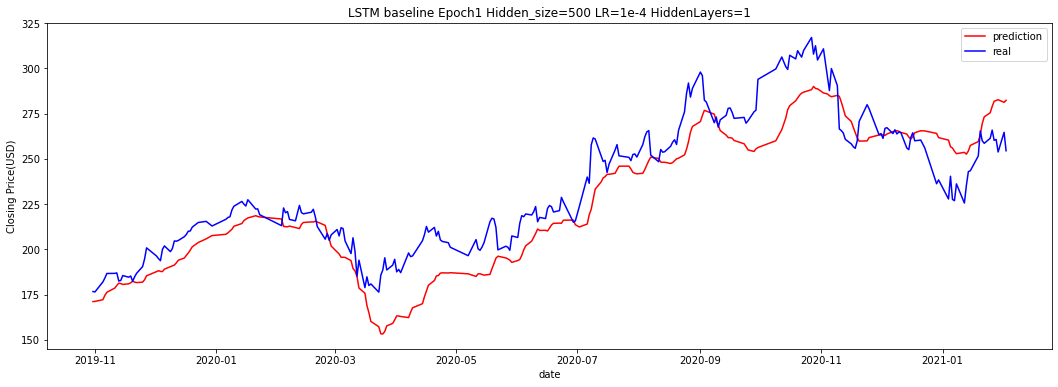

-----------------LSTM: 50 epoch, Hidden Size: 500, Learning Rate: 1e-4, Hidden Layers: 1-----------------
epoch: 0, avg_train_loss = 0.00659771636600579, avg_dev_loss = 0.0031870895777138465
epoch: 1, avg_train_loss = 0.00205063221489843, avg_dev_loss = 0.0025803185857747445
epoch: 2, avg_train_loss = 0.001621844365612069, avg_dev_loss = 0.0028526751685731765
epoch: 3, avg_train_loss = 0.0013735929571318762, avg_dev_loss = 0.0023095170744188384
epoch: 4, avg_train_loss = 0.001353107249961531, avg_dev_loss = 0.0032800657270979066
epoch: 5, avg_train_loss = 0.0012636279559804005, avg_dev_loss = 0.0025888302862757512
epoch: 6, avg_train_loss = 0.0012632458026937583, avg_dev_loss = 0.0020704146531258247
epoch: 7, avg_train_loss = 0.0012591179145714894, avg_dev_loss = 0.0020717822100273105
epoch: 8, avg_train_loss = 0.001210094346335519, avg_dev_loss = 0.002500989038794666
epoch: 9, avg_train_loss = 0.0012921567012394186, avg_dev_loss = 0.0026269606367716773
epoch: 10, avg_train_loss = 0.00

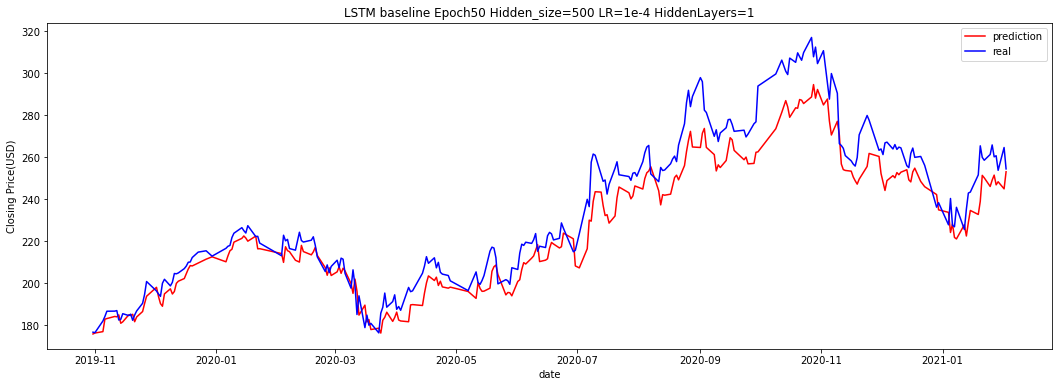

-----------------LSTM: 100 epoch, Hidden Size: 500, Learning Rate: 1e-4, Hidden Layers: 1-----------------
epoch: 0, avg_train_loss = 0.006273179376410517, avg_dev_loss = 0.002955165858107828
epoch: 1, avg_train_loss = 0.001745283262537384, avg_dev_loss = 0.002602498748201608
epoch: 2, avg_train_loss = 0.0015278832233866207, avg_dev_loss = 0.0025824084807144826
epoch: 3, avg_train_loss = 0.0014239872554352528, avg_dev_loss = 0.002537536346300473
epoch: 4, avg_train_loss = 0.0014087223212962973, avg_dev_loss = 0.0029077746129874496
epoch: 5, avg_train_loss = 0.001457228602107298, avg_dev_loss = 0.002632801644079132
epoch: 6, avg_train_loss = 0.0012460163120458939, avg_dev_loss = 0.002875013886012505
epoch: 7, avg_train_loss = 0.0011563750275461469, avg_dev_loss = 0.002110638790285859
epoch: 8, avg_train_loss = 0.0011583668332079517, avg_dev_loss = 0.0022316352666104248
epoch: 9, avg_train_loss = 0.0012758502999913178, avg_dev_loss = 0.003351036154668594
epoch: 10, avg_train_loss = 0.001

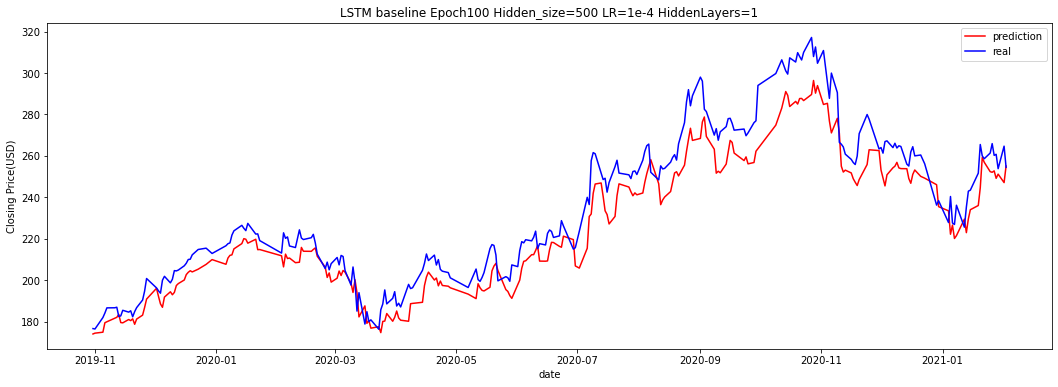

In [37]:
epoch = [0,49,99]
def BaselineLSTM(epoch=epoch):
    for e in range (0,len(epoch)):
        generator = lstm(input_size=40).cuda()
        gen_optimizer = optim.Adam(generator.parameters(), lr=1e-4) 
        sub_criterion = nn.L1Loss().cuda()
        print("-----------------LSTM: {} epoch, Hidden Size: 500, Learning Rate: 1e-4, Hidden Layers: 1-----------------".format(epoch[e]+1))
        
        train_lstm(epoch[e]+1,generator, gen_optimizer, sub_criterion,train_loader=train_loader,dev_loader=dev_loader)
        
        torch.save(generator, 'model/lstm_epoch{}.pkl'.format(epoch[e]+1))
        generator = torch.load('model/lstm_epoch{}.pkl'.format(epoch[e]+1))
        
        plt.figure(figsize=(18, 6))
        all_fake = []
        all_real = []
        total_test_loss = 0
        for idx, (data, label) in enumerate(test_loader):
            with torch.no_grad():
                data = data.cuda()
                data = data.unsqueeze(1)
                label = label.cuda() 
                data3 = data.squeeze(1).cuda()
                fake_gen_3 = generator(Variable(data3).cuda())
                fake_close = fake_gen_3.squeeze()
                real_close = label[:,3]
                all_fake += fake_close.tolist()
                all_real += real_close.tolist()
                test_loss = sub_criterion(fake_close, real_close)
                total_test_loss += test_loss.item()
        print("avg_test_loss = {}".format(total_test_loss/len(testx)))
        all_fake = [close*(close_max-close_min) + close_min for close in all_fake]
        all_real = [close*(close_max-close_min) + close_min for close in all_real]
        rmse = np.sqrt(mean_squared_error(all_real, all_fake))
        mae = mean_absolute_error(all_real,all_fake)
        r2 = r2_score(all_real,all_fake)
        print("RMSE = {} ; MAE = {}; R2 = {}".format(rmse, mae,r2))

        plt.plot(date[int(0.8 * total_len):], all_fake, 'r', label="prediction")
        plt.plot(date[int(0.8 * total_len):], all_real, 'b', label="real")

        plt.legend(loc='best')
        plt.title("LSTM baseline Epoch{} Hidden_size=500 LR=1e-4 HiddenLayers=1".format(epoch[e]+1))
        plt.savefig('image/lstm_epoch{}.png'.format(epoch[e]+1))
        plt.xlabel("date")
        plt.ylabel("Closing Price(USD)")
        plt.show()
        
BaselineLSTM() 

## Baseline DNN


In [126]:
dnn_df = TA_data.dropna()
close_min=dnn_df['Close'].min()
close_max=dnn_df["Close"].max()
dnn_df=dnn_df.apply(lambda x:(x-min(x))/(max(x)-min(x)))

In [127]:
x_data = torch.Tensor(dnn_df.drop("Close",axis=1).values)
y_data = torch.Tensor(dnn_df['Close'].values)
X = x_data
Y = y_data

In [128]:
class Mydataset(Dataset):
 
    def __init__(self,xx,yy,transform=None):
        self.x=xx
        self.y=yy
        self.tranform = transform
 
    def __getitem__(self,index):
        x1=self.x[index]
        y1=self.y[index]
        if self.tranform !=None:
            return self.tranform(x1),y1
        return x1,y1
 
    def __len__(self):
        return len(self.x)

In [129]:
total_len=x_data.shape[0]
trainx, trainy = X[:int(0.6 * total_len)], Y[:int(0.6 * total_len)]
devx, devy = X[int(0.6 * total_len):int(0.8 * total_len)], Y[int(0.6 * total_len):int(0.8 * total_len)]
testx, testy = X[int(0.8 * total_len):], Y[int(0.8 * total_len):]
train_loader = DataLoader(dataset=Mydataset(trainx, trainy, transform=transforms.ToTensor()), batch_size=batchSize,
                          shuffle=True)
dev_loader = DataLoader(dataset=Mydataset(devx, devy), batch_size=batchSize, shuffle=True)
test_loader = DataLoader(dataset=Mydataset(testx, testy), batch_size=batchSize, shuffle=False)

In [130]:
class Model(torch.nn.Module):
    def __init__(self):
        super(Model, self).__init__()
        self.linear1 = torch.nn.Linear(39, 100)
        self.linear2 = torch.nn.Linear(100, 1000)
        self.linear3 = torch.nn.Linear(1000, 39)
        self.linear4 = torch.nn.Linear(39, 1)
        #self.sigmoid = torch.sigmoid()

    def forward(self, x):
        x = torch.sigmoid(self.linear1(x))
        x = torch.sigmoid(self.linear2(x))
        x = torch.sigmoid(self.linear3(x))
        x = self.linear4(x)
        return x


avg_test_loss = 0.3302384316921234
RMSE = 92.7901949794997 ; MAE = 85.63743052088229; R2 = -5.746553426941484


/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:63: FutureWarning: Arrays of bytes/strings is being converted to decimal numbers if dtype='numeric'. This behavior is deprecated in 0.24 and will be removed in 1.1 (renaming of 0.26). Please convert your data to numeric values explicitly instead.
  return f(*args, **kwargs)
/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:63: FutureWarning: Arrays of bytes/strings is being converted to decimal numbers if dtype='numeric'. This behavior is deprecated in 0.24 and will be removed in 1.1 (renaming of 0.26). Please convert your data to numeric values explicitly instead.
  return f(*args, **kwargs)
/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:63: FutureWarning: Arrays of bytes/strings is being converted to decimal numbers if dtype='numeric'. This behavior is deprecated in 0.24 and will be removed in 1.1 (renaming of 0.26). Please convert your data to numeric values explicitly instead.
  

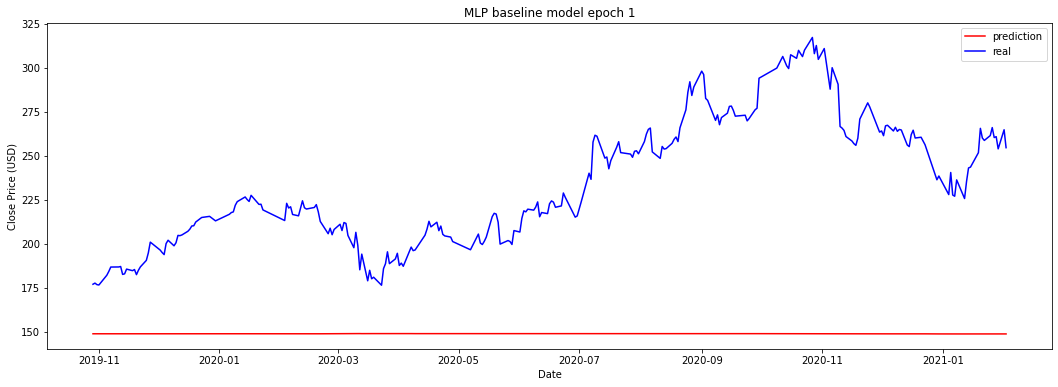

epoch: 0, avg_g_loss = 0.3637021481990814
epoch: 1, avg_g_loss = 0.172374427318573
epoch: 2, avg_g_loss = 0.24185363948345184
epoch: 3, avg_g_loss = 0.23267804086208344
epoch: 4, avg_g_loss = 0.18414923548698425
epoch: 5, avg_g_loss = 0.13158410787582397
epoch: 6, avg_g_loss = 0.19450630247592926
epoch: 7, avg_g_loss = 0.18717370927333832
epoch: 8, avg_g_loss = 0.13115276396274567
epoch: 9, avg_g_loss = 0.1472286731004715
epoch: 10, avg_g_loss = 0.16737151145935059
epoch: 11, avg_g_loss = 0.17136560380458832
epoch: 12, avg_g_loss = 0.1612829566001892
epoch: 13, avg_g_loss = 0.1409212052822113
epoch: 14, avg_g_loss = 0.13026268780231476
epoch: 15, avg_g_loss = 0.14879412949085236
epoch: 16, avg_g_loss = 0.14848487079143524
epoch: 17, avg_g_loss = 0.13111038506031036
epoch: 18, avg_g_loss = 0.1320825219154358
epoch: 19, avg_g_loss = 0.14111176133155823
epoch: 20, avg_g_loss = 0.1428898423910141
epoch: 21, avg_g_loss = 0.13641558587551117
epoch: 22, avg_g_loss = 0.12898819148540497
epoch:

/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:63: FutureWarning: Arrays of bytes/strings is being converted to decimal numbers if dtype='numeric'. This behavior is deprecated in 0.24 and will be removed in 1.1 (renaming of 0.26). Please convert your data to numeric values explicitly instead.
  return f(*args, **kwargs)
/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:63: FutureWarning: Arrays of bytes/strings is being converted to decimal numbers if dtype='numeric'. This behavior is deprecated in 0.24 and will be removed in 1.1 (renaming of 0.26). Please convert your data to numeric values explicitly instead.
  return f(*args, **kwargs)
/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:63: FutureWarning: Arrays of bytes/strings is being converted to decimal numbers if dtype='numeric'. This behavior is deprecated in 0.24 and will be removed in 1.1 (renaming of 0.26). Please convert your data to numeric values explicitly instead.
  

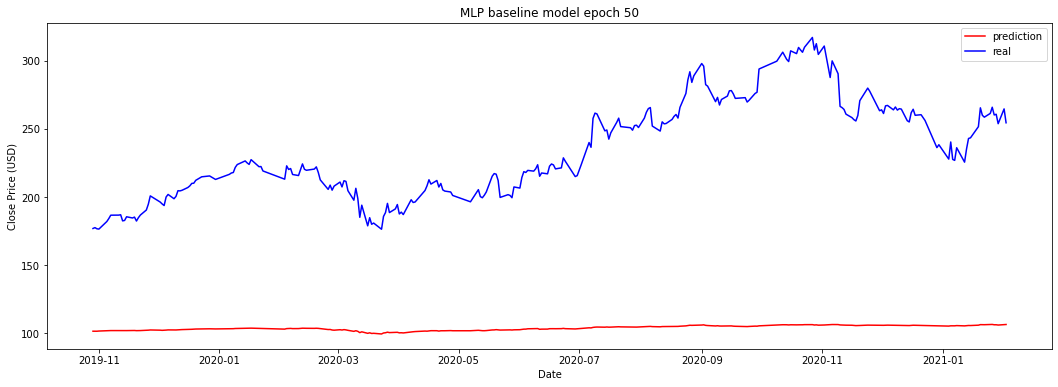

epoch: 0, avg_g_loss = 0.25155460834503174
epoch: 1, avg_g_loss = 0.18978789448738098
epoch: 2, avg_g_loss = 0.13518458604812622
epoch: 3, avg_g_loss = 0.14449910819530487
epoch: 4, avg_g_loss = 0.15165479481220245
epoch: 5, avg_g_loss = 0.1353321075439453
epoch: 6, avg_g_loss = 0.1346908062696457
epoch: 7, avg_g_loss = 0.15171553194522858
epoch: 8, avg_g_loss = 0.13063408434391022
epoch: 9, avg_g_loss = 0.137430340051651
epoch: 10, avg_g_loss = 0.14426250755786896
epoch: 11, avg_g_loss = 0.13672871887683868
epoch: 12, avg_g_loss = 0.12942348420619965
epoch: 13, avg_g_loss = 0.1360740065574646
epoch: 14, avg_g_loss = 0.13819649815559387
epoch: 15, avg_g_loss = 0.1299719214439392
epoch: 16, avg_g_loss = 0.13088062405586243
epoch: 17, avg_g_loss = 0.13559375703334808
epoch: 18, avg_g_loss = 0.1319693624973297
epoch: 19, avg_g_loss = 0.12845462560653687
epoch: 20, avg_g_loss = 0.1313692033290863
epoch: 21, avg_g_loss = 0.13279367983341217
epoch: 22, avg_g_loss = 0.1297219693660736
epoch: 

/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:63: FutureWarning: Arrays of bytes/strings is being converted to decimal numbers if dtype='numeric'. This behavior is deprecated in 0.24 and will be removed in 1.1 (renaming of 0.26). Please convert your data to numeric values explicitly instead.
  return f(*args, **kwargs)
/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:63: FutureWarning: Arrays of bytes/strings is being converted to decimal numbers if dtype='numeric'. This behavior is deprecated in 0.24 and will be removed in 1.1 (renaming of 0.26). Please convert your data to numeric values explicitly instead.
  return f(*args, **kwargs)
/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:63: FutureWarning: Arrays of bytes/strings is being converted to decimal numbers if dtype='numeric'. This behavior is deprecated in 0.24 and will be removed in 1.1 (renaming of 0.26). Please convert your data to numeric values explicitly instead.
  

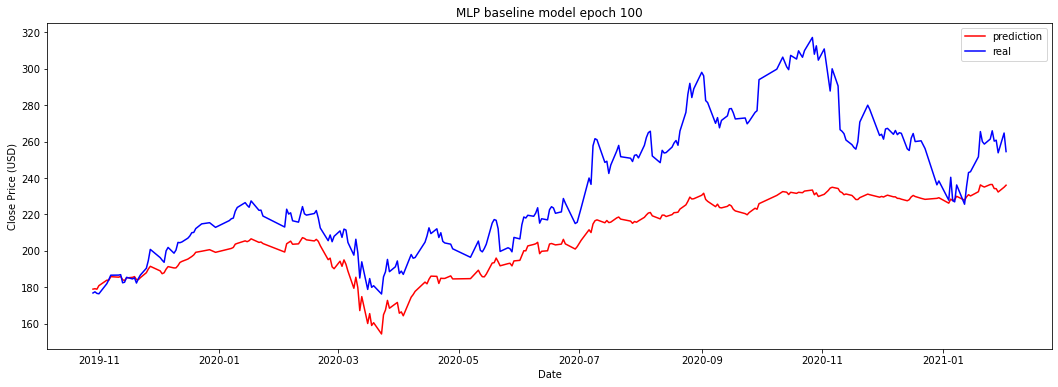

In [133]:
e = [0,49,99]
for lists in range (0,len(e)):
    model = Model()
    criterion=nn.L1Loss()#.cuda
    sub_criterion= nn.L1Loss()
    optimizer=optim.Adam(model.parameters(),lr=0.001)
    lossList = []
    for epoch in range(e[lists]):
        y_pred = model(trainx).squeeze()
        loss = criterion(y_pred, trainy)
        lossList.append(loss.item())
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    for i in range(len(lossList)):
        print("epoch: {}, avg_g_loss = {}".format(i, lossList[i]))
    
    testlossList = []
    
    plt.figure(figsize=(18, 6))
    y_test_pred = model(testx).squeeze()#.tolist()
    tloss = sub_criterion(y_test_pred,testy).item()
    
    
    print("avg_test_loss = {}".format(tloss))
    
    all_fake = [close*(close_max-close_min) + close_min for close in y_test_pred]
    all_real = [close*(close_max-close_min) + close_min for close in testy]
    
    rmse = np.sqrt(mean_squared_error(all_real, all_fake))
    mae = mean_absolute_error(all_real,all_fake)
    r2 = r2_score(all_real,all_fake)
    print("RMSE = {} ; MAE = {}; R2 = {}".format(rmse, mae,r2))

    plt.plot(dnn_df.index[int(0.8 * total_len):], all_fake, 'r', label="prediction")
    plt.plot(dnn_df.index[int(0.8 * total_len):], all_real, 'b', label="real")

    plt.legend(loc='best')
    plt.title("MLP baseline model epoch {}".format(e[lists]+1))
    plt.savefig('image/mlpBase_epoch{}.png'.format(e[lists]+1))
    plt.xlabel("Date")
    plt.ylabel("Close Price (USD)")
    plt.show()